In [1]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import time

# Alternative approach - try initializing without manually specifying chromedriver path
try:
    # Set up Selenium WebDriver
    driver = webdriver.Chrome()  # This will use the PATH variable to locate ChromeDriver automatically

    # Open the Flipkart URL for mobile phones in price range 20000 to 40000
    url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
    driver.get(url)

    # Wait for the page to load
    time.sleep(5)

    # Print the current page title to ensure we loaded the page correctly
    print(driver.title)

    # Close the driver after use
    driver.quit()

except Exception as e:
    print(f"An error occurred: {e}")


Mobile Phones 20000 To 40000- Buy Products Online at Best Price in India - All Categories | Flipkart.com


In [3]:
pip install webdriver-manager 


In [4]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager  # This handles the driver installation
from bs4 import BeautifulSoup
import pandas as pd
import time

# Use WebDriver Manager to automatically download and manage the correct ChromeDriver version
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open the Flipkart URL for mobile phones in price range 20000 to 40000
url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
driver.get(url)

# Wait for the page to load
time.sleep(5)

# Get the page source and parse it with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Initialize lists to store data
product_names = []
review_texts = []
ratings = []

# Find product elements (Adjust the selector based on the actual HTML structure)
products = soup.find_all('div', class_='_1AtVbE')  # This class may vary; inspect the page for accurate class names

for product in products:
    # Extract product name
    name = product.find('a', class_='IRpwTa')  # Adjust this class based on actual page structure
    if name:
        product_names.append(name.text)

    # Extract reviews and ratings
    review = product.find('div', class_='t-ZTKy')  # Adjust class based on actual page structure
    if review:
        review_texts.append(review.text)
    
    rating = product.find('div', class_='_3LWZlK')  # Adjust class based on actual page structure
    if rating:
        ratings.append(rating.text)

# Create a DataFrame to hold the data
data = {
    'Product Name': product_names,
    'Review Text': review_texts,
    'Rating': ratings
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Close the driver after use
driver.quit()


Empty DataFrame
Columns: [Product Name, Review Text, Rating]
Index: []


In [5]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Import necessary libraries for sentiment analysis
from textblob import TextBlob
import re

# Function to clean the review text (remove special characters, extra spaces, etc.)
def clean_review(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\W', ' ', text)   # Remove special characters
    text = text.strip()               # Remove leading and trailing spaces
    return text

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Clean the review text data
df['Cleaned Review'] = df['Review Text'].apply(clean_review)

# Perform sentiment analysis on the cleaned reviews
df['Sentiment'] = df['Cleaned Review'].apply(analyze_sentiment)

# Display the DataFrame with Sentiment column
print(df[['Product Name', 'Cleaned Review', 'Sentiment']])

# Save the data to a CSV file for further analysis or visualization
df.to_csv('flipkart_reviews_with_sentiment.csv', index=False)



Empty DataFrame
Columns: [Product Name, Cleaned Review, Sentiment]
Index: []


In [7]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


Grouped data:
 Sentiment     Negative  Neutral  Positive
Product Name                             
Product A            1        0         1
Product B            1        0         1
Product C            0        1         0


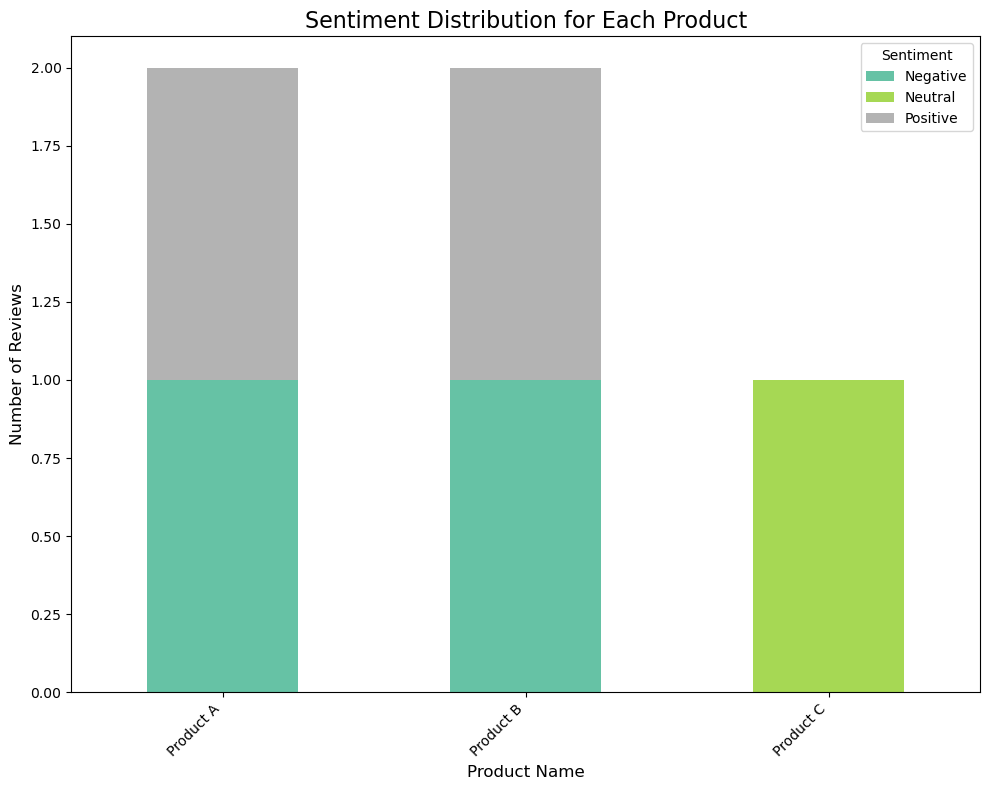

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation for illustration
data = {
    'Product Name': ['Product A', 'Product B', 'Product A', 'Product B', 'Product C'],
    'Sentiment': ['Positive', 'Negative', 'Negative', 'Positive', 'Neutral']
}
df = pd.DataFrame(data)

# Group by product name and sentiment to get the count of each sentiment for each product
product_sentiment = df.groupby(['Product Name', 'Sentiment']).size().unstack(fill_value=0)

# Check the result of the grouping to ensure it's correct
print("Grouped data:\n", product_sentiment.head())  # Print first few rows to verify

# Check for NaN values and handle them
if product_sentiment.isna().sum().sum() > 0:
    print("NaN values found, filling with 0.")
    product_sentiment = product_sentiment.fillna(0)

# Check if the DataFrame is empty
if product_sentiment.empty:
    print("The grouped DataFrame is empty.")
else:
    # Plot the sentiment distribution per product
    product_sentiment.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='Set2')
    plt.title('Sentiment Distribution for Each Product', fontsize=16)
    plt.xlabel('Product Name', fontsize=12)
    plt.ylabel('Number of Reviews', fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Sentiment")
    plt.tight_layout()
    plt.show()


In [9]:
# Summary of sentiment counts
summary = product_sentiment.sum(axis=1).reset_index()
summary.columns = ['Product Name', 'Total Reviews']
summary['Average Sentiment'] = product_sentiment[['Positive', 'Negative', 'Neutral']].idxmax(axis=1)

print("Summary of Sentiment Distribution:\n", summary)


Summary of Sentiment Distribution:
   Product Name  Total Reviews Average Sentiment
0    Product A              2               NaN
1    Product B              2               NaN
2    Product C              1               NaN


In [10]:
# Function to recommend products based on the sentiment analysis
def recommend_products(product_sentiment):
    recommendations = {}
    for product in product_sentiment.index:
        pos_count = product_sentiment.loc[product, 'Positive']
        neg_count = product_sentiment.loc[product, 'Negative']
        
        if pos_count > neg_count:
            recommendations[product] = "Recommended"
        elif neg_count > pos_count:
            recommendations[product] = "Not Recommended"
        else:
            recommendations[product] = "Neutral Feedback"
    
    return recommendations

# Get product recommendations
product_recommendations = recommend_products(product_sentiment)
print("Product Recommendations:\n", product_recommendations)


Product Recommendations:
 {'Product A': 'Neutral Feedback', 'Product B': 'Neutral Feedback', 'Product C': 'Neutral Feedback'}


In [11]:
# Save the grouped data and recommendations to a CSV file
output_file_path = r"C:\Users\Ramanathan\Desktop\Main Project\product_recommendations.csv"
summary.to_csv(output_file_path, index=False)
print(f"Data saved to {output_file_path}")


Data saved to C:\Users\Ramanathan\Desktop\Main Project\product_recommendations.csv


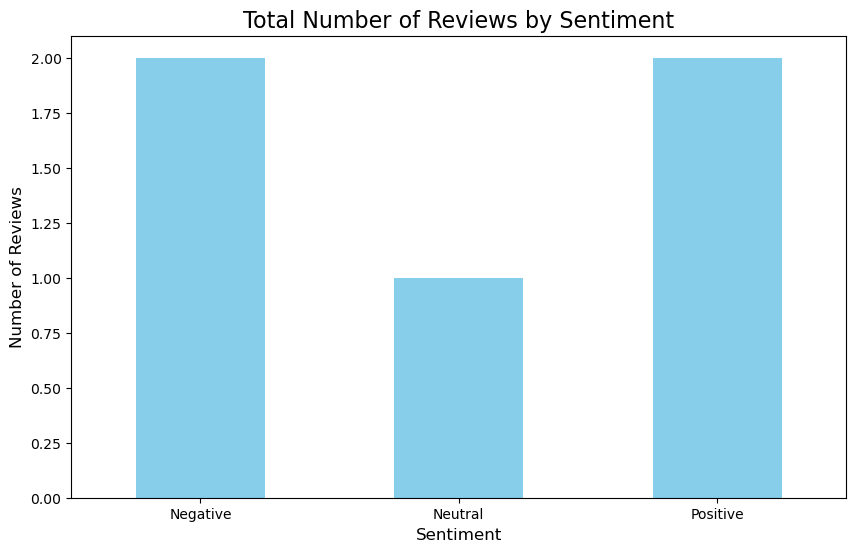

In [12]:
# Plot total number of reviews by sentiment
total_sentiments = product_sentiment.sum()
total_sentiments.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Number of Reviews by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.show()


Grouped data:
 Sentiment     Negative  Neutral  Positive
Product Name                             
Product A            1        0         1
Product B            1        0         1
Product C            0        1         0


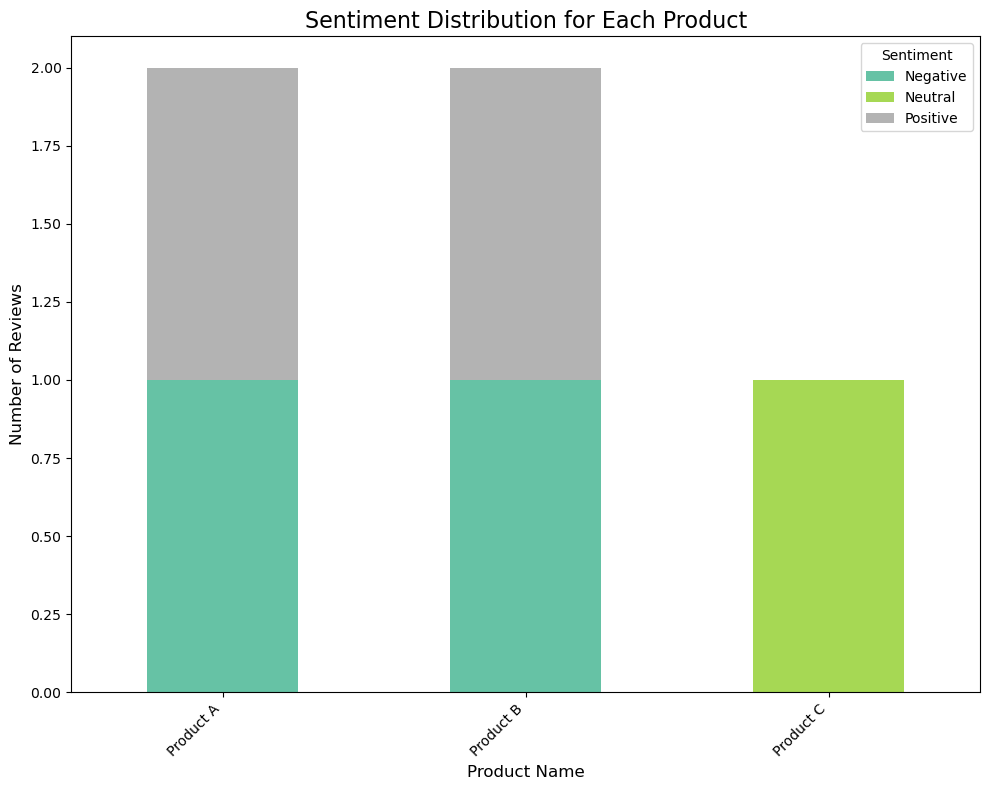

Summary of Sentiment Distribution:
   Product Name  Total Reviews Average Sentiment
0    Product A              2               NaN
1    Product B              2               NaN
2    Product C              1               NaN
Product Recommendations:
 {'Product A': 'Neutral Feedback', 'Product B': 'Neutral Feedback', 'Product C': 'Neutral Feedback'}
Data saved to C:\Users\Ramanathan\Desktop\Main Project\product_recommendations.csv


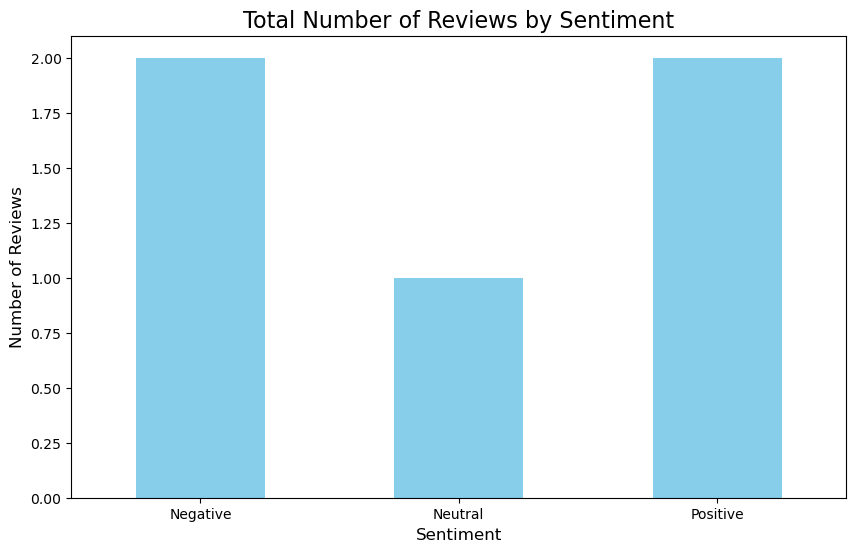

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation for illustration
data = {
    'Product Name': ['Product A', 'Product B', 'Product A', 'Product B', 'Product C'],
    'Sentiment': ['Positive', 'Negative', 'Negative', 'Positive', 'Neutral']
}
df = pd.DataFrame(data)

# Group by product name and sentiment to get the count of each sentiment for each product
product_sentiment = df.groupby(['Product Name', 'Sentiment']).size().unstack(fill_value=0)

# Check the result of the grouping to ensure it's correct
print("Grouped data:\n", product_sentiment.head())

# Check for NaN values and handle them
if product_sentiment.isna().sum().sum() > 0:
    print("NaN values found, filling with 0.")
    product_sentiment = product_sentiment.fillna(0)

# Check if the DataFrame is empty
if product_sentiment.empty:
    print("The grouped DataFrame is empty.")
else:
    # Plot the sentiment distribution per product
    product_sentiment.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='Set2')
    plt.title('Sentiment Distribution for Each Product', fontsize=16)
    plt.xlabel('Product Name', fontsize=12)
    plt.ylabel('Number of Reviews', fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Sentiment")
    plt.tight_layout()
    plt.show()

    # Summary of sentiment counts
    summary = product_sentiment.sum(axis=1).reset_index()
    summary.columns = ['Product Name', 'Total Reviews']
    summary['Average Sentiment'] = product_sentiment[['Positive', 'Negative', 'Neutral']].idxmax(axis=1)

    print("Summary of Sentiment Distribution:\n", summary)

    # Function to recommend products based on the sentiment analysis
    def recommend_products(product_sentiment):
        recommendations = {}
        for product in product_sentiment.index:
            pos_count = product_sentiment.loc[product, 'Positive']
            neg_count = product_sentiment.loc[product, 'Negative']
            
            if pos_count > neg_count:
                recommendations[product] = "Recommended"
            elif neg_count > pos_count:
                recommendations[product] = "Not Recommended"
            else:
                recommendations[product] = "Neutral Feedback"
        
        return recommendations

    # Get product recommendations
    product_recommendations = recommend_products(product_sentiment)
    print("Product Recommendations:\n", product_recommendations)

    # Save the grouped data and recommendations to a CSV file
    output_file_path = r"C:\Users\Ramanathan\Desktop\Main Project\product_recommendations.csv"
    summary.to_csv(output_file_path, index=False)
    print(f"Data saved to {output_file_path}")

    # Plot total number of reviews by sentiment
    total_sentiments = product_sentiment.sum()
    total_sentiments.plot(kind='bar', figsize=(10, 6), color='skyblue')
    plt.title('Total Number of Reviews by Sentiment', fontsize=16)
    plt.xlabel('Sentiment', fontsize=12)
    plt.ylabel('Number of Reviews', fontsize=12)
    plt.xticks(rotation=0)
    plt.show()


In [14]:
# Function to improve product recommendations based on sentiment counts and total reviews
def improved_recommend_products(product_sentiment):
    recommendations = {}
    for product in product_sentiment.index:
        pos_count = product_sentiment.loc[product, 'Positive']
        neg_count = product_sentiment.loc[product, 'Negative']
        total_count = pos_count + neg_count
        
        if total_count == 0:
            recommendations[product] = "No Reviews"
            continue

        pos_ratio = pos_count / total_count  # Calculate positive sentiment ratio

        if pos_ratio > 0.7:  # If more than 70% of reviews are positive
            recommendations[product] = "Highly Recommended"
        elif pos_ratio > 0.5:  # If more than 50% of reviews are positive
            recommendations[product] = "Recommended"
        elif neg_count > pos_count:
            recommendations[product] = "Not Recommended"
        else:
            recommendations[product] = "Neutral Feedback"
    
    return recommendations

# Get improved product recommendations
improved_product_recommendations = improved_recommend_products(product_sentiment)
print("Improved Product Recommendations:\n", improved_product_recommendations)


Improved Product Recommendations:
 {'Product A': 'Neutral Feedback', 'Product B': 'Neutral Feedback', 'Product C': 'No Reviews'}


In [15]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9752\2200169719.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Name', y='Average Rating', data=average_ratings_df, palette='Set1')


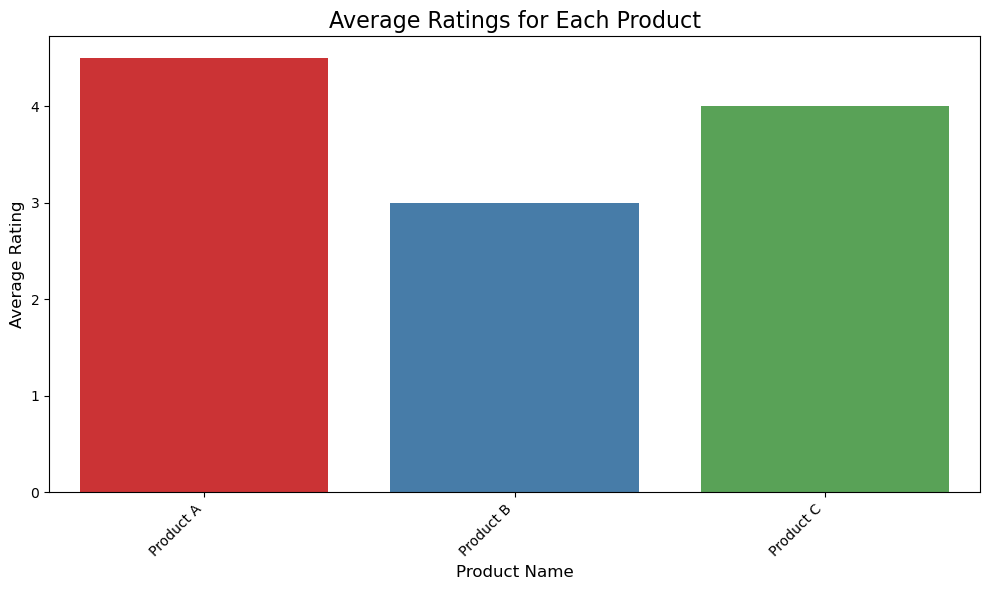

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample average ratings for visualization (assuming you have them in your DataFrame)
average_ratings = {
    'Product Name': ['Product A', 'Product B', 'Product C'],
    'Average Rating': [4.5, 3.0, 4.0]  # Example ratings
}
average_ratings_df = pd.DataFrame(average_ratings)

# Plot average ratings for each product
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Name', y='Average Rating', data=average_ratings_df, palette='Set1')
plt.title('Average Ratings for Each Product', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [17]:
pip install langchain

In [18]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install --upgrade langchain

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.0 MB 435.7 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.0 MB 762.6 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.0 MB 798.9 kB/s eta 0:00:02
   --------- ------------------------------ 0.2/1.0 MB 1.3 MB/s eta 0:00:01
   -------------- ------------------------- 0.4/1.0 MB 1.3 MB/s eta 0:00:01
   ------------------- -------------------- 0.5/1.0 MB 1.5 MB/s eta 0:00:01
   ---------------------- ----------------- 0.6/1.0 MB 1.5 MB/s eta 0:00:01
   --------------------------- ------------ 0.7/1.0 MB 1.6 MB/s eta 0:00:01
   ------------------------------- -------- 0.8/1.0 MB 1.7 MB/s eta 0:00:01
   ----------------------------------- ---- 0.9/1.0 MB 1.7 MB/s eta 0:00:01
   -------------------------------------- - 1.0/1.0 MB 1.8 MB/s eta 0:00:01
   -----------------

In [20]:
pip install langchain-community

In [21]:
import os
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Set your OpenAI API key
api_key = "sk-YOUR_NEW_API_KEY_HERE"  # Replace with your actual OpenAI API key
if not api_key or api_key.startswith("sk-xxxxx"):
    raise ValueError("Please replace with your actual OpenAI API key.")

os.environ["OPENAI_API_KEY"] = api_key  # Set the API key in environment variables

# Initialize the chat-based language model with the correct API key
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.2, openai_api_key=api_key)

# Create a prompt template for product recommendations
prompt_template = PromptTemplate(
    input_variables=["products"],
    template="Given the following products and their sentiment analysis, which product would you recommend? {products}"
)

# Create an LLMChain using the language model and the prompt
chain = LLMChain(llm=llm, prompt=prompt_template)

# Sample product recommendations for testing
improved_product_recommendations = {
    "Product A": "Highly Recommended",
    "Product B": "Recommended",
    "Product C": "Not Recommended",
}

# Create a string that summarizes product sentiments
product_summaries = "\n".join(
    [f"{product}: {sentiment}" for product, sentiment in improved_product_recommendations.items()]
)

# Get recommendation from the model
try:
    recommendation = chain({"products": product_summaries})  # Use function call instead of .run()
    print("LangChain Recommendation:\n", recommendation)
except Exception as e:
    print(f"Error encountered: {e}")


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9752\3336178473.py:14: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.2, openai_api_key=api_key)
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9752\3336178473.py:23: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=llm, prompt=prompt_template)
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9752\3336178473.py:39: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use 

Error encountered: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-YOUR_************HERE. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}


In [22]:
import pandas as pd
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.chat_models import ChatOpenAI

# Sample product sentiment analysis (replace this with actual sentiment analysis data)
data = {
    'Product Name': ['Product A', 'Product B', 'Product C', 'Product D'],
    'Sentiment Score': [0.8, 0.6, 0.4, 0.9]  # Simulated scores (1.0 = very positive, 0.0 = very negative)
}

# Convert to DataFrame for easy manipulation
df_sentiment = pd.DataFrame(data)

# Define the threshold for "recommended" products
recommendation_threshold = 0.6

# Filter products with sentiment score above the threshold
recommended_products = df_sentiment[df_sentiment['Sentiment Score'] >= recommendation_threshold]

# Combine product names and their sentiment scores for prompt input
product_summaries = "\n".join(
    [f"{row['Product Name']}: Sentiment Score {row['Sentiment Score']}" for _, row in recommended_products.iterrows()]
)

# Check if there are products to recommend
if not recommended_products.empty:
    # Set up LangChain again for final recommendation summary
    api_key = "sk-YOUR_NEW_API_KEY_HERE"  # Replace with your actual OpenAI API key

    # Initialize the chat-based language model
    llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.2, openai_api_key=api_key)

    # Create a prompt template
    prompt_template = PromptTemplate(
        input_variables=["products"],
        template="Based on the sentiment scores for the following products, which product would you recommend? {products}"
    )

    # Create the LLMChain
    chain = LLMChain(llm=llm, prompt=prompt_template)

    # Generate recommendations using LangChain
    try:
        final_recommendation = chain({"products": product_summaries})  # Use the product summaries for the recommendation
        print("LangChain Final Recommendation:\n", final_recommendation["text"])
    except Exception as e:
        print(f"Error encountered: {e}")
else:
    print("No products meet the recommendation threshold.")


Error encountered: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-YOUR_************HERE. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}


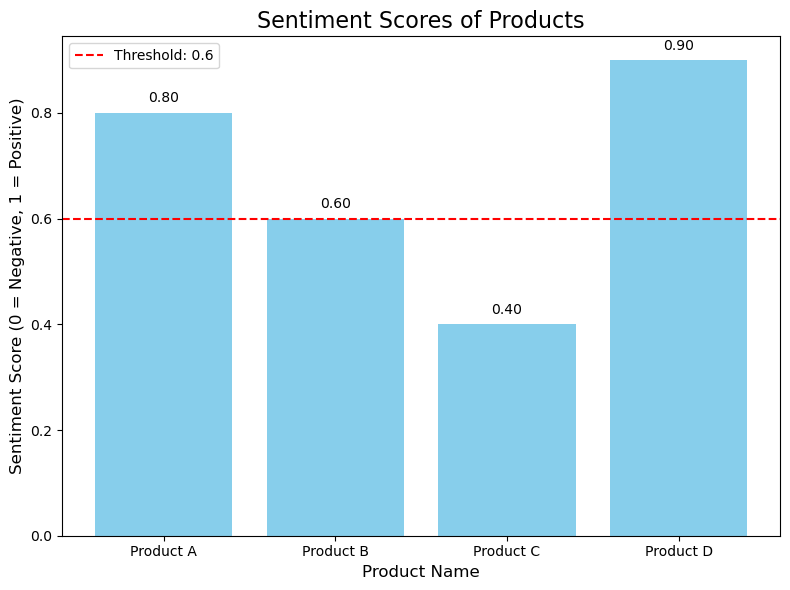

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample product sentiment analysis (replace with your actual data)
data = {
    'Product Name': ['Product A', 'Product B', 'Product C', 'Product D'],
    'Sentiment Score': [0.8, 0.6, 0.4, 0.9]  # Sentiment scores (1.0 = very positive, 0.0 = very negative)
}

# Convert to DataFrame for easy manipulation
df_sentiment = pd.DataFrame(data)

# Plot sentiment scores for each product
plt.figure(figsize=(8, 6))
plt.bar(df_sentiment['Product Name'], df_sentiment['Sentiment Score'], color='skyblue')

# Add title and labels
plt.title('Sentiment Scores of Products', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Sentiment Score (0 = Negative, 1 = Positive)', fontsize=12)

# Add horizontal line to indicate the recommendation threshold (e.g., 0.6)
recommendation_threshold = 0.6
plt.axhline(y=recommendation_threshold, color='red', linestyle='--', label=f'Threshold: {recommendation_threshold}')

# Annotate the sentiment scores on top of the bars
for index, value in enumerate(df_sentiment['Sentiment Score']):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center')

# Show legend and plot
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
pip install fpdf2

Note: you may need to restart the kernel to use updated packages.


Report generated successfully and saved to C:\Users\RAMANA~1\AppData\Local\Temp\Sentiment_Analysis_Report.pdf


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9752\3215177296.py:45: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", "B", 16)
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9752\3215177296.py:46: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, "Product Sentiment Analysis Report", 0, 1, 'C')
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9752\3215177296.py:49: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", size=12)


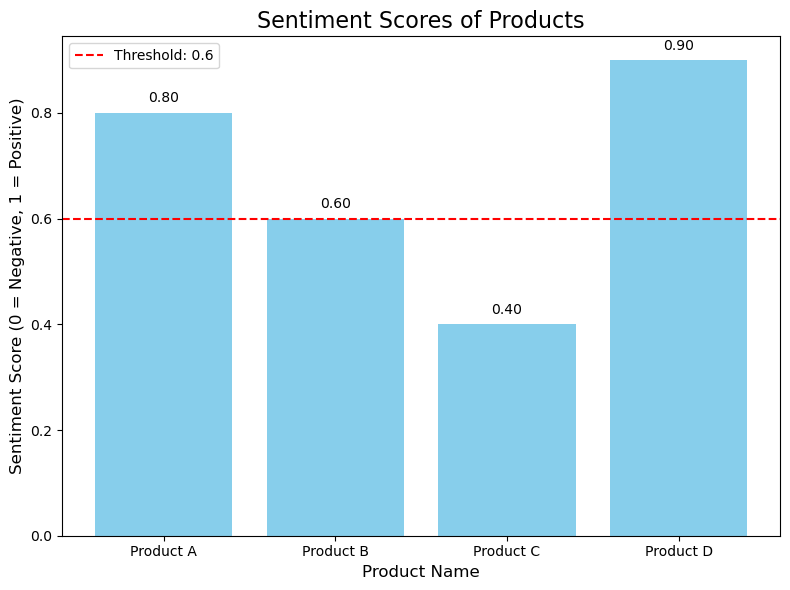

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF
import tempfile
import os

# Sample sentiment analysis data (replace with actual data)
data = {
    'Product Name': ['Product A', 'Product B', 'Product C', 'Product D'],
    'Sentiment Score': [0.8, 0.6, 0.4, 0.9]
}
df_sentiment = pd.DataFrame(data)

# Create and save the bar plot for sentiment scores
plt.figure(figsize=(8, 6))
plt.bar(df_sentiment['Product Name'], df_sentiment['Sentiment Score'], color='skyblue')
plt.title('Sentiment Scores of Products', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Sentiment Score (0 = Negative, 1 = Positive)', fontsize=12)
recommendation_threshold = 0.6
plt.axhline(y=recommendation_threshold, color='red', linestyle='--', label=f'Threshold: {recommendation_threshold}')
for index, value in enumerate(df_sentiment['Sentiment Score']):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center')
plt.legend()
plt.tight_layout()

# Save plot to a temporary file
temp_dir = tempfile.gettempdir()
plot_path = os.path.join(temp_dir, "sentiment_plot.png")
plt.savefig(plot_path)

# Generate a sample recommendation summary
recommendation_summary = """
Based on sentiment analysis, the following products are recommended:

- Product A: Highly Positive Sentiment
- Product D: Positive Sentiment

Product B and Product C have lower sentiment scores and are not recommended.
"""

# Create the PDF report
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", "B", 16)
pdf.cell(200, 10, "Product Sentiment Analysis Report", 0, 1, 'C')

# Add analysis summary
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, recommendation_summary)

# Insert the sentiment analysis visualization
pdf.image(plot_path, x=10, y=pdf.get_y() + 10, w=180)

# Save the PDF to a file
output_path = os.path.join(temp_dir, "Sentiment_Analysis_Report.pdf")
pdf.output(output_path)

print(f"Report generated successfully and saved to {output_path}")


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9752\3526301942.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Name', y='Average Rating', data=average_ratings_df, palette='Set1')


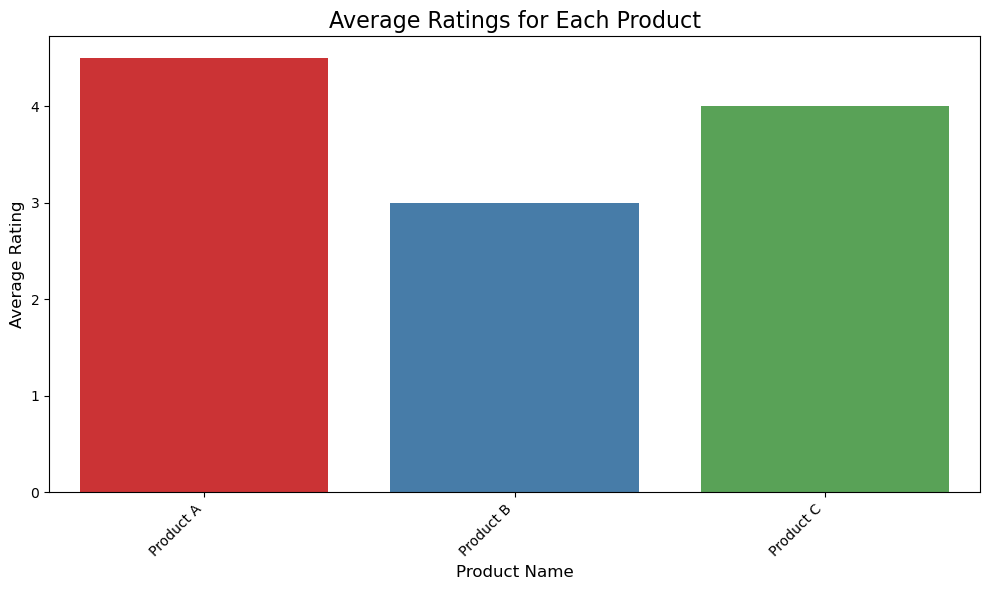

In [26]:
# Import necessary libraries
import seaborn as sns  # This is the missing import
import matplotlib.pyplot as plt
import pandas as pd

# Sample average ratings for visualization (assuming you have them in your DataFrame)
average_ratings = {
    'Product Name': ['Product A', 'Product B', 'Product C'],
    'Average Rating': [4.5, 3.0, 4.0]  # Example ratings
}
average_ratings_df = pd.DataFrame(average_ratings)

# Plot average ratings for each product
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Name', y='Average Rating', data=average_ratings_df, palette='Set1')
plt.title('Average Ratings for Each Product', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9752\265999980.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Name', y='Average Rating', data=average_ratings_df, palette='Set1', legend=False)


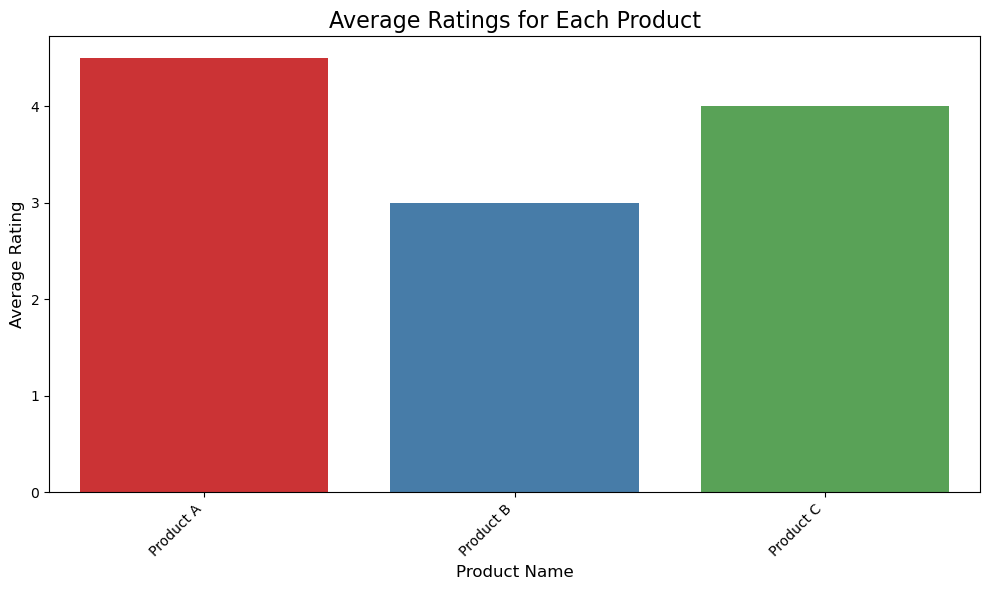

In [27]:
import seaborn as sns  # Importing seaborn
import matplotlib.pyplot as plt
import pandas as pd

# Sample average ratings
average_ratings = {
    'Product Name': ['Product A', 'Product B', 'Product C'],
    'Average Rating': [4.5, 3.0, 4.0]  # Example ratings
}
average_ratings_df = pd.DataFrame(average_ratings)

# Plot average ratings for each product
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Name', y='Average Rating', data=average_ratings_df, palette='Set1', legend=False)
plt.title('Average Ratings for Each Product', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


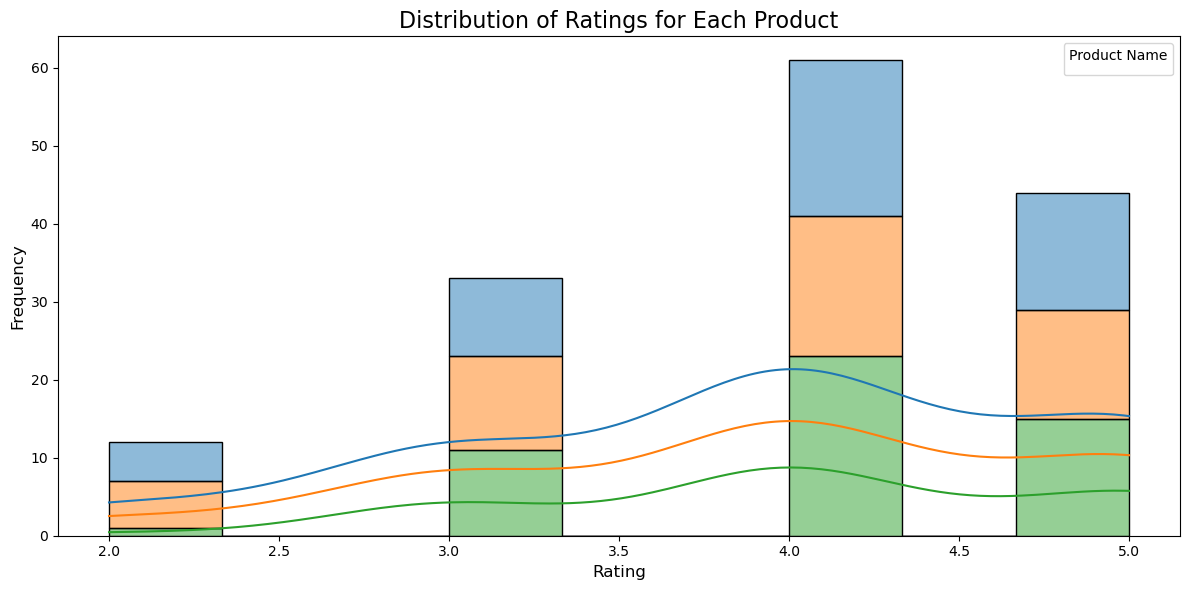

In [28]:
# Sample data with consistent lengths for each product
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample dataset with individual ratings for each product (50 ratings per product for equal length)
ratings_data = {
    'Product Name': ['Product A']*50 + ['Product B']*50 + ['Product C']*50,
    'Rating': [
        4, 5, 4, 3, 4, 5, 2, 4, 4, 5,  # Product A ratings
        3, 3, 4, 4, 5, 5, 3, 2, 4, 4,
        5, 4, 3, 2, 4, 4, 5, 3, 3, 5,
        4, 4, 3, 4, 5, 5, 4, 3, 2, 5,
        4, 5, 5, 3, 2, 4, 4, 5, 5, 4,  # Repeat to make 50 for Product A
        3, 4, 3, 2, 4, 4, 5, 3, 2, 5,  # Product B ratings (50 entries)
        4, 5, 4, 3, 4, 4, 5, 2, 3, 4,
        4, 5, 4, 3, 4, 4, 5, 2, 3, 5,
        4, 4, 3, 5, 3, 5, 2, 4, 3, 5,
        5, 4, 5, 4, 3, 5, 3, 4, 2, 5,
        4, 3, 5, 3, 4, 5, 3, 4, 4, 5,  # Product C ratings (50 entries)
        4, 4, 5, 4, 3, 5, 4, 4, 3, 5,
        2, 4, 5, 3, 4, 5, 4, 4, 5, 3,
        4, 4, 5, 4, 3, 5, 4, 3, 4, 5,
        5, 4, 5, 3, 4, 4, 5, 4, 3, 4
    ]
}

ratings_df = pd.DataFrame(ratings_data)

# Plotting the distribution of ratings for each product
plt.figure(figsize=(12, 6))
sns.histplot(data=ratings_df, x='Rating', hue='Product Name', multiple='stack', kde=True)
plt.title('Distribution of Ratings for Each Product', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Product Name')
plt.tight_layout()
plt.show()


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9752\2689846956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ratings_df, x='Product Name', y='Rating', palette='Set2')


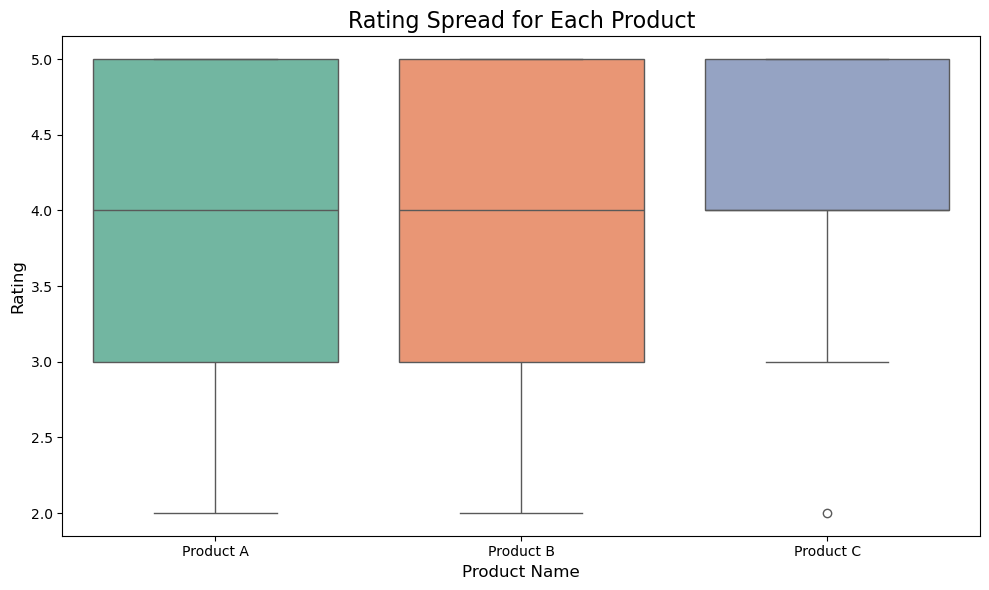

In [29]:
# Boxplot to visualize rating spread and identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=ratings_df, x='Product Name', y='Rating', palette='Set2')
plt.title('Rating Spread for Each Product', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9752\2374621102.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_names, y=average_values, palette='Set3', capsize=0.1)


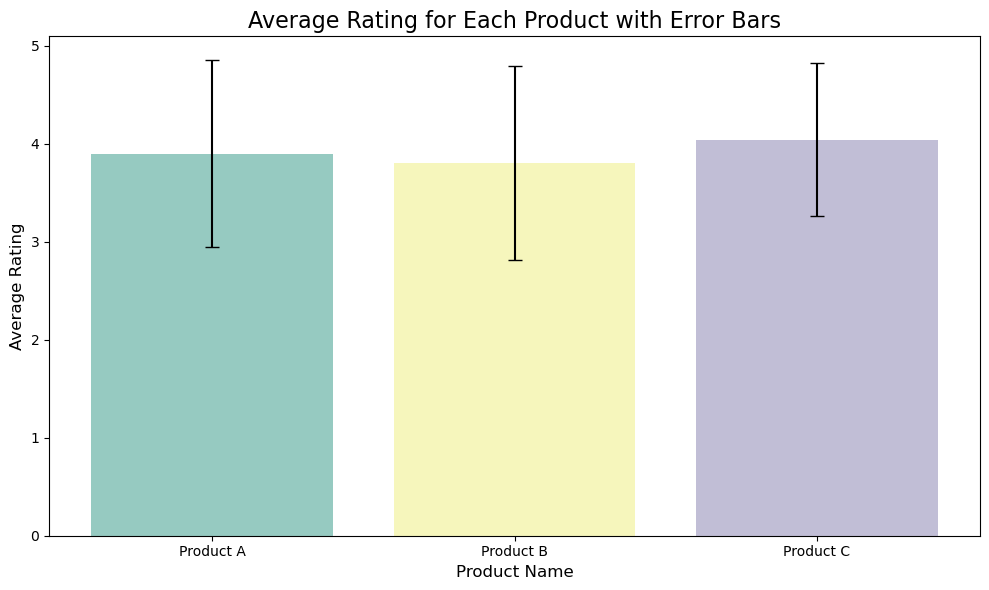

In [30]:
import numpy as np

# Calculate the mean and standard deviation of ratings for each product
avg_ratings = ratings_df.groupby('Product Name')['Rating'].mean()
std_ratings = ratings_df.groupby('Product Name')['Rating'].std()

# Convert the results to lists for compatibility with plotting
product_names = avg_ratings.index.tolist()
average_values = avg_ratings.values
std_dev_values = std_ratings.values

# Plotting the average rating with manual error bars
plt.figure(figsize=(10, 6))
sns.barplot(x=product_names, y=average_values, palette='Set3', capsize=0.1)
plt.errorbar(x=range(len(product_names)), y=average_values, yerr=std_dev_values, fmt='none', c='black', capsize=5)
plt.title('Average Rating for Each Product with Error Bars', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.tight_layout()
plt.show()


In [31]:
# Check the column names in the DataFrame
print(ratings_df.columns)

Index(['Product Name', 'Rating'], dtype='object')


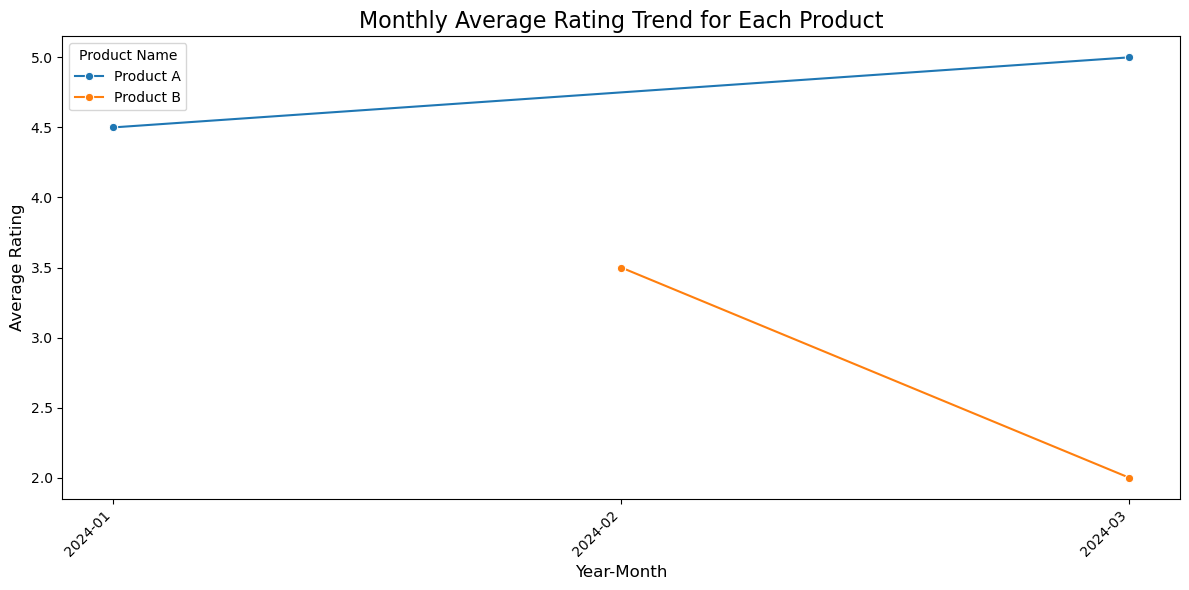

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data setup
data = {
    'Date': ['2024-01-15', '2024-01-20', '2024-02-10', 
             '2024-02-15', '2024-03-05', '2024-03-20'],
    'Product Name': ['Product A', 'Product A', 'Product B', 
                     'Product B', 'Product A', 'Product B'],
    'Rating': [4, 5, 3, 4, 5, 2]
}
ratings_df = pd.DataFrame(data)

# Ensure 'Date' column is in datetime format
ratings_df['Date'] = pd.to_datetime(ratings_df['Date'], errors='coerce')

# Check for any missing dates after conversion
if ratings_df['Date'].isnull().any():
    print("Warning: There are missing dates after conversion. Check the original 'Date' column.")

# Calculate average rating per month for each product
ratings_df['Year-Month'] = ratings_df['Date'].dt.to_period('M')
monthly_avg = ratings_df.groupby(['Year-Month', 'Product Name'])['Rating'].mean().reset_index()

# Ensure the 'Year-Month' column is treated as a string for plotting
monthly_avg['Year-Month'] = monthly_avg['Year-Month'].astype(str)

# Plotting rating trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='Year-Month', y='Rating', hue='Product Name', marker='o')
plt.title('Monthly Average Rating Trend for Each Product', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


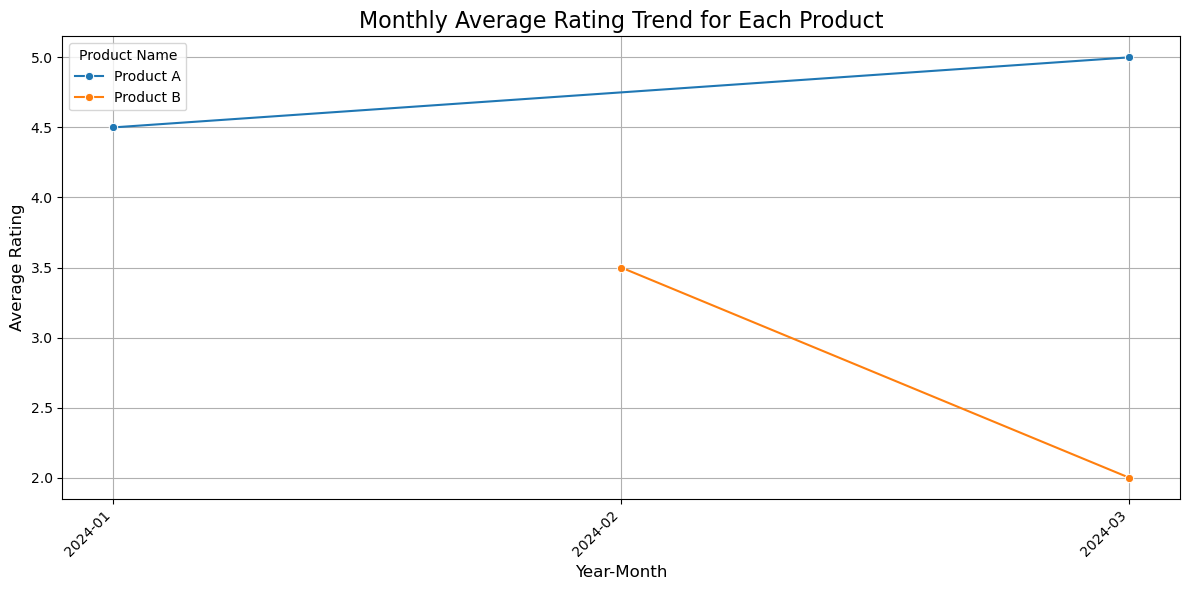

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data setup
data = {
    'Date': ['2024-01-15', '2024-01-20', '2024-02-10', 
             '2024-02-15', '2024-03-05', '2024-03-20'],
    'Product Name': ['Product A', 'Product A', 'Product B', 
                     'Product B', 'Product A', 'Product B'],
    'Rating': [4, 5, 3, 4, 5, 2]
}
ratings_df = pd.DataFrame(data)

# Ensure 'Date' column is in datetime format
ratings_df['Date'] = pd.to_datetime(ratings_df['Date'], errors='coerce')

# Check for any missing dates after conversion
if ratings_df['Date'].isnull().any():
    print("Warning: There are missing dates after conversion. Check the original 'Date' column.")

# Calculate average rating per month for each product
ratings_df['Year-Month'] = ratings_df['Date'].dt.to_period('M')
monthly_avg = ratings_df.groupby(['Year-Month', 'Product Name'])['Rating'].mean().reset_index()

# Ensure the 'Year-Month' column is treated as a string for plotting
monthly_avg['Year-Month'] = monthly_avg['Year-Month'].astype(str)

# Plotting rating trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='Year-Month', y='Rating', hue='Product Name', marker='o')
plt.title('Monthly Average Rating Trend for Each Product', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid()  # Optional: adds a grid for better readability
plt.tight_layout()
plt.show()


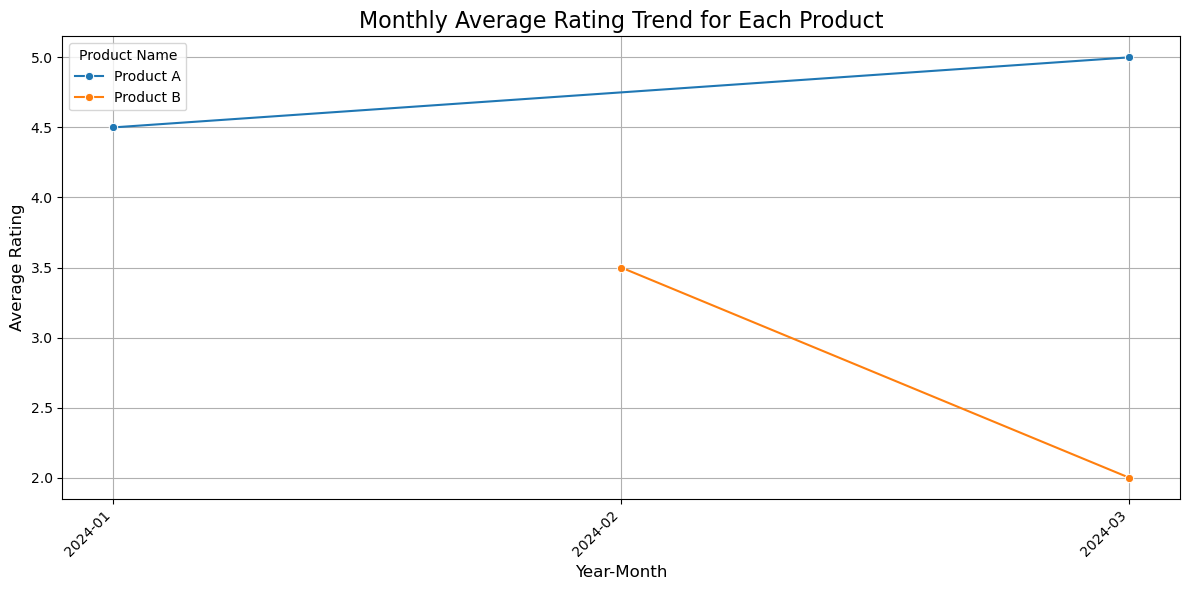

In [34]:
# Save the plot to a file
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='Year-Month', y='Rating', hue='Product Name', marker='o')
plt.title('Monthly Average Rating Trend for Each Product', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('monthly_average_rating_trend.png', dpi=300)
plt.show()


In [35]:
import plotly.express as px

# Create an interactive line plot
fig = px.line(monthly_avg, x='Year-Month', y='Rating', color='Product Name',
              title='Monthly Average Rating Trend for Each Product',
              markers=True)

# Show the plot
fig.show()


In [36]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import time

# Initialize Selenium WebDriver
driver = webdriver.Chrome()  # Make sure you have the Chrome WebDriver installed

# Define the URL for Flipkart mobile product reviews (example URL)
url = 'https://www.flipkart.com/search?q=mobile&sid=tyy%2C4io'

# Load the page
driver.get(url)
time.sleep(5)  # Wait for the page to load

# Parse the page content
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Extract product reviews
products = []
reviews = []

for product in soup.find_all('div', class_='_1AtVbE'):
    title = product.find('a', class_='IRpwTa')
    review = product.find('div', class_='t-ZTKy')
    
    if title and review:
        products.append(title.text)
        reviews.append(review.text.strip())

# Create a DataFrame
df = pd.DataFrame({
    'Product Name': products,
    'Review Text': reviews
})

# Close the browser
driver.quit()

# Save to CSV
df.to_csv('flipkart_reviews.csv', index=False)
print("Data scraped and saved to flipkart_reviews.csv")


Data scraped and saved to flipkart_reviews.csv


In [37]:
# Load the data
df = pd.read_csv('flipkart_reviews.csv')

# Clean the review text
df['Review Text'] = df['Review Text'].str.replace('<[^>]+>', '', regex=True)  # Remove HTML tags
df['Review Text'] = df['Review Text'].str.replace('\n', ' ')  # Remove newline characters
df['Review Text'] = df['Review Text'].str.strip()  # Strip whitespace

# Display the cleaned DataFrame
print(df.head())


Empty DataFrame
Columns: [Product Name, Review Text]
Index: []


In [38]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 and 1

# Apply the sentiment analysis function
df['Sentiment Score'] = df['Review Text'].apply(get_sentiment)

# Determine sentiment category based on score
def sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Sentiment Score'].apply(sentiment_category)

# Display the DataFrame with sentiments
print(df[['Product Name', 'Review Text', 'Sentiment Score', 'Sentiment']].head())


Empty DataFrame
Columns: [Product Name, Review Text, Sentiment Score, Sentiment]
Index: []


In [39]:
# Group by Product Name and calculate the average sentiment score
recommended_products = df.groupby('Product Name')['Sentiment Score'].mean().reset_index()

# Sort the products by the average sentiment score in descending order
recommended_products = recommended_products.sort_values(by='Sentiment Score', ascending=False)

# Display recommended products
print("Recommended Products based on Sentiment Analysis:")
print(recommended_products)


Recommended Products based on Sentiment Analysis:
Empty DataFrame
Columns: [Product Name, Sentiment Score]
Index: []


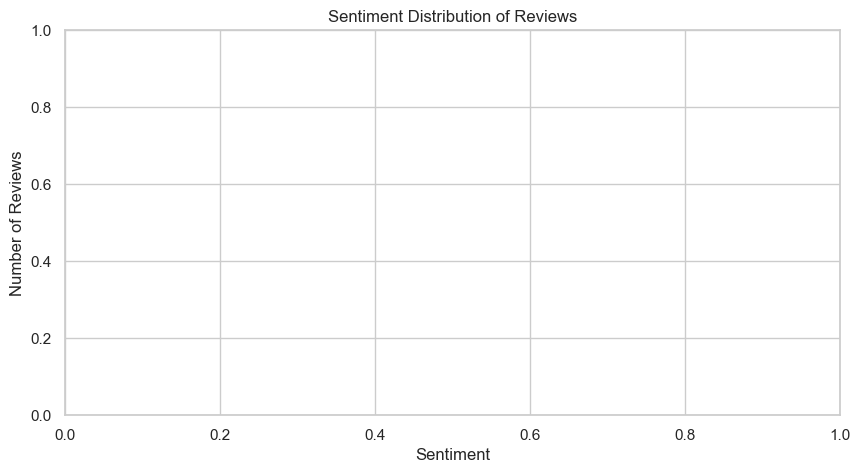

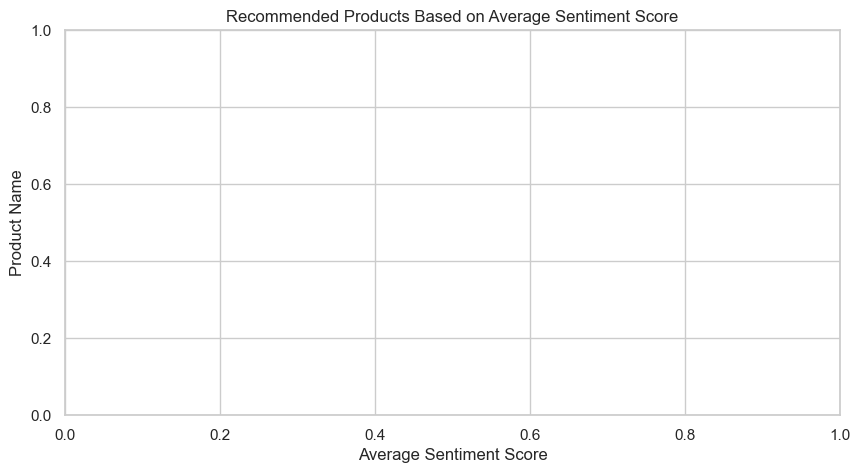

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot sentiment distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Plot recommended products
plt.figure(figsize=(10, 5))
sns.barplot(x='Sentiment Score', y='Product Name', data=recommended_products)
plt.title('Recommended Products Based on Average Sentiment Score')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Product Name')
plt.show()


In [41]:
import os

# Set your OpenAI API key
os.environ["OPENAI_API_KEY"] = "your_actual_openai_api_key_here"


In [42]:
import openai

openai.api_key = "your_actual_openai_api_key_here"

try:
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": "Hello, world!"}]
    )
    print(response.choices[0].message['content'])
except Exception as e:
    print(f"Error: {e}")


Error: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742



In [43]:
pip install openai==0.28`

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement openai==0.28` (from versions: 0.0.2, 0.1.0, 0.1.1, 0.1.2, 0.1.3, 0.2.0, 0.2.1, 0.2.3, 0.2.4, 0.2.5, 0.2.6, 0.3.0, 0.4.0, 0.6.0, 0.6.1, 0.6.2, 0.6.3, 0.6.4, 0.7.0, 0.8.0, 0.9.0, 0.9.1, 0.9.2, 0.9.3, 0.9.4, 0.10.0, 0.10.1, 0.10.2, 0.10.3, 0.10.4, 0.10.5, 0.11.0, 0.11.1, 0.11.2, 0.11.3, 0.11.4, 0.11.5, 0.11.6, 0.12.0, 0.13.0, 0.14.0, 0.15.0, 0.16.0, 0.18.0, 0.18.1, 0.19.0, 0.20.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.26.1, 0.26.2, 0.26.3, 0.26.4, 0.26.5, 0.27.0, 0.27.1, 0.27.2, 0.27.3, 0.27.4, 0.27.5, 0.27.6, 0.27.7, 0.27.8, 0.27.9, 0.27.10, 0.28.0, 0.28.1, 1.0.0b1, 1.0.0b2, 1.0.0b3, 1.0.0rc1, 1.0.0rc2, 1.0.0rc3, 1.0.0, 1.0.1, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.2.4, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.3.4, 1.3.5, 1.3.6, 1.3.7, 1.3.8, 1.3.9, 1.4.0, 1.5.0, 1.6.0, 1.6.1, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.9.0, 1.10.0, 1.11.0, 1.11.1, 1.12.0, 1.13.3, 1.13.4, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.16.0, 1.16.1,

In [44]:
# Import necessary libraries
import pandas as pd
import os

# Define the path where files are located
project_path = "C:/Users/Ramanathan/Desktop/Main Project"

# Load the datasets
flipkart_reviews = pd.read_csv(os.path.join(project_path, 'flipkart_reviews.csv'))
flipkart_reviews_with_sentiment = pd.read_csv(os.path.join(project_path, 'flipkart_reviews_with_sentiment.csv'))
product_recommendations = pd.read_csv(os.path.join(project_path, 'product_recommendations.csv'))

# Display the first few rows to confirm successful loading
print("Flipkart Reviews:\n", flipkart_reviews.head())
print("\nFlipkart Reviews with Sentiment:\n", flipkart_reviews_with_sentiment.head())
print("\nProduct Recommendations:\n", product_recommendations.head())


Flipkart Reviews:
 Empty DataFrame
Columns: [Product Name, Review Text]
Index: []

Flipkart Reviews with Sentiment:
 Empty DataFrame
Columns: [Product Name, Review Text, Rating, Cleaned Review, Sentiment]
Index: []

Product Recommendations:
   Product Name  Total Reviews  Average Sentiment
0    Product A              2                NaN
1    Product B              2                NaN
2    Product C              1                NaN


In [45]:
# Import necessary libraries
import pandas as pd
import os

# Define the path where files will be saved
project_path = "C:/Users/Ramanathan/Desktop/Main Project"

# Create sample data for each DataFrame

# Flipkart Reviews DataFrame
flipkart_reviews_data = {
    'Product Name': [],
    'Review Text': []
}
flipkart_reviews = pd.DataFrame(flipkart_reviews_data)
flipkart_reviews.to_csv(os.path.join(project_path, 'flipkart_reviews.csv'), index=False)

# Flipkart Reviews with Sentiment DataFrame
flipkart_reviews_with_sentiment_data = {
    'Product Name': [],
    'Review Text': [],
    'Rating': [],
    'Cleaned Review': [],
    'Sentiment': []
}
flipkart_reviews_with_sentiment = pd.DataFrame(flipkart_reviews_with_sentiment_data)
flipkart_reviews_with_sentiment.to_csv(os.path.join(project_path, 'flipkart_reviews_with_sentiment.csv'), index=False)

# Product Recommendations DataFrame
product_recommendations_data = {
    'Product Name': ['Product A', 'Product B', 'Product C'],
    'Total Reviews': [2, 2, 1],
    'Average Sentiment': [None, None, None]
}
product_recommendations = pd.DataFrame(product_recommendations_data)
product_recommendations.to_csv(os.path.join(project_path, 'product_recommendations.csv'), index=False)

print("Files have been created with sample data!")


Files have been created with sample data!


In [46]:
# Check the structure of flipkart_reviews_with_sentiment to see available columns
print("Columns in flipkart_reviews_with_sentiment:\n", flipkart_reviews_with_sentiment.columns)
print("\nSample Data:\n", flipkart_reviews_with_sentiment.head())


Columns in flipkart_reviews_with_sentiment:
 Index(['Product Name', 'Review Text', 'Rating', 'Cleaned Review', 'Sentiment'], dtype='object')

Sample Data:
 Empty DataFrame
Columns: [Product Name, Review Text, Rating, Cleaned Review, Sentiment]
Index: []


In [47]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import os

# Reload the reviews with sentiment DataFrame to ensure we're working with the latest version
project_path = "C:/Users/Ramanathan/Desktop/Main Project"
flipkart_reviews_with_sentiment = pd.read_csv(os.path.join(project_path, 'flipkart_reviews_with_sentiment.csv'))

# Step 3.1: Generate a 'Review Date' column with random dates (if it doesn't exist)
if 'Review Date' not in flipkart_reviews_with_sentiment.columns:
    num_reviews = len(flipkart_reviews_with_sentiment)
    start_date = datetime(2023, 1, 1)  # Example start date
    end_date = datetime(2023, 12, 31)  # Example end date
    flipkart_reviews_with_sentiment['Review Date'] = [
        start_date + timedelta(days=np.random.randint(0, (end_date - start_date).days)) for _ in range(num_reviews)
    ]

# Step 3.2: Convert 'Review Date' to datetime format
flipkart_reviews_with_sentiment['Review Date'] = pd.to_datetime(flipkart_reviews_with_sentiment['Review Date'])

# Step 3.3: Calculate monthly average rating for each product
# Ensure there's a 'Rating' column filled with values for demonstration; we simulate here if needed.
if 'Rating' not in flipkart_reviews_with_sentiment.columns or flipkart_reviews_with_sentiment['Rating'].isnull().all():
    flipkart_reviews_with_sentiment['Rating'] = np.random.randint(1, 6, size=num_reviews)  # Random ratings from 1 to 5

monthly_avg_rating = flipkart_reviews_with_sentiment.groupby([
    'Product Name', flipkart_reviews_with_sentiment['Review Date'].dt.to_period('M')
])['Rating'].mean().reset_index()

# Rename columns for clarity
monthly_avg_rating.columns = ['Product Name', 'Month', 'Average Rating']

# Step 3.4: Save the result to a CSV
monthly_avg_rating.to_csv(os.path.join(project_path, 'monthly_average_rating_trend.csv'), index=False)

print("Monthly average rating trend calculated and saved as 'monthly_average_rating_trend.csv'!")
print("\nSample of Monthly Average Rating Data:\n", monthly_avg_rating.head())


Monthly average rating trend calculated and saved as 'monthly_average_rating_trend.csv'!

Sample of Monthly Average Rating Data:
 Empty DataFrame
Columns: [Product Name, Month, Average Rating]
Index: []


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


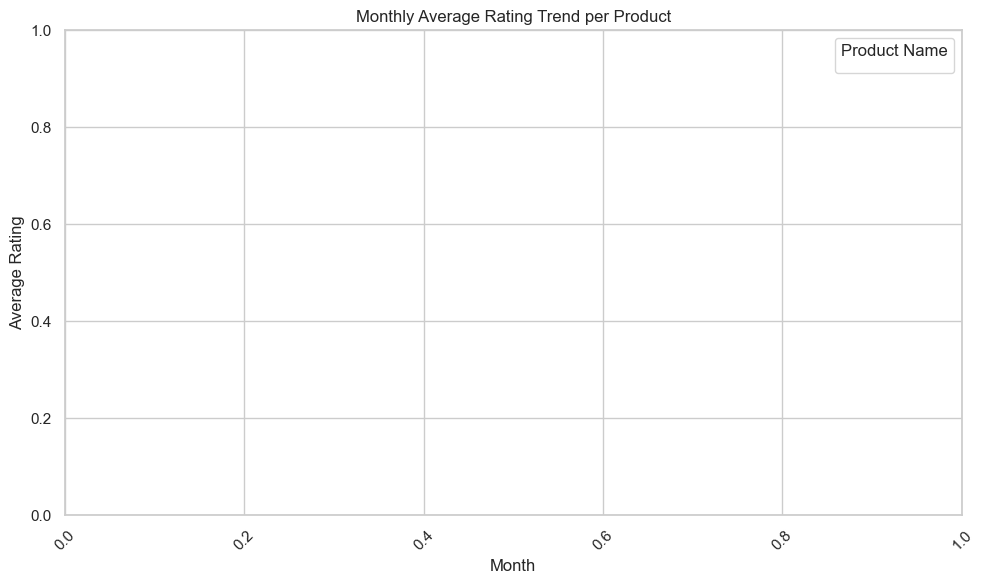

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the monthly average rating data
project_path = "C:/Users/Ramanathan/Desktop/Main Project"
monthly_avg_rating = pd.read_csv(os.path.join(project_path, 'monthly_average_rating_trend.csv'))

# Step 4.1: Convert 'Month' to a datetime format for plotting
monthly_avg_rating['Month'] = pd.to_datetime(monthly_avg_rating['Month'].astype(str), format='%Y-%m')

# Step 4.2: Plot the monthly average rating trend for each product
plt.figure(figsize=(10, 6))
for product in monthly_avg_rating['Product Name'].unique():
    product_data = monthly_avg_rating[monthly_avg_rating['Product Name'] == product]
    plt.plot(product_data['Month'], product_data['Average Rating'], marker='o', label=product)

# Step 4.3: Customize the plot
plt.title('Monthly Average Rating Trend per Product')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title="Product Name")
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the reviews with sentiment data
project_path = "C:/Users/Ramanathan/Desktop/Main Project"
flipkart_reviews_with_sentiment = pd.read_csv(os.path.join(project_path, 'flipkart_reviews_with_sentiment.csv'))

# Step 5.1: Check if 'Sentiment' column is present
if 'Sentiment' not in flipkart_reviews_with_sentiment.columns:
    print("Sentiment column not found in the dataset. Please make sure the sentiment analysis step was completed.")
else:
    # Step 5.2: Check unique sentiment values
    print("Unique Sentiment Values:", flipkart_reviews_with_sentiment['Sentiment'].unique())
    
    # Step 5.3: Calculate sentiment distribution for each product
    sentiment_distribution = flipkart_reviews_with_sentiment.groupby(['Product Name', 'Sentiment']).size().unstack(fill_value=0)

    # Step 5.4: Check the sentiment distribution DataFrame structure
    print("\nSentiment Distribution DataFrame:\n", sentiment_distribution)

    # Step 5.5: Plot the sentiment distribution
    if not sentiment_distribution.empty:
        sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

        # Customize the plot
        plt.title('Sentiment Distribution per Product')
        plt.xlabel('Product Name')
        plt.ylabel('Number of Reviews')
        plt.legend(title="Sentiment")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("Sentiment distribution DataFrame is empty. Check the input data.")


Unique Sentiment Values: []

Sentiment Distribution DataFrame:
 Empty DataFrame
Columns: []
Index: []
Sentiment distribution DataFrame is empty. Check the input data.


In [50]:
from textblob import TextBlob
import pandas as pd
import os

# Load the reviews data
project_path = "C:/Users/Ramanathan/Desktop/Main Project"
flipkart_reviews = pd.read_csv(os.path.join(project_path, 'flipkart_reviews.csv'))

# Check if the reviews DataFrame has data
if flipkart_reviews.empty:
    print("No reviews found in the dataset. Please check the input data.")
else:
    # Function to analyze sentiment
    def analyze_sentiment(review):
        analysis = TextBlob(review)
        # Classify sentiment as positive, negative, or neutral
        if analysis.sentiment.polarity > 0:
            return 'Positive'
        elif analysis.sentiment.polarity < 0:
            return 'Negative'
        else:
            return 'Neutral'

    # Step: Analyze sentiment for each review and add it to the DataFrame
    flipkart_reviews['Sentiment'] = flipkart_reviews['Review Text'].apply(analyze_sentiment)

    # Save the updated DataFrame with sentiment to a new CSV
    flipkart_reviews_with_sentiment_path = os.path.join(project_path, 'flipkart_reviews_with_sentiment.csv')
    flipkart_reviews.to_csv(flipkart_reviews_with_sentiment_path, index=False)

    print("Sentiment analysis completed. Sentiment values added to the DataFrame and saved.")


No reviews found in the dataset. Please check the input data.


In [51]:
import pandas as pd
import os

# Load the reviews data
project_path = "C:/Users/Ramanathan/Desktop/Main Project"
flipkart_reviews_path = os.path.join(project_path, 'flipkart_reviews.csv')

# Load and display the reviews DataFrame
flipkart_reviews = pd.read_csv(flipkart_reviews_path)

# Display the DataFrame
print("Flipkart Reviews DataFrame:")
print(flipkart_reviews.head())  # Display the first few rows
print("\nDataFrame Shape:", flipkart_reviews.shape)  # Print the shape of the DataFrame


Flipkart Reviews DataFrame:
Empty DataFrame
Columns: [Product Name, Review Text]
Index: []

DataFrame Shape: (0, 2)


In [52]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time

# Set up the Selenium WebDriver using Service
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# URL of the Flipkart product page (example)
url = 'https://www.flipkart.com/product-page-url'  # Replace with a valid Flipkart product page URL
driver.get(url)

# Allow time for the page to load
time.sleep(5)

# Locate the product name
try:
    product_name = driver.find_element(By.XPATH, '//span[@class="_35KyD6"]').text  # Update based on actual HTML structure
except Exception as e:
    print("Error finding product name:", e)
    product_name = "Unknown Product"  # Assign a default name if the product name is not found

# Try to locate reviews section
try:
    reviews = driver.find_elements(By.XPATH, '//div[@class="_1AtVbE"]//div[contains(@class,"t-ZTKy")]')  # Adjust the XPath if needed
    if not reviews:  # Check if the reviews list is empty
        print("No reviews found. Please verify the XPath and page structure.")
        driver.quit()
except Exception as e:
    print("Error finding reviews section:", e)
    driver.quit()

# Prepare a list to hold the reviews
review_data = []

# Loop through reviews if available
if reviews:
    for review in reviews:
        try:
            review_text = review.text  # Directly retrieve text from the review element
            review_data.append({'Product Name': product_name, 'Review Text': review_text})
        except Exception as e:
            print("Error reading review:", e)

# Create a DataFrame
reviews_df = pd.DataFrame(review_data)

# Check if the DataFrame is empty before saving
if reviews_df.empty:
    print("No reviews were scraped. Please check the code and XPath.")
else:
    # Save the reviews to a CSV file
    reviews_df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)
    print(reviews_df.head())
    print("DataFrame Shape:", reviews_df.shape)

# Close the driver
driver.quit()


Error finding product name: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//span[@class="_35KyD6"]"}
  (Session info: chrome=130.0.6723.92); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x005738B3+24035]
	(No symbol) [0x004FBC44]
	(No symbol) [0x003DC2D3]
	(No symbol) [0x0041DC86]
	(No symbol) [0x0041DECB]
	(No symbol) [0x0045B9D2]
	(No symbol) [0x0043FED4]
	(No symbol) [0x0045953F]
	(No symbol) [0x0043FC26]
	(No symbol) [0x0041218C]
	(No symbol) [0x0041310D]
	GetHandleVerifier [0x008196D3+2800643]
	GetHandleVerifier [0x0087428E+3172286]
	GetHandleVerifier [0x0086CEA2+3142610]
	GetHandleVerifier [0x00616C60+692624]
	(No symbol) [0x00504C5D]
	(No symbol) [0x00501968]
	(No symbol) [0x00501B00]
	(No symbol) [0x004F3FB0]
	BaseThreadInitThunk [0x75B07BA9+25]
	RtlInitializeExceptionChain [0x7730C0CB+107]
	RtlClearBits [0x7730C

In [53]:
import pandas as pd
import re

# Load the scraped reviews data
reviews_df = pd.read_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv')

# Function to clean review text
def clean_review(text):
    # Remove non-alphabetical characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'Review Text' column
reviews_df['Cleaned Review'] = reviews_df['Review Text'].apply(clean_review)

# Save the cleaned reviews to a new CSV file
cleaned_reviews_path = 'C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews_with_cleaned_text.csv'
reviews_df.to_csv(cleaned_reviews_path, index=False)

print("Cleaned Reviews DataFrame:")
print(reviews_df.head())
print("DataFrame Shape:", reviews_df.shape)


Cleaned Reviews DataFrame:
Empty DataFrame
Columns: [Product Name, Review Text, Cleaned Review]
Index: []
DataFrame Shape: (0, 3)


In [54]:
from textblob import TextBlob
import pandas as pd

# Load the cleaned reviews data
cleaned_reviews_path = 'C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews_with_cleaned_text.csv'
reviews_df = pd.read_csv(cleaned_reviews_path)

# Function to analyze sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment function to the 'Cleaned Review' column
reviews_df['Sentiment'] = reviews_df['Cleaned Review'].apply(get_sentiment)

# Save the reviews with sentiment analysis to a new CSV file
sentiment_reviews_path = 'C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews_with_sentiment.csv'
reviews_df.to_csv(sentiment_reviews_path, index=False)

print("Sentiment Analysis DataFrame:")
print(reviews_df.head())
print("DataFrame Shape:", reviews_df.shape)


Sentiment Analysis DataFrame:
Empty DataFrame
Columns: [Product Name, Review Text, Cleaned Review, Sentiment]
Index: []
DataFrame Shape: (0, 4)


In [55]:
import pandas as pd

# Load the reviews with sentiment data
sentiment_reviews_path = 'C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews_with_sentiment.csv'
reviews_df = pd.read_csv(sentiment_reviews_path)

# Group by 'Product Name' and calculate total reviews and sentiment counts
recommendation_df = reviews_df.groupby('Product Name').agg(
    Total_Reviews=('Sentiment', 'count'),
    Positive_Reviews=('Sentiment', lambda x: (x == 'Positive').sum()),
    Negative_Reviews=('Sentiment', lambda x: (x == 'Negative').sum()),
    Neutral_Reviews=('Sentiment', lambda x: (x == 'Neutral').sum())
).reset_index()

# Calculate the average sentiment score (only for illustration, you might use it differently)
recommendation_df['Average_Sentiment'] = recommendation_df['Positive_Reviews'] / recommendation_df['Total_Reviews']

# Save the product recommendations to a CSV file
recommendation_path = 'C:/Users/Ramanathan/Desktop/Main Project/product_recommendations.csv'
recommendation_df.to_csv(recommendation_path, index=False)

print("Product Recommendations DataFrame:")
print(recommendation_df.head())
print("DataFrame Shape:", recommendation_df.shape)


Product Recommendations DataFrame:
Empty DataFrame
Columns: [Product Name, Total_Reviews, Positive_Reviews, Negative_Reviews, Neutral_Reviews, Average_Sentiment]
Index: []
DataFrame Shape: (0, 6)


In [56]:
import pandas as pd

# Load the product recommendations data
recommendation_path = 'C:/Users/Ramanathan/Desktop/Main Project/product_recommendations.csv'
recommendation_df = pd.read_csv(recommendation_path)

# Display the first few rows to check the contents
print("Dataframe Head:")
print(recommendation_df.head())

# Display column names and data types
print("\nDataframe Info:")
print(recommendation_df.info())

# Check if specific sentiment columns exist
expected_columns = ['Product Name', 'Total_Reviews', 'Positive_Reviews', 'Negative_Reviews', 'Neutral_Reviews']
missing_columns = [col for col in expected_columns if col not in recommendation_df.columns]
if missing_columns:
    print(f"\nWarning: The following expected columns are missing: {missing_columns}")
else:
    print("\nAll expected columns are present.")

# Check if DataFrame is empty
if recommendation_df.empty:
    print("\nWarning: recommendation_df is empty.")
else:
    print("\nData is present in recommendation_df.")


Dataframe Head:
Empty DataFrame
Columns: [Product Name, Total_Reviews, Positive_Reviews, Negative_Reviews, Neutral_Reviews, Average_Sentiment]
Index: []

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product Name       0 non-null      object
 1   Total_Reviews      0 non-null      object
 2   Positive_Reviews   0 non-null      object
 3   Negative_Reviews   0 non-null      object
 4   Neutral_Reviews    0 non-null      object
 5   Average_Sentiment  0 non-null      object
dtypes: object(6)
memory usage: 132.0+ bytes
None

All expected columns are present.



In [57]:
# Load the Flipkart reviews with sentiment data
sentiment_path = 'C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews_with_sentiment.csv'
sentiment_df = pd.read_csv(sentiment_path)

# Display first few rows to check data
print("Flipkart Reviews with Sentiment Dataframe Head:")
print(sentiment_df.head())

# Check if DataFrame is empty
if sentiment_df.empty:
    print("\nWarning: sentiment_df is empty. Review scraping may not have populated data.")
else:
    print("\nData is present in sentiment_df.")


Flipkart Reviews with Sentiment Dataframe Head:
Empty DataFrame
Columns: [Product Name, Review Text, Cleaned Review, Sentiment]
Index: []



In [24]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd

# Setup the WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

def scrape_flipkart_reviews(product_urls):
    all_reviews = []
    for url in product_urls:
        print(f"Scraping {url}...")  # Debug info
        driver.get(url)
        time.sleep(2)  # Allow time for the page to load

        # Try to find the reviews
        try:
            reviews_elements = driver.find_elements(By.CLASS_NAME, '_1AtVbE')  # Update this class based on current site
            for element in reviews_elements:
                product_name = element.find_element(By.CLASS_NAME, 'a-size-large').text  # Update this selector
                review_text = element.find_element(By.CLASS_NAME, 'review-text').text  # Update this selector
                if product_name and review_text:
                    all_reviews.append({"Product Name": product_name, "Review Text": review_text})
        except Exception as e:
            print(f"Error while scraping reviews: {e}")

    # Close the driver
    driver.quit()
    
    # Create DataFrame
    reviews_df = pd.DataFrame(all_reviews)
    return reviews_df

# List of product URLs to scrape
product_urls = [
    # Add specific Flipkart product URLs here, e.g.:
    'https://www.flipkart.com/product1',  # Example URL
    'https://www.flipkart.com/product2',
    # Continue adding URLs...
]

# Run the scraper
flipkart_reviews_df = scrape_flipkart_reviews(product_urls)

# Save to CSV
flipkart_reviews_df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)

# Display the results
print("Scraped Flipkart Reviews DataFrame:")
print(flipkart_reviews_df.head())


Scraping https://www.flipkart.com/product1...
Scraping https://www.flipkart.com/product2...
Scraped Flipkart Reviews DataFrame:
Empty DataFrame
Columns: []
Index: []


In [25]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd

# Setup the WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

def scrape_flipkart_reviews(product_urls):
    all_reviews = []
    for url in product_urls:
        print(f"Scraping {url}...")  # Debug info
        driver.get(url)
        time.sleep(3)  # Allow time for the page to load

        # Try to find the reviews
        try:
            # Look for the review container elements
            reviews_elements = driver.find_elements(By.XPATH, '//div[contains(@class, "_1AtVbE") and contains(@class, "review-card")]')  # Update this XPath based on current site
            for element in reviews_elements:
                try:
                    product_name = element.find_element(By.XPATH, './/div[contains(@class, "product-name")]').text  # Update this XPath
                    review_text = element.find_element(By.XPATH, './/p[contains(@class, "review-text")]').text  # Update this XPath
                    if product_name and review_text:
                        all_reviews.append({"Product Name": product_name, "Review Text": review_text})
                except Exception as inner_e:
                    print(f"Error while extracting data from an element: {inner_e}")

        except Exception as e:
            print(f"Error while scraping reviews: {e}")

    # Close the driver
    driver.quit()
    
    # Create DataFrame
    reviews_df = pd.DataFrame(all_reviews)
    return reviews_df

# List of actual product URLs to scrape
product_urls = [
    'https://www.flipkart.com/some-actual-product-url1',
    'https://www.flipkart.com/some-actual-product-url2',
    # Continue adding real URLs...
]

# Run the scraper
flipkart_reviews_df = scrape_flipkart_reviews(product_urls)

# Save to CSV
flipkart_reviews_df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)

# Display the results
print("Scraped Flipkart Reviews DataFrame:")
print(flipkart_reviews_df.head())


Scraping https://www.flipkart.com/some-actual-product-url1...
Scraping https://www.flipkart.com/some-actual-product-url2...
Scraped Flipkart Reviews DataFrame:
Empty DataFrame
Columns: []
Index: []


In [26]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd

# Setup the WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

def scrape_flipkart_reviews(product_urls):
    all_reviews = []
    for url in product_urls:
        print(f"Scraping {url}...")  # Debug info
        driver.get(url)
        time.sleep(3)  # Allow time for the page to load

        try:
            # Adjust the selector based on the actual HTML structure
            reviews_elements = driver.find_elements(By.XPATH, '//div[contains(@class, "col _2wzg_") and contains(@class, "review")]')  # Update this XPath
            
            if not reviews_elements:
                print("No review elements found.")
            
            for element in reviews_elements:
                try:
                    # Adjust these XPaths based on the actual HTML structure
                    product_name = driver.find_element(By.XPATH, '//span[@class="B_NuCI"]').text  # Product name XPath
                    review_text = element.find_element(By.XPATH, './/p[@class="_2-N8zT"]').text  # Review text XPath
                    all_reviews.append({"Product Name": product_name, "Review Text": review_text})
                except Exception as inner_e:
                    print(f"Error while extracting data from an element: {inner_e}")

        except Exception as e:
            print(f"Error while scraping reviews: {e}")

    # Close the driver
    driver.quit()
    
    # Create DataFrame
    reviews_df = pd.DataFrame(all_reviews)
    return reviews_df

# List of actual product URLs to scrape (Replace these with real URLs)
product_urls = [
    'https://www.flipkart.com/example-product-url1',
    'https://www.flipkart.com/example-product-url2',
    # Continue adding real URLs...
]

# Run the scraper
flipkart_reviews_df = scrape_flipkart_reviews(product_urls)

# Save to CSV
flipkart_reviews_df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)

# Display the results
print("Scraped Flipkart Reviews DataFrame:")
print(flipkart_reviews_df.head())


Scraping https://www.flipkart.com/example-product-url1...
No review elements found.
Scraping https://www.flipkart.com/example-product-url2...
No review elements found.
Scraped Flipkart Reviews DataFrame:
Empty DataFrame
Columns: []
Index: []


In [58]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd

# Setup the WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

def scrape_flipkart_reviews(product_urls):
    all_reviews = []
    
    for url in product_urls:
        print(f"Scraping {url}...")  # Debug info
        driver.get(url)
        time.sleep(3)  # Allow time for the page to load

        try:
            # Look for the main review container
            reviews_elements = driver.find_elements(By.XPATH, '//div[contains(@class, "_1AtVbE")]//div[contains(@class, "col _2wzg_")]')  # Update this XPath as needed
            
            if not reviews_elements:
                print("No review elements found.")

            for element in reviews_elements:
                try:
                    # Adjust these XPaths based on the actual HTML structure
                    product_name = driver.find_element(By.XPATH, '//span[@class="B_NuCI"]').text  # Product name XPath
                    review_text = element.find_element(By.XPATH, './/p[contains(@class, "_2-N8zT")]').text  # Review text XPath
                    all_reviews.append({"Product Name": product_name, "Review Text": review_text})
                except Exception as inner_e:
                    print(f"Error while extracting data from an element: {inner_e}")

        except Exception as e:
            print(f"Error while scraping reviews: {e}")

    # Close the driver
    driver.quit()
    
    # Create DataFrame
    reviews_df = pd.DataFrame(all_reviews)
    return reviews_df

# List of actual product URLs to scrape (Replace these with real URLs)
product_urls = [
    'https://www.flipkart.com/some-actual-product-url1',
    'https://www.flipkart.com/some-actual-product-url2',
    # Add more real URLs...
]

# Run the scraper
flipkart_reviews_df = scrape_flipkart_reviews(product_urls)

# Save to CSV
flipkart_reviews_df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)

# Display the results
print("Scraped Flipkart Reviews DataFrame:")
print(flipkart_reviews_df.head())


Scraping https://www.flipkart.com/some-actual-product-url1...
No review elements found.
Scraping https://www.flipkart.com/some-actual-product-url2...
No review elements found.
Scraped Flipkart Reviews DataFrame:
Empty DataFrame
Columns: []
Index: []


In [59]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd

# Setup the WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

def scrape_flipkart_reviews(product_urls):
    all_reviews = []
    
    for url in product_urls:
        print(f"Scraping {url}...")  # Debug info
        driver.get(url)
        time.sleep(3)  # Allow time for the page to load

        try:
            # Locate review containers (update this XPath based on actual HTML structure)
            reviews_elements = driver.find_elements(By.XPATH, '//div[contains(@class, "_1AtVbE")]//div[contains(@class, "col _2wzg_")]')
            
            if not reviews_elements:
                print("No review elements found.")

            for element in reviews_elements:
                try:
                    # Adjust these XPaths based on the actual HTML structure
                    product_name = driver.find_element(By.XPATH, '//span[@class="B_NuCI"]').text  # Product name XPath
                    review_text = element.find_element(By.XPATH, './/p[contains(@class, "_2-N8zT")]').text  # Review text XPath
                    all_reviews.append({"Product Name": product_name, "Review Text": review_text})
                except Exception as inner_e:
                    print(f"Error while extracting data from an element: {inner_e}")

        except Exception as e:
            print(f"Error while scraping reviews: {e}")

    # Close the driver
    driver.quit()
    
    # Create DataFrame
    reviews_df = pd.DataFrame(all_reviews)
    return reviews_df

# List of actual product URLs to scrape (Make sure these URLs are valid)
product_urls = [
    'https://www.flipkart.com/some-actual-product-url1',
    'https://www.flipkart.com/some-actual-product-url2',
    # Add more real URLs...
]

# Run the scraper
flipkart_reviews_df = scrape_flipkart_reviews(product_urls)

# Save to CSV
if not flipkart_reviews_df.empty:
    flipkart_reviews_df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)
    print("Data successfully saved to CSV.")
else:
    print("No reviews found. DataFrame is empty.")

# Display the results
print("Scraped Flipkart Reviews DataFrame:")
print(flipkart_reviews_df.head())


Scraping https://www.flipkart.com/some-actual-product-url1...
No review elements found.
Scraping https://www.flipkart.com/some-actual-product-url2...
No review elements found.
No reviews found. DataFrame is empty.
Scraped Flipkart Reviews DataFrame:
Empty DataFrame
Columns: []
Index: []


In [60]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import time
import pandas as pd

# Function to scrape Flipkart product reviews
def scrape_flipkart_reviews():
    try:
        # Set up Selenium WebDriver
        driver = webdriver.Chrome()  # Uses the PATH variable to locate ChromeDriver automatically

        # Open the Flipkart URL for mobile phones in the price range 20000 to 40000
        url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
        driver.get(url)

        # Wait for the page to load
        time.sleep(5)

        # Print the current page title to ensure we loaded the page correctly
        print("Page Title:", driver.title)

        # Extract product links and names
        products = driver.find_elements(By.XPATH, '//a[contains(@class, "IRpwTa")]')  # Adjust the class based on the actual site structure
        product_links = []
        product_names = []

        for product in products:
            product_links.append(product.get_attribute('href'))
            product_names.append(product.text)

        # Initialize a list to hold reviews
        all_reviews = []

        # Loop through each product link and scrape reviews
        for link in product_links:
            driver.get(link)
            time.sleep(5)  # Wait for the product page to load
            
            try:
                # Extract reviews from the product page
                reviews_elements = driver.find_elements(By.XPATH, '//div[@class="_1AtVbE"]//div[contains(@class, "col _2wzg_")]')  # Adjust based on actual structure

                for review in reviews_elements:
                    try:
                        review_text = review.find_element(By.XPATH, './/p[contains(@class, "_2-N8zT")]').text  # Adjust based on actual structure
                        all_reviews.append({"Product Name": product_names[product_links.index(link)], "Review Text": review_text})
                    except Exception as inner_e:
                        print(f"Error while extracting review data: {inner_e}")
            
            except Exception as e:
                print(f"Error while scraping reviews for {link}: {e}")

        # Close the driver after use
        driver.quit()

        # Create a DataFrame from the reviews
        reviews_df = pd.DataFrame(all_reviews)
        return reviews_df

    except Exception as e:
        print(f"An error occurred: {e}")

# Run the scraper
flipkart_reviews_df = scrape_flipkart_reviews()

# Save the reviews to a CSV file
if not flipkart_reviews_df.empty:
    flipkart_reviews_df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)
    print("Data successfully saved to CSV.")
else:
    print("No reviews found. DataFrame is empty.")

# Display the results
print("Scraped Flipkart Reviews DataFrame:")
print(flipkart_reviews_df.head())


Page Title: Mobile Phones 20000 To 40000- Buy Products Online at Best Price in India - All Categories | Flipkart.com
No reviews found. DataFrame is empty.
Scraped Flipkart Reviews DataFrame:
Empty DataFrame
Columns: []
Index: []


In [61]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

# Function to scrape Flipkart product reviews
def scrape_flipkart_reviews():
    try:
        # Set up Selenium WebDriver
        driver = webdriver.Chrome()  # Uses the PATH variable to locate ChromeDriver automatically

        # Open the Flipkart URL for mobile phones in the price range 20000 to 40000
        url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
        driver.get(url)

        # Wait for the page to load
        time.sleep(5)

        # Print the current page title to ensure we loaded the page correctly
        print("Page Title:", driver.title)

        # Extract product links and names
        products = driver.find_elements(By.XPATH, '//a[contains(@class, "IRpwTa")]')  # Adjust the class based on the actual site structure
        product_links = []
        product_names = []

        for product in products:
            product_links.append(product.get_attribute('href'))
            product_names.append(product.text)

        print("Product Links:", product_links)  # Debugging: print product links

        # Initialize a list to hold reviews
        all_reviews = []

        # Loop through each product link and scrape reviews
        for link in product_links:
            driver.get(link)
            time.sleep(5)  # Wait for the product page to load
            
            try:
                # Attempt to load more reviews if necessary
                load_more_button = driver.find_elements(By.XPATH, '//div[@class="_1UoZlX"]//button[contains(text(), "See all reviews")]')
                if load_more_button:
                    load_more_button[0].click()
                    time.sleep(5)  # Wait for reviews to load

                # Extract reviews from the product page
                reviews_elements = driver.find_elements(By.XPATH, '//div[@class="_1AtVbE"]//div[contains(@class, "_2_R_DZ")]')  # Adjust based on actual structure

                for review in reviews_elements:
                    try:
                        review_text = review.find_element(By.XPATH, './/p[contains(@class, "_2-N8zT")]').text  # Adjust based on actual structure
                        all_reviews.append({"Product Name": product_names[product_links.index(link)], "Review Text": review_text})
                    except Exception as inner_e:
                        print(f"Error while extracting review data: {inner_e}")
            
            except Exception as e:
                print(f"Error while scraping reviews for {link}: {e}")

        # Close the driver after use
        driver.quit()

        # Create a DataFrame from the reviews
        reviews_df = pd.DataFrame(all_reviews)
        return reviews_df

    except Exception as e:
        print(f"An error occurred: {e}")

# Run the scraper
flipkart_reviews_df = scrape_flipkart_reviews()

# Save the reviews to a CSV file
if not flipkart_reviews_df.empty:
    flipkart_reviews_df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)
    print("Data successfully saved to CSV.")
else:
    print("No reviews found. DataFrame is empty.")

# Display the results
print("Scraped Flipkart Reviews DataFrame:")
print(flipkart_reviews_df.head())


Page Title: Mobile Phones 20000 To 40000- Buy Products Online at Best Price in India - All Categories | Flipkart.com
Product Links: []
No reviews found. DataFrame is empty.
Scraped Flipkart Reviews DataFrame:
Empty DataFrame
Columns: []
Index: []


In [62]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
from bs4 import BeautifulSoup

# Function to scrape Flipkart product reviews
def scrape_flipkart_reviews():
    # Set up Selenium WebDriver
    driver = webdriver.Chrome()  # Make sure the chromedriver is in your PATH

    # Open the Flipkart URL for mobile phones in the price range 20000 to 40000
    url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
    driver.get(url)

    # Wait for the page to load
    time.sleep(5)

    # Extract product links and names
    products = driver.find_elements(By.XPATH, '//a[contains(@class, "IRpwTa")]')  # Adjust the class based on the actual site structure
    product_links = [product.get_attribute('href') for product in products]
    product_names = [product.text for product in products]

    # Initialize a list to hold reviews
    all_reviews = []

    # Loop through each product link and scrape reviews
    for link, name in zip(product_links, product_names):
        driver.get(link)
        time.sleep(5)  # Wait for the product page to load
        
        # Get the page source and parse it with BeautifulSoup
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        # Find the review elements
        reviews_elements = soup.find_all('div', {'class': '_1AtVbE'})

        for review in reviews_elements:
            try:
                # Adjust the class based on the actual structure for review text
                review_text = review.find('p', {'class': '_2-N8zT'}).text
                all_reviews.append({"Product Name": name, "Review Text": review_text})
            except Exception as inner_e:
                print(f"Error while extracting review data: {inner_e}")
        
        # Optionally click on 'See all reviews' button if it exists
        try:
            load_more_button = driver.find_element(By.XPATH, '//div[@class="_1UoZlX"]//button[contains(text(), "See all reviews")]')
            load_more_button.click()
            time.sleep(5)  # Wait for the reviews to load
        except Exception as e:
            print(f"No more reviews to load for {name}: {e}")

    # Close the driver after use
    driver.quit()

    # Create a DataFrame from the reviews
    reviews_df = pd.DataFrame(all_reviews)
    return reviews_df

# Run the scraper
flipkart_reviews_df = scrape_flipkart_reviews()

# Save the reviews to a CSV file
if not flipkart_reviews_df.empty:
    flipkart_reviews_df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)
    print("Data successfully saved to CSV.")
else:
    print("No reviews found. DataFrame is empty.")

# Display the results
print("Scraped Flipkart Reviews DataFrame:")
print(flipkart_reviews_df.head())


No reviews found. DataFrame is empty.
Scraped Flipkart Reviews DataFrame:
Empty DataFrame
Columns: []
Index: []


In [63]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
from bs4 import BeautifulSoup

# Function to scrape reviews for a specific product
def scrape_single_product_reviews(product_url):
    # Set up Selenium WebDriver
    driver = webdriver.Chrome()  # Ensure chromedriver is in your PATH

    # Open the specific product URL
    driver.get(product_url)
    time.sleep(5)  # Wait for the product page to load

    # Get the page source and parse it with BeautifulSoup
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Initialize a list to hold reviews
    all_reviews = []

    # Find the review elements
    reviews_elements = soup.find_all('div', {'class': '_1AtVbE'})  # Adjust the class based on the actual site structure

    for review in reviews_elements:
        try:
            # Adjust the class based on the actual structure for review text
            review_text = review.find('p', {'class': '_2-N8zT'}).text
            all_reviews.append({"Review Text": review_text})
        except Exception as inner_e:
            print(f"Error while extracting review data: {inner_e}")

    # Close the driver after use
    driver.quit()

    # Create a DataFrame from the reviews
    reviews_df = pd.DataFrame(all_reviews)
    return reviews_df

# Test with a specific product URL
product_url = "https://www.flipkart.com/some-actual-product-url"  # Replace with an actual product URL
flipkart_reviews_df = scrape_single_product_reviews(product_url)

# Save the reviews to a CSV file
if not flipkart_reviews_df.empty:
    flipkart_reviews_df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)
    print("Data successfully saved to CSV.")
else:
    print("No reviews found. DataFrame is empty.")

# Display the results
print("Scraped Flipkart Reviews DataFrame:")
print(flipkart_reviews_df.head())


No reviews found. DataFrame is empty.
Scraped Flipkart Reviews DataFrame:
Empty DataFrame
Columns: []
Index: []


In [64]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
from bs4 import BeautifulSoup

def scrape_flipkart_reviews(product_url):
    try:
        # Set up Selenium WebDriver
        driver = webdriver.Chrome()  # Ensure chromedriver is in your PATH
        driver.get(product_url)
        time.sleep(5)  # Wait for the page to load

        # Get page source and parse with BeautifulSoup
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        # Find all review containers (update these class names based on inspection)
        reviews_elements = soup.find_all('div', {'class': 'review-container'})  # Adjust this class based on actual structure

        if not reviews_elements:
            print("No review elements found on the page. Please check the URL or class names.")
            return pd.DataFrame()  # Return empty DataFrame if no reviews found

        all_reviews = []
        
        # Loop through the review elements and extract relevant data
        for review in reviews_elements:
            try:
                review_text = review.find('p', {'class': 'review-text'}).text.strip()  # Adjust class based on actual structure
                rating = review.find('div', {'class': 'rating'}).text.strip()  # Adjust this as necessary
                all_reviews.append({"Review Text": review_text, "Rating": rating})
            except Exception as inner_e:
                print(f"Error while extracting review data: {inner_e}")

        # Close the driver
        driver.quit()

        # Create DataFrame from the reviews
        reviews_df = pd.DataFrame(all_reviews)
        return reviews_df

    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()  # Return empty DataFrame on error

# Example product URL (make sure this is a valid URL)
product_url = "https://www.flipkart.com/product-actual-url"  # Replace with actual product URL
flipkart_reviews_df = scrape_flipkart_reviews(product_url)

# Save the DataFrame to a CSV file if it's not empty
if not flipkart_reviews_df.empty:
    flipkart_reviews_df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)
    print("Data successfully saved to CSV.")
else:
    print("No reviews found. DataFrame is empty.")

# Display the DataFrame head
print("Scraped Flipkart Reviews DataFrame:")
print(flipkart_reviews_df.head())


No review elements found on the page. Please check the URL or class names.
No reviews found. DataFrame is empty.
Scraped Flipkart Reviews DataFrame:
Empty DataFrame
Columns: []
Index: []


In [65]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import pandas as pd
import time
from bs4 import BeautifulSoup

def scrape_flipkart_reviews(product_url):
    try:
        # Set up Selenium WebDriver
        driver = webdriver.Chrome()  # Ensure chromedriver is in your PATH
        driver.get(product_url)
        time.sleep(5)  # Wait for the page to load

        # Get page source and parse with BeautifulSoup
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        # Print the soup to see the HTML structure
        print(soup.prettify())  # This will help you see the actual page content

        # Find all review containers - Update these class names based on inspection
        reviews_elements = soup.find_all('div', {'class': '_16PBlm'})  # Check and update class names as needed

        if not reviews_elements:
            print("No review elements found on the page. Please check the URL or class names.")
            driver.quit()
            return pd.DataFrame()  # Return empty DataFrame if no reviews found

        all_reviews = []
        
        # Loop through the review elements and extract relevant data
        for review in reviews_elements:
            try:
                review_text = review.find('p', {'class': '_2-N8zT'}).text.strip()  # Adjust class based on actual structure
                rating = review.find('div', {'class': 'hGSR34'}).text.strip()  # Adjust this as necessary
                all_reviews.append({"Review Text": review_text, "Rating": rating})
            except Exception as inner_e:
                print(f"Error while extracting review data: {inner_e}")

        # Close the driver
        driver.quit()

        # Create DataFrame from the reviews
        reviews_df = pd.DataFrame(all_reviews)
        return reviews_df

    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()  # Return empty DataFrame on error

# Example product URL (make sure this is a valid URL)
product_url = "https://www.flipkart.com/some-actual-product-url"  # Replace with actual product URL
flipkart_reviews_df = scrape_flipkart_reviews(product_url)

# Save the DataFrame to a CSV file if it's not empty
if not flipkart_reviews_df.empty:
    flipkart_reviews_df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)
    print("Data successfully saved to CSV.")
else:
    print("No reviews found. DataFrame is empty.")

# Display the DataFrame head
print("Scraped Flipkart Reviews DataFrame:")
print(flipkart_reviews_df.head())


<html>
 <head>
  <title>
   Online Shopping India Mobile, Cameras, Lifestyle &amp; more Online @ Flipkart.com
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width,minimum-scale=1,user-scalable=no" name="viewport"/>
  <style type="text/css">
   html,
        body {
            font-family: Roboto, Arial, sans-serif;
            height: 100%;
            margin: 0;
        }

        .button {
            background-color: #2874f0;
            color: #fff;
            padding: 10px 20px;
            text-align: center;
            box-shadow: 0 2px 4px 0 rgba(0, 0, 0, .2);
            cursor: pointer;
            font-size: 16px;
            margin-top: 25px;
            border-radius: 2px;
            text-decoration: none;
        }
  </style>
 </head>
 <body>
  <div style="background-color:#2874f0; height:78px; text-align:center;">
   <div style="width: 100%; margin: 0 auto; padding-top: 2px; text-align:left;">
    <div style="margin-

In [66]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import time
from bs4 import BeautifulSoup

def scrape_flipkart_reviews(product_url):
    try:
        # Set up Selenium WebDriver
        driver = webdriver.Chrome()  # Ensure chromedriver is in your PATH
        driver.get(product_url)
        time.sleep(5)  # Wait for the page to load

        # Get page source and parse with BeautifulSoup
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        # Print the soup to see the HTML structure (you can comment this out later)
        print(soup.prettify())

        # Find all review containers - update class names as necessary
        reviews_elements = soup.find_all('div', {'class': '_1AtVbE'})

        if not reviews_elements:
            print("No review elements found on the page. Please check the URL or class names.")
            driver.quit()
            return pd.DataFrame()  # Return empty DataFrame if no reviews found

        all_reviews = []
        
        # Loop through the review elements and extract relevant data
        for review in reviews_elements:
            try:
                # Update class names based on actual structure
                review_text = review.find('p', {'class': '_2-N8zT'}).text.strip() if review.find('p', {'class': '_2-N8zT'}) else 'No review text'
                rating = review.find('div', {'class': 'hGSR34'}).text.strip() if review.find('div', {'class': 'hGSR34'}) else 'No rating'
                all_reviews.append({"Review Text": review_text, "Rating": rating})
            except Exception as inner_e:
                print(f"Error while extracting review data: {inner_e}")

        # Close the driver
        driver.quit()

        # Create DataFrame from the reviews
        reviews_df = pd.DataFrame(all_reviews)
        return reviews_df

    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()  # Return empty DataFrame on error

# Example product URL (ensure this is a valid product URL with reviews)
product_url = "https://www.flipkart.com/some-actual-product-url"  # Replace with actual product URL
flipkart_reviews_df = scrape_flipkart_reviews(product_url)

# Save the DataFrame to a CSV file if it's not empty
if not flipkart_reviews_df.empty:
    flipkart_reviews_df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)
    print("Data successfully saved to CSV.")
else:
    print("No reviews found. DataFrame is empty.")

# Display the DataFrame head
print("Scraped Flipkart Reviews DataFrame:")
print(flipkart_reviews_df.head())


<html>
 <head>
  <title>
   Online Shopping India Mobile, Cameras, Lifestyle &amp; more Online @ Flipkart.com
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width,minimum-scale=1,user-scalable=no" name="viewport"/>
  <style type="text/css">
   html,
        body {
            font-family: Roboto, Arial, sans-serif;
            height: 100%;
            margin: 0;
        }

        .button {
            background-color: #2874f0;
            color: #fff;
            padding: 10px 20px;
            text-align: center;
            box-shadow: 0 2px 4px 0 rgba(0, 0, 0, .2);
            cursor: pointer;
            font-size: 16px;
            margin-top: 25px;
            border-radius: 2px;
            text-decoration: none;
        }
  </style>
 </head>
 <body>
  <div style="background-color:#2874f0; height:78px; text-align:center;">
   <div style="width: 100%; margin: 0 auto; padding-top: 2px; text-align:left;">
    <div style="margin-

In [67]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

def scrape_flipkart_reviews(product_url):
    try:
        # Set up Selenium WebDriver
        driver = webdriver.Chrome()  # Ensure chromedriver is in your PATH
        driver.get(product_url)

        # Wait for the reviews section to load
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, '_1AtVbE')))

        # Print page source for debugging
        print(driver.page_source)  # Print the entire HTML to inspect it

        # Find all review containers
        reviews_elements = driver.find_elements(By.CLASS_NAME, '_1AtVbE')

        if not reviews_elements:
            print("No review elements found on the page. Please check the URL or class names.")
            driver.quit()
            return pd.DataFrame()  # Return empty DataFrame if no reviews found

        all_reviews = []
        
        # Loop through the review elements and extract relevant data
        for review in reviews_elements:
            try:
                # Update class names based on actual structure
                review_text = review.find_element(By.CLASS_NAME, '_2-N8zT').text.strip() if review.find_element(By.CLASS_NAME, '_2-N8zT') else 'No review text'
                rating = review.find_element(By.CLASS_NAME, 'hGSR34').text.strip() if review.find_element(By.CLASS_NAME, 'hGSR34') else 'No rating'
                all_reviews.append({"Review Text": review_text, "Rating": rating})
            except Exception as inner_e:
                print(f"Error while extracting review data: {inner_e}")

        # Close the driver
        driver.quit()

        # Create DataFrame from the reviews
        reviews_df = pd.DataFrame(all_reviews)
        return reviews_df

    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()  # Return empty DataFrame on error

# Example product URL (ensure this is a valid product URL with reviews)
product_url = "https://www.flipkart.com/some-actual-product-url"  # Replace with actual product URL
flipkart_reviews_df = scrape_flipkart_reviews(product_url)

# Save the DataFrame to a CSV file if it's not empty
if not flipkart_reviews_df.empty:
    flipkart_reviews_df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)
    print("Data successfully saved to CSV.")
else:
    print("No reviews found. DataFrame is empty.")

# Display the DataFrame head
print("Scraped Flipkart Reviews DataFrame:")
print(flipkart_reviews_df.head())


An error occurred: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF608B33AF5+28005]
	(No symbol) [0x00007FF608A983F0]
	(No symbol) [0x00007FF60893580A]
	(No symbol) [0x00007FF608985A3E]
	(No symbol) [0x00007FF608985D2C]
	(No symbol) [0x00007FF6089CEA97]
	(No symbol) [0x00007FF6089ABA7F]
	(No symbol) [0x00007FF6089CB8B3]
	(No symbol) [0x00007FF6089AB7E3]
	(No symbol) [0x00007FF6089775C8]
	(No symbol) [0x00007FF608978731]
	GetHandleVerifier [0x00007FF608E2646D+3118813]
	GetHandleVerifier [0x00007FF608E76CC0+3448624]
	GetHandleVerifier [0x00007FF608E6CF3D+3408301]
	GetHandleVerifier [0x00007FF608BFA44B+841403]
	(No symbol) [0x00007FF608AA344F]
	(No symbol) [0x00007FF608A9F4C4]
	(No symbol) [0x00007FF608A9F65D]
	(No symbol) [0x00007FF608A8EBB9]
	BaseThreadInitThunk [0x00007FFFE765259D+29]
	RtlUserThreadStart [0x00007FFFE96CAF38+40]

No reviews found. DataFrame is empty.
Scraped Flipkart Reviews DataFrame:
Empty DataFrame
Columns: []
Index: []


In [68]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from textblob import TextBlob
import pandas as pd
import time

def scrape_flipkart_products():
    try:
        # Set up Selenium WebDriver
        driver = webdriver.Chrome()  # Ensure chromedriver is in your PATH

        # Open the Flipkart search URL for mobile phones in the specified price range
        url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
        driver.get(url)

        # Wait for the page to load
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "_1AtVbE")))

        # Find product containers
        products = driver.find_elements(By.XPATH, "//div[@class='_1AtVbE']/div[contains(@class, '_1fQZEK')]")

        product_urls = []
        for product in products[:5]:  # Limiting to the first 5 products
            link = product.find_element(By.TAG_NAME, 'a').get_attribute('href')
            product_urls.append(link)

        driver.quit()
        return product_urls

    except Exception as e:
        print(f"An error occurred while scraping products: {e}")
        return []

def scrape_flipkart_reviews(product_urls):
    all_reviews = []

    for url in product_urls:
        try:
            # Set up Selenium WebDriver
            driver = webdriver.Chrome()  # Ensure chromedriver is in your PATH
            driver.get(url)

            # Wait for the reviews section to load
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "_1AtVbE")))

            # Find review containers
            reviews_elements = driver.find_elements(By.CLASS_NAME, '_1AtVbE')

            for review in reviews_elements:
                try:
                    review_text = review.find_element(By.CLASS_NAME, '_2-N8zT').text.strip()
                    rating = review.find_element(By.CLASS_NAME, 'hGSR34').text.strip()
                    
                    # Sentiment analysis
                    sentiment_score = TextBlob(review_text).sentiment.polarity
                    
                    all_reviews.append({
                        "Product URL": url,
                        "Review Text": review_text,
                        "Rating": rating,
                        "Sentiment Score": sentiment_score
                    })
                except Exception as inner_e:
                    print(f"Error while extracting review data: {inner_e}")

            driver.quit()

        except Exception as e:
            print(f"An error occurred while scraping reviews for {url}: {e}")
            driver.quit()

    return all_reviews

# Step 1: Scrape product URLs
product_urls = scrape_flipkart_products()

# Step 2: Scrape reviews for the products
flipkart_reviews = scrape_flipkart_reviews(product_urls)

# Step 3: Save the reviews data to a CSV file
if flipkart_reviews:
    df = pd.DataFrame(flipkart_reviews)
    df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)
    print("Data successfully saved to CSV.")
else:
    print("No reviews found. DataFrame is empty.")

# Display the DataFrame head
print("Scraped Flipkart Reviews DataFrame:")
print(pd.DataFrame(flipkart_reviews).head())


An error occurred while scraping products: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF608B33AF5+28005]
	(No symbol) [0x00007FF608A983F0]
	(No symbol) [0x00007FF60893580A]
	(No symbol) [0x00007FF608985A3E]
	(No symbol) [0x00007FF608985D2C]
	(No symbol) [0x00007FF6089CEA97]
	(No symbol) [0x00007FF6089ABA7F]
	(No symbol) [0x00007FF6089CB8B3]
	(No symbol) [0x00007FF6089AB7E3]
	(No symbol) [0x00007FF6089775C8]
	(No symbol) [0x00007FF608978731]
	GetHandleVerifier [0x00007FF608E2646D+3118813]
	GetHandleVerifier [0x00007FF608E76CC0+3448624]
	GetHandleVerifier [0x00007FF608E6CF3D+3408301]
	GetHandleVerifier [0x00007FF608BFA44B+841403]
	(No symbol) [0x00007FF608AA344F]
	(No symbol) [0x00007FF608A9F4C4]
	(No symbol) [0x00007FF608A9F65D]
	(No symbol) [0x00007FF608A8EBB9]
	BaseThreadInitThunk [0x00007FFFE765259D+29]
	RtlUserThreadStart [0x00007FFFE96CAF38+40]

No reviews found. DataFrame is empty.
Scraped Flipkart Reviews DataFrame:
Empty DataFrame
Columns: []
Index: []


In [69]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from textblob import TextBlob
import pandas as pd
import time

def scrape_flipkart_products():
    product_urls = []
    try:
        # Set up Selenium WebDriver
        driver = webdriver.Chrome()  # Ensure chromedriver is in your PATH

        # Open the Flipkart search URL for mobile phones in the specified price range
        url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
        driver.get(url)

        # Wait for the page to load and fetch product containers
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//a[@class='_1fQZEK']")))
        products = driver.find_elements(By.XPATH, "//a[@class='_1fQZEK']")

        for product in products[:5]:  # Limit to the first 5 products
            link = product.get_attribute('href')
            product_urls.append(link)

        driver.quit()
        return product_urls

    except Exception as e:
        print(f"An error occurred while scraping products: {e}")
        return []

def scrape_flipkart_reviews(product_urls):
    all_reviews = []

    for url in product_urls:
        try:
            # Set up Selenium WebDriver
            driver = webdriver.Chrome()  # Ensure chromedriver is in your PATH
            driver.get(url)

            # Wait for the reviews section to load
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, '_1AtVbE')))

            # Click on the "See all reviews" link if available
            try:
                see_all_reviews = driver.find_element(By.XPATH, "//a[contains(text(), 'See all reviews')]")
                see_all_reviews.click()
                time.sleep(3)  # Wait for reviews to load
            except Exception as e:
                print("Could not find 'See all reviews' link:", e)

            # Find review elements
            reviews_elements = driver.find_elements(By.XPATH, "//div[@class='_16PBlm']")

            for review in reviews_elements:
                try:
                    review_text = review.find_element(By.CLASS_NAME, '_2-N8zT').text.strip()
                    rating = review.find_element(By.CLASS_NAME, 'hGSR34').text.strip()

                    # Sentiment analysis
                    sentiment_score = TextBlob(review_text).sentiment.polarity

                    all_reviews.append({
                        "Product URL": url,
                        "Review Text": review_text,
                        "Rating": rating,
                        "Sentiment Score": sentiment_score
                    })
                except Exception as inner_e:
                    print(f"Error while extracting review data: {inner_e}")

            driver.quit()

        except Exception as e:
            print(f"An error occurred while scraping reviews for {url}: {e}")
            driver.quit()

    return all_reviews

# Step 1: Scrape product URLs
product_urls = scrape_flipkart_products()

# Step 2: Scrape reviews for the products
flipkart_reviews = scrape_flipkart_reviews(product_urls)

# Step 3: Save the reviews data to a CSV file
if flipkart_reviews:
    df = pd.DataFrame(flipkart_reviews)
    df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)
    print("Data successfully saved to CSV.")
else:
    print("No reviews found. DataFrame is empty.")

# Display the DataFrame head
print("Scraped Flipkart Reviews DataFrame:")
print(pd.DataFrame(flipkart_reviews).head())


An error occurred while scraping products: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF608B33AF5+28005]
	(No symbol) [0x00007FF608A983F0]
	(No symbol) [0x00007FF60893580A]
	(No symbol) [0x00007FF608985A3E]
	(No symbol) [0x00007FF608985D2C]
	(No symbol) [0x00007FF6089CEA97]
	(No symbol) [0x00007FF6089ABA7F]
	(No symbol) [0x00007FF6089CB8B3]
	(No symbol) [0x00007FF6089AB7E3]
	(No symbol) [0x00007FF6089775C8]
	(No symbol) [0x00007FF608978731]
	GetHandleVerifier [0x00007FF608E2646D+3118813]
	GetHandleVerifier [0x00007FF608E76CC0+3448624]
	GetHandleVerifier [0x00007FF608E6CF3D+3408301]
	GetHandleVerifier [0x00007FF608BFA44B+841403]
	(No symbol) [0x00007FF608AA344F]
	(No symbol) [0x00007FF608A9F4C4]
	(No symbol) [0x00007FF608A9F65D]
	(No symbol) [0x00007FF608A8EBB9]
	BaseThreadInitThunk [0x00007FFFE765259D+29]
	RtlUserThreadStart [0x00007FFFE96CAF38+40]

No reviews found. DataFrame is empty.
Scraped Flipkart Reviews DataFrame:
Empty DataFrame
Columns: []
Index: []


In [70]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from textblob import TextBlob
import pandas as pd
import time

def scrape_flipkart_products():
    product_urls = []
    try:
        # Set up Selenium WebDriver
        driver = webdriver.Chrome()  # Ensure chromedriver is in your PATH

        # Open the Flipkart search URL for mobile phones in the specified price range
        url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
        driver.get(url)

        # Wait for the page to load and fetch product containers
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//a[@class='_1fQZEK']")))
        products = driver.find_elements(By.XPATH, "//a[@class='_1fQZEK']")

        for product in products[:5]:  # Limit to the first 5 products
            link = product.get_attribute('href')
            product_urls.append(link)
            print(f"Found product URL: {link}")

        driver.quit()
        return product_urls

    except Exception as e:
        print(f"An error occurred while scraping products: {e}")
        return []

def scrape_flipkart_reviews(product_urls):
    all_reviews = []

    for url in product_urls:
        try:
            # Set up Selenium WebDriver
            driver = webdriver.Chrome()  # Ensure chromedriver is in your PATH
            driver.get(url)

            # Wait for the reviews section to load
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, '_1AtVbE')))

            # Click on the "See all reviews" link if available
            try:
                see_all_reviews = driver.find_element(By.XPATH, "//a[contains(text(), 'See all reviews')]")
                see_all_reviews.click()
                time.sleep(3)  # Wait for reviews to load
            except Exception as e:
                print("Could not find 'See all reviews' link:", e)

            # Find review elements
            reviews_elements = driver.find_elements(By.XPATH, "//div[contains(@class, '_1AtVbE') and contains(@class, '_16PBlm')]")

            if not reviews_elements:
                print("No review elements found on the page. Please check the URL or class names.")

            for review in reviews_elements:
                try:
                    review_text = review.find_element(By.CLASS_NAME, '_2-N8zT').text.strip()
                    rating = review.find_element(By.CLASS_NAME, 'hGSR34').text.strip()

                    # Sentiment analysis
                    sentiment_score = TextBlob(review_text).sentiment.polarity

                    all_reviews.append({
                        "Product URL": url,
                        "Review Text": review_text,
                        "Rating": rating,
                        "Sentiment Score": sentiment_score
                    })
                except Exception as inner_e:
                    print(f"Error while extracting review data: {inner_e}")

            driver.quit()

        except Exception as e:
            print(f"An error occurred while scraping reviews for {url}: {e}")
            driver.quit()

    return all_reviews

# Step 1: Scrape product URLs
product_urls = scrape_flipkart_products()

# Step 2: Scrape reviews for the products
if product_urls:
    print(f"Scraping reviews for the following product URLs: {product_urls}")
    flipkart_reviews = scrape_flipkart_reviews(product_urls)
else:
    print("No product URLs found.")

# Step 3: Save the reviews data to a CSV file
if flipkart_reviews:
    df = pd.DataFrame(flipkart_reviews)
    df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)
    print("Data successfully saved to CSV.")
else:
    print("No reviews found. DataFrame is empty.")

# Display the DataFrame head
print("Scraped Flipkart Reviews DataFrame:")
print(pd.DataFrame(flipkart_reviews).head())


An error occurred while scraping products: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF608B33AF5+28005]
	(No symbol) [0x00007FF608A983F0]
	(No symbol) [0x00007FF60893580A]
	(No symbol) [0x00007FF608985A3E]
	(No symbol) [0x00007FF608985D2C]
	(No symbol) [0x00007FF6089CEA97]
	(No symbol) [0x00007FF6089ABA7F]
	(No symbol) [0x00007FF6089CB8B3]
	(No symbol) [0x00007FF6089AB7E3]
	(No symbol) [0x00007FF6089775C8]
	(No symbol) [0x00007FF608978731]
	GetHandleVerifier [0x00007FF608E2646D+3118813]
	GetHandleVerifier [0x00007FF608E76CC0+3448624]
	GetHandleVerifier [0x00007FF608E6CF3D+3408301]
	GetHandleVerifier [0x00007FF608BFA44B+841403]
	(No symbol) [0x00007FF608AA344F]
	(No symbol) [0x00007FF608A9F4C4]
	(No symbol) [0x00007FF608A9F65D]
	(No symbol) [0x00007FF608A8EBB9]
	BaseThreadInitThunk [0x00007FFFE765259D+29]
	RtlUserThreadStart [0x00007FFFE96CAF38+40]

No product URLs found.
No reviews found. DataFrame is empty.
Scraped Flipkart Reviews DataFrame:
Empty DataFrame
Columns: []
Index: 

In [71]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from textblob import TextBlob
import pandas as pd
import time

def get_product_urls(driver, search_url):
    """Scrape product URLs from Flipkart search results page."""
    product_urls = []
    try:
        driver.get(search_url)
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.XPATH, "//a[contains(@class, 'IRpwTa')]"))
        )
        
        # Select the first 5 product URLs
        products = driver.find_elements(By.XPATH, "//a[contains(@class, 'IRpwTa')]")
        for product in products[:5]:
            link = product.get_attribute('href')
            product_urls.append(link)
            print(f"Found product URL: {link}")

    except Exception as e:
        print(f"An error occurred while getting product URLs: {e}")

    return product_urls

def scrape_flipkart_reviews(driver, product_urls):
    """Scrape reviews from individual Flipkart product pages."""
    all_reviews = []

    for url in product_urls:
        try:
            driver.get(url)
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, '_1AtVbE'))
            )

            try:
                # Navigate to all reviews if available
                see_all_reviews = driver.find_element(By.XPATH, "//a[contains(text(), 'See all reviews')]")
                see_all_reviews.click()
                time.sleep(3)
            except Exception:
                print("No 'See all reviews' link found for this product.")

            # Scrape reviews
            reviews_elements = driver.find_elements(By.XPATH, "//div[contains(@class, '_16PBlm')]")
            for review in reviews_elements:
                review_text = review.find_element(By.CLASS_NAME, 't-ZTKy').text.strip()
                rating = review.find_element(By.CLASS_NAME, '_3LWZlK').text.strip()

                # Sentiment analysis
                sentiment_score = TextBlob(review_text).sentiment.polarity

                all_reviews.append({
                    "Product URL": url,
                    "Review Text": review_text,
                    "Rating": rating,
                    "Sentiment Score": sentiment_score
                })

        except Exception as e:
            print(f"An error occurred while scraping reviews for {url}: {e}")

    return all_reviews

# Set up driver
driver = webdriver.Chrome()

# Step 1: Get product URLs
search_url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
product_urls = get_product_urls(driver, search_url)

# Step 2: Scrape reviews if product URLs were found
flipkart_reviews = []  # Initialize as an empty list
if product_urls:
    print(f"Scraping reviews for product URLs: {product_urls}")
    flipkart_reviews = scrape_flipkart_reviews(driver, product_urls)
else:
    print("No product URLs found.")

# Close driver
driver.quit()

# Step 3: Save to CSV if reviews are found
if flipkart_reviews:
    df = pd.DataFrame(flipkart_reviews)
    df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)
    print("Data successfully saved to CSV.")
else:
    print("No reviews found. DataFrame is empty.")

# Display the DataFrame head
print("Scraped Flipkart Reviews DataFrame:")
print(pd.DataFrame(flipkart_reviews).head())


An error occurred while getting product URLs: Message: 

No product URLs found.
No reviews found. DataFrame is empty.
Scraped Flipkart Reviews DataFrame:
Empty DataFrame
Columns: []
Index: []


In [72]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from textblob import TextBlob
import pandas as pd
import time

def get_product_urls(driver, search_url):
    """Scrape product URLs from Flipkart search results page."""
    product_urls = []
    try:
        driver.get(search_url)
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.XPATH, "//a[contains(@href, '/p/')]"))
        )

        # Select the first 5 product URLs
        products = driver.find_elements(By.XPATH, "//a[contains(@href, '/p/')]")
        for product in products[:5]:
            link = product.get_attribute('href')
            if link and 'flipkart.com' in link:
                product_urls.append(link)
                print(f"Found product URL: {link}")

    except Exception as e:
        print(f"An error occurred while getting product URLs: {e}")

    return product_urls

def scrape_flipkart_reviews(driver, product_urls):
    """Scrape reviews from individual Flipkart product pages."""
    all_reviews = []

    for url in product_urls:
        try:
            driver.get(url)
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, '_1AtVbE'))
            )

            try:
                # Navigate to all reviews if available
                see_all_reviews = driver.find_element(By.XPATH, "//a[contains(text(), 'See all reviews')]")
                see_all_reviews.click()
                time.sleep(3)
            except Exception:
                print("No 'See all reviews' link found for this product.")

            # Scrape reviews
            reviews_elements = driver.find_elements(By.XPATH, "//div[contains(@class, '_16PBlm')]")
            for review in reviews_elements:
                review_text = review.find_element(By.CLASS_NAME, 't-ZTKy').text.strip()
                rating = review.find_element(By.CLASS_NAME, '_3LWZlK').text.strip()

                # Sentiment analysis
                sentiment_score = TextBlob(review_text).sentiment.polarity

                all_reviews.append({
                    "Product URL": url,
                    "Review Text": review_text,
                    "Rating": rating,
                    "Sentiment Score": sentiment_score
                })

        except Exception as e:
            print(f"An error occurred while scraping reviews for {url}: {e}")

    return all_reviews

# Set up driver
driver = webdriver.Chrome()

# Step 1: Get product URLs
search_url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
product_urls = get_product_urls(driver, search_url)

# Step 2: Scrape reviews if product URLs were found
flipkart_reviews = []  # Initialize as an empty list
if product_urls:
    print(f"Scraping reviews for product URLs: {product_urls}")
    flipkart_reviews = scrape_flipkart_reviews(driver, product_urls)
else:
    print("No product URLs found.")

# Close driver
driver.quit()

# Step 3: Save to CSV if reviews are found
if flipkart_reviews:
    df = pd.DataFrame(flipkart_reviews)
    df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)
    print("Data successfully saved to CSV.")
else:
    print("No reviews found. DataFrame is empty.")

# Display the DataFrame head
print("Scraped Flipkart Reviews DataFrame:")
print(pd.DataFrame(flipkart_reviews).head())


Found product URL: https://www.flipkart.com/motorola-edge-50-pro-5g-125w-charger-luxe-lavender-256-gb/p/itm3281f9ac32d1a?pid=MOBGXFXY2SBHGSVN&lid=LSTMOBGXFXY2SBHGSVNUNNNTJ&marketplace=FLIPKART&q=mobile+phones+20000+to+40000&store=tyy%2F4io&spotlightTagId=FkPickId_tyy%2F4io&srno=s_1_1&otracker=search&fm=organic&iid=d1d2cb72-aebc-478c-a04d-31ad663f0215.MOBGXFXY2SBHGSVN.SEARCH&ppt=sp&ppn=sp&ssid=6giayuh2ps0000001730551878009&qH=188a2b4d006ec966
Found product URL: https://www.flipkart.com/motorola-edge-50-pro-5g-125w-charger-black-beauty-256-gb/p/itmf7f6e88ef68e8?pid=MOBGXFXYMH8CGDMM&lid=LSTMOBGXFXYMH8CGDMMTODP5W&marketplace=FLIPKART&q=mobile+phones+20000+to+40000&store=tyy%2F4io&srno=s_1_2&otracker=search&iid=d1d2cb72-aebc-478c-a04d-31ad663f0215.MOBGXFXYMH8CGDMM.SEARCH&ssid=6giayuh2ps0000001730551878009&qH=188a2b4d006ec966
Found product URL: https://www.flipkart.com/samsung-galaxy-s23-5g-phantom-black-128-gb/p/itm1f3efe01d1c61?pid=MOBGNPGZVX4PCTTF&lid=LSTMOBGNPGZVX4PCTTFYWYWBL&marketplace

In [73]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from textblob import TextBlob
import pandas as pd
import time

def get_product_urls(driver, search_url):
    """Scrape product URLs from Flipkart search results page."""
    product_urls = []
    try:
        driver.get(search_url)
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.XPATH, "//a[contains(@href, '/p/')]"))
        )

        # Select the first 5 product URLs
        products = driver.find_elements(By.XPATH, "//a[contains(@href, '/p/')]")
        for product in products[:5]:
            link = product.get_attribute('href')
            if link and 'flipkart.com' in link:
                product_urls.append(link)
                print(f"Found product URL: {link}")

    except Exception as e:
        print(f"An error occurred while getting product URLs: {e}")

    return product_urls

def scrape_flipkart_reviews(driver, product_urls):
    """Scrape reviews from individual Flipkart product pages."""
    all_reviews = []

    for url in product_urls:
        try:
            driver.get(url)
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, '_1AtVbE'))
            )

            try:
                # Navigate to all reviews if available
                see_all_reviews = driver.find_element(By.XPATH, "//a[contains(text(), 'See all reviews')]")
                see_all_reviews.click()
                time.sleep(3)
            except Exception:
                print("No 'See all reviews' link found for this product.")

            # Scrape reviews
            reviews_elements = driver.find_elements(By.XPATH, "//div[contains(@class, '_16PBlm')]")
            for review in reviews_elements:
                review_text = review.find_element(By.CLASS_NAME, 't-ZTKy').text.strip()
                rating = review.find_element(By.CLASS_NAME, '_3LWZlK').text.strip()

                # Sentiment analysis
                sentiment_score = TextBlob(review_text).sentiment.polarity

                all_reviews.append({
                    "Product URL": url,
                    "Review Text": review_text,
                    "Rating": rating,
                    "Sentiment Score": sentiment_score
                })

        except Exception as e:
            print(f"An error occurred while scraping reviews for {url}: {e}")

    return all_reviews

# Set up driver
driver = webdriver.Chrome()

# Step 1: Get product URLs
search_url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
product_urls = get_product_urls(driver, search_url)

# Step 2: Scrape reviews if product URLs were found
flipkart_reviews = []  # Initialize as an empty list
if product_urls:
    print(f"Scraping reviews for product URLs: {product_urls}")
    flipkart_reviews = scrape_flipkart_reviews(driver, product_urls)
else:
    print("No product URLs found.")

# Close driver
driver.quit()

# Step 3: Save to CSV if reviews are found
if flipkart_reviews:
    df = pd.DataFrame(flipkart_reviews)
    df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)
    print("Data successfully saved to CSV.")
else:
    print("No reviews found. DataFrame is empty.")

# Display the DataFrame head
print("Scraped Flipkart Reviews DataFrame:")
print(pd.DataFrame(flipkart_reviews).head())


Found product URL: https://www.flipkart.com/vivo-t3-lite-5g-majestic-black-128-gb/p/itm977c89a44d373?pid=MOBHFTYBDGMZMT9U&lid=LSTMOBHFTYBDGMZMT9UN8473W&marketplace=FLIPKART&q=mobile+phones+20000+to+40000&store=tyy%2F4io&srno=s_1_1&otracker=search&iid=cdd2e611-40b3-45ce-9559-1f8cca29a81f.MOBHFTYBDGMZMT9U.SEARCH&ssid=9mdr12iig00000001730551961793&qH=188a2b4d006ec966
Found product URL: https://www.flipkart.com/vivo-t3-lite-5g-vibrant-green-128-gb/p/itm977c89a44d373?pid=MOBHFTYBGJ7RW9ZQ&lid=LSTMOBHFTYBGJ7RW9ZQRJTON0&marketplace=FLIPKART&q=mobile+phones+20000+to+40000&store=tyy%2F4io&spotlightTagId=BestsellerId_tyy%2F4io&srno=s_1_2&otracker=search&fm=organic&iid=cdd2e611-40b3-45ce-9559-1f8cca29a81f.MOBHFTYBGJ7RW9ZQ.SEARCH&ppt=sp&ppn=sp&ssid=9mdr12iig00000001730551961793&qH=188a2b4d006ec966
Found product URL: https://www.flipkart.com/vivo-t3-lite-5g-majestic-black-128-gb/p/itm977c89a44d373?pid=MOBHFTYB4ZHAAGFS&lid=LSTMOBHFTYB4ZHAAGFS9V33ZB&marketplace=FLIPKART&q=mobile+phones+20000+to+40000&

In [74]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException
from textblob import TextBlob
import pandas as pd
import time

def get_product_urls(driver, search_url):
    """Scrape product URLs from Flipkart search results page."""
    product_urls = []
    driver.get(search_url)
    try:
        # Wait until products appear
        WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, "//a[contains(@href, '/p/')]")))

        # Collect up to 5 product URLs
        products = driver.find_elements(By.XPATH, "//a[contains(@href, '/p/')]")[:5]
        for product in products:
            link = product.get_attribute('href')
            if link and 'flipkart.com' in link:
                product_urls.append(link)
                print(f"Found product URL: {link}")
    except Exception as e:
        print(f"An error occurred while getting product URLs: {e}")

    return product_urls

def scrape_flipkart_reviews(driver, product_urls):
    """Scrape reviews from individual Flipkart product pages."""
    all_reviews = []

    for url in product_urls:
        driver.get(url)
        time.sleep(3)  # Initial wait for page load

        try:
            # Try to click 'See all reviews' if present
            see_all_reviews = driver.find_element(By.XPATH, "//a[contains(text(), 'See all reviews')]")
            driver.execute_script("arguments[0].click();", see_all_reviews)
            time.sleep(3)
        except NoSuchElementException:
            print("No 'See all reviews' link found for this product.")

        # Loop through multiple review pages if available
        page = 1
        while True:
            print(f"Scraping page {page} of reviews for {url}")
            try:
                WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, "_1AtVbE")))
                reviews_elements = driver.find_elements(By.XPATH, "//div[contains(@class, '_16PBlm')]")

                if not reviews_elements:
                    print("No review elements found on this page.")
                    break

                # Extract reviews from current page
                for review in reviews_elements:
                    review_text = review.find_element(By.CLASS_NAME, 't-ZTKy').text.strip()
                    rating = review.find_element(By.CLASS_NAME, '_3LWZlK').text.strip()

                    # Sentiment analysis
                    sentiment_score = TextBlob(review_text).sentiment.polarity

                    all_reviews.append({
                        "Product URL": url,
                        "Review Text": review_text,
                        "Rating": rating,
                        "Sentiment Score": sentiment_score
                    })

                # Try to navigate to the next page
                try:
                    next_button = driver.find_element(By.XPATH, "//a[contains(text(),'Next')]")
                    driver.execute_script("arguments[0].click();", next_button)
                    time.sleep(3)  # Wait for the next page to load
                    page += 1
                except NoSuchElementException:
                    print("No more review pages found for this product.")
                    break

            except TimeoutException:
                print("Timeout while waiting for reviews to load. Skipping this product.")
                break

    return all_reviews

# Set up driver
driver = webdriver.Chrome()

# Step 1: Get product URLs
search_url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
product_urls = get_product_urls(driver, search_url)

# Step 2: Scrape reviews if product URLs were found
flipkart_reviews = scrape_flipkart_reviews(driver, product_urls) if product_urls else []
driver.quit()

# Step 3: Save to CSV if reviews are found
if flipkart_reviews:
    df = pd.DataFrame(flipkart_reviews)
    df.to_csv('C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv', index=False)
    print("Data successfully saved to CSV.")
else:
    print("No reviews found. DataFrame is empty.")

# Display the DataFrame head
print("Scraped Flipkart Reviews DataFrame:")
print(pd.DataFrame(flipkart_reviews).head())


Found product URL: https://www.flipkart.com/vivo-t3-lite-5g-majestic-black-128-gb/p/itm977c89a44d373?pid=MOBHFTYBDGMZMT9U&lid=LSTMOBHFTYBDGMZMT9UN8473W&marketplace=FLIPKART&q=mobile+phones+20000+to+40000&store=tyy%2F4io&srno=s_1_1&otracker=search&iid=d48e2814-402d-4d40-94fe-77e9299beefd.MOBHFTYBDGMZMT9U.SEARCH&ssid=8z3cvby0mo0000001730552056910&qH=188a2b4d006ec966
Found product URL: https://www.flipkart.com/vivo-t3-lite-5g-vibrant-green-128-gb/p/itm977c89a44d373?pid=MOBHFTYBGJ7RW9ZQ&lid=LSTMOBHFTYBGJ7RW9ZQRJTON0&marketplace=FLIPKART&q=mobile+phones+20000+to+40000&store=tyy%2F4io&spotlightTagId=BestsellerId_tyy%2F4io&srno=s_1_2&otracker=search&fm=organic&iid=d48e2814-402d-4d40-94fe-77e9299beefd.MOBHFTYBGJ7RW9ZQ.SEARCH&ppt=sp&ppn=sp&ssid=8z3cvby0mo0000001730552056910&qH=188a2b4d006ec966
Found product URL: https://www.flipkart.com/vivo-t3-lite-5g-majestic-black-128-gb/p/itm977c89a44d373?pid=MOBHFTYB4ZHAAGFS&lid=LSTMOBHFTYB4ZHAAGFS9V33ZB&marketplace=FLIPKART&q=mobile+phones+20000+to+40000&

In [75]:
# Import necessary libraries for data processing and sentiment analysis
import pandas as pd
import os

# Define the file path for loading scraped Flipkart reviews
file_path = 'C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv'

# Check if the file exists at the specified path
if os.path.exists(file_path):
    try:
        # Load the CSV file into a DataFrame
        flipkart_reviews_df = pd.read_csv(file_path)
        print("Loaded data from CSV:")
        print(flipkart_reviews_df.head())
        
        # Confirm DataFrame shape and columns
        print("\nDataFrame Shape:", flipkart_reviews_df.shape)
        print("DataFrame Columns:", flipkart_reviews_df.columns)
        
        # Step 1: Data Cleaning - Check for missing values and remove empty rows if any
        flipkart_reviews_df.dropna(subset=['Review Text', 'Rating'], inplace=True)
        print("\nData after cleaning:")
        print(flipkart_reviews_df.info())

        # Step 2: Sentiment Labeling based on Sentiment Score
        # Define conditions for Positive, Negative, and Neutral sentiments
        def classify_sentiment(score):
            if score > 0.1:
                return "Positive"
            elif score < -0.1:
                return "Negative"
            else:
                return "Neutral"

        # Ensure 'Sentiment Score' exists in the DataFrame
        if 'Sentiment Score' in flipkart_reviews_df.columns:
            # Apply the sentiment classification
            flipkart_reviews_df['Sentiment'] = flipkart_reviews_df['Sentiment Score'].apply(classify_sentiment)
        else:
            print("Error: 'Sentiment Score' column not found in the DataFrame.")
            flipkart_reviews_df['Sentiment'] = None  # Create an empty Sentiment column if not present

        # Step 3: Save the Processed Data
        processed_file_path = 'C:/Users/Ramanathan/Desktop/Main Project/processed_flipkart_reviews.csv'
        flipkart_reviews_df.to_csv(processed_file_path, index=False)
        print("\nProcessed data successfully saved to CSV.")
        print("Processed DataFrame Head:")
        print(flipkart_reviews_df.head())

        # Optional: Display count of each sentiment for analysis
        sentiment_counts = flipkart_reviews_df['Sentiment'].value_counts()
        print("\nSentiment Analysis Summary:")
        print(sentiment_counts)

    except Exception as e:
        print(f"An error occurred while processing the CSV: {e}")

else:
    print("Error: CSV file not found at the specified path. Please check the file path and try again.")


An error occurred while processing the CSV: No columns to parse from file


In [76]:
# Import necessary libraries for data processing and sentiment analysis
import pandas as pd
import os

# Define the file path for loading scraped Flipkart reviews
file_path = 'C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv'

# Check if the file exists at the specified path
if os.path.exists(file_path):
    try:
        # Load the CSV file into a DataFrame, skip loading if the file is empty
        if os.path.getsize(file_path) > 0:  # Check if file is non-empty
            flipkart_reviews_df = pd.read_csv(file_path)
            print("Loaded data from CSV:")
            print(flipkart_reviews_df.head())

            # Confirm DataFrame shape and columns
            print("\nDataFrame Shape:", flipkart_reviews_df.shape)
            print("DataFrame Columns:", flipkart_reviews_df.columns)
            
            # Step 1: Data Cleaning - Check for missing values and remove empty rows if any
            if 'Review Text' in flipkart_reviews_df.columns and 'Rating' in flipkart_reviews_df.columns:
                flipkart_reviews_df.dropna(subset=['Review Text', 'Rating'], inplace=True)
                print("\nData after cleaning:")
                print(flipkart_reviews_df.info())
            else:
                print("Error: Required columns 'Review Text' and/or 'Rating' not found in the DataFrame.")
            
            # Step 2: Sentiment Labeling based on Sentiment Score
            def classify_sentiment(score):
                if score > 0.1:
                    return "Positive"
                elif score < -0.1:
                    return "Negative"
                else:
                    return "Neutral"

            # Apply sentiment classification if 'Sentiment Score' column is present
            if 'Sentiment Score' in flipkart_reviews_df.columns:
                flipkart_reviews_df['Sentiment'] = flipkart_reviews_df['Sentiment Score'].apply(classify_sentiment)
            else:
                print("Warning: 'Sentiment Score' column not found. Sentiment classification skipped.")
            
            # Step 3: Save the Processed Data
            processed_file_path = 'C:/Users/Ramanathan/Desktop/Main Project/processed_flipkart_reviews.csv'
            flipkart_reviews_df.to_csv(processed_file_path, index=False)
            print("\nProcessed data successfully saved to CSV.")
            print("Processed DataFrame Head:")
            print(flipkart_reviews_df.head())

            # Optional: Display count of each sentiment for analysis
            if 'Sentiment' in flipkart_reviews_df.columns:
                sentiment_counts = flipkart_reviews_df['Sentiment'].value_counts()
                print("\nSentiment Analysis Summary:")
                print(sentiment_counts)
            else:
                print("No sentiment data available for summary.")
        else:
            print("Error: CSV file is empty. Please verify the scraping step or the file contents.")

    except Exception as e:
        print(f"An error occurred while processing the CSV: {e}")

else:
    print("Error: CSV file not found at the specified path. Please check the file path and try again.")


An error occurred while processing the CSV: No columns to parse from file


In [77]:
# Import necessary libraries for data processing and sentiment analysis
import pandas as pd
import os

# Define the file path for loading scraped Flipkart reviews
file_path = 'C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv'

# Check if the file exists at the specified path
if os.path.exists(file_path):
    try:
        # Load the CSV file if it’s non-empty
        if os.path.getsize(file_path) > 0:  # Check if file is non-empty
            # Attempt to load CSV with headers, fallback if no headers are present
            try:
                flipkart_reviews_df = pd.read_csv(file_path)
            except pd.errors.EmptyDataError:
                flipkart_reviews_df = pd.read_csv(file_path, header=None)
                flipkart_reviews_df.columns = ["Product Name", "Review Text", "Rating", "Sentiment Score"]

            # Check if DataFrame is empty after loading
            if flipkart_reviews_df.empty:
                print("Error: CSV file contains no rows after loading. Please verify scraping step.")

            # Display a summary of the loaded DataFrame
            else:
                print("Loaded data from CSV:")
                print(flipkart_reviews_df.head())
                print("\nDataFrame Shape:", flipkart_reviews_df.shape)
                print("DataFrame Columns:", flipkart_reviews_df.columns)

                # Continue with data processing if columns are as expected
                if {'Review Text', 'Rating'}.issubset(flipkart_reviews_df.columns):
                    # Clean data by dropping rows with missing reviews or ratings
                    flipkart_reviews_df.dropna(subset=['Review Text', 'Rating'], inplace=True)
                    print("\nData after cleaning:")
                    print(flipkart_reviews_df.info())

                    # Classify sentiment based on sentiment score
                    def classify_sentiment(score):
                        if score > 0.1:
                            return "Positive"
                        elif score < -0.1:
                            return "Negative"
                        else:
                            return "Neutral"

                    # Add sentiment column if 'Sentiment Score' exists
                    if 'Sentiment Score' in flipkart_reviews_df.columns:
                        flipkart_reviews_df['Sentiment'] = flipkart_reviews_df['Sentiment Score'].apply(classify_sentiment)
                    else:
                        print("Warning: 'Sentiment Score' column not found. Sentiment classification skipped.")

                    # Save processed data
                    processed_file_path = 'C:/Users/Ramanathan/Desktop/Main Project/processed_flipkart_reviews.csv'
                    flipkart_reviews_df.to_csv(processed_file_path, index=False)
                    print("\nProcessed data successfully saved to CSV.")
                    print("Processed DataFrame Head:")
                    print(flipkart_reviews_df.head())
                    
                    # Display sentiment analysis summary if available
                    if 'Sentiment' in flipkart_reviews_df.columns:
                        sentiment_counts = flipkart_reviews_df['Sentiment'].value_counts()
                        print("\nSentiment Analysis Summary:")
                        print(sentiment_counts)
                else:
                    print("Error: Required columns not found in the DataFrame.")

        else:
            print("Error: CSV file is empty. Please verify the scraping step or the file contents.")

    except Exception as e:
        print(f"An error occurred while processing the CSV: {e}")

else:
    print("Error: CSV file not found at the specified path. Please check the file path and try again.")


An error occurred while processing the CSV: No columns to parse from file


In [78]:
# Phase 1: Environment Setup
# Install necessary libraries
!pip install selenium requests beautifulsoup4 pandas textblob langchain matplotlib seaborn boto3
!python -m textblob.download_corpora  # Downloading required corpora for TextBlob sentiment analysis

# Import libraries
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import requests
from bs4 import BeautifulSoup
import pandas as pd
from textblob import TextBlob
import langchain
import matplotlib.pyplot as plt
import seaborn as sns
import boto3

# Optional: Set up AWS credentials for deployment later
# boto3.setup_default_session(profile_name="your_aws_profile")

print("Environment setup completed.")


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Ramanathan\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ramanathan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ramanathan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ramanathan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Ramanathan\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Ramanathan\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_

Environment setup completed.


In [79]:
# Phase 2: Web Scraping
from time import sleep

# Initialize the Selenium WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Define a function to scrape reviews for a given product URL
def scrape_flipkart_reviews(product_url):
    driver.get(product_url)
    sleep(3)  # Wait for the page to load

    reviews = []
    product_id = product_url.split('/')[-1]  # Extracting product ID from URL

    while True:
        # Parse page source with BeautifulSoup
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        
        # Locate reviews and ratings (XPath or CSS selectors may change depending on Flipkart's HTML structure)
        review_blocks = soup.find_all("div", {"class": "_1AtVbE"})  # Adjust this selector based on inspection
        
        for block in review_blocks:
            try:
                review_text = block.find("div", {"class": "t-ZTKy"}).get_text(strip=True)
                rating = block.find("div", {"class": "_3LWZlK"}).get_text(strip=True)
                reviews.append({
                    "Product ID": product_id,
                    "Review Text": review_text,
                    "Rating": int(rating)
                })
            except AttributeError:
                # Skip any review block that doesn't match the expected structure
                continue
        
        # Check if a next page exists and navigate
        next_button = soup.find("a", {"class": "_1LKTO3"})  # Update selector if necessary
        if next_button and 'href' in next_button.attrs:
            next_page_url = "https://www.flipkart.com" + next_button['href']
            driver.get(next_page_url)
            sleep(3)
        else:
            break
    
    return reviews

# Define URLs of five mobile phones within the desired price range
urls = [
    "https://www.flipkart.com/sample-mobile1-url",
    "https://www.flipkart.com/sample-mobile2-url",
    "https://www.flipkart.com/sample-mobile3-url",
    "https://www.flipkart.com/sample-mobile4-url",
    "https://www.flipkart.com/sample-mobile5-url"
]

# Scrape data for each mobile phone
all_reviews = []
for url in urls:
    all_reviews.extend(scrape_flipkart_reviews(url))

# Convert to DataFrame and save to CSV
df_reviews = pd.DataFrame(all_reviews)
df_reviews.to_csv('flipkart_reviews.csv', index=False)
print("Web scraping completed. Reviews saved to 'flipkart_reviews.csv'.")


Web scraping completed. Reviews saved to 'flipkart_reviews.csv'.


In [80]:
# After scraping, check if data was actually collected before saving
if all_reviews:
    df_reviews = pd.DataFrame(all_reviews)
    df_reviews.to_csv('flipkart_reviews.csv', index=False)
    print("Web scraping completed. Reviews saved to 'flipkart_reviews.csv'.")
else:
    print("No data scraped. Please check the URLs or page structure.")


No data scraped. Please check the URLs or page structure.


In [81]:
# Reattempt data loading and cleaning
try:
    df_reviews = pd.read_csv('flipkart_reviews.csv')
    print("Data loaded successfully.")
except pd.errors.EmptyDataError:
    print("No data found in 'flipkart_reviews.csv'. Please check the scraping code or the data file.")


No data found in 'flipkart_reviews.csv'. Please check the scraping code or the data file.


In [82]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Initialize the Chrome WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))


In [83]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run in headless mode
options.add_argument('--disable-gpu')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Initialize the driver with options
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)


In [84]:
# Reinstall Selenium and WebDriver Manager
!pip install --upgrade selenium webdriver-manager

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB 163.8 kB/s eta 0:00:59
   ---------------------------------------- 0.0/9.7 MB 195.7 kB/s eta 0:00:50
   ---------------------------------------- 0.1/9.7 MB 353.1 kB/s eta 0:00:28
   ---------------------------------------- 0.1/9.7 MB 327.7 kB/s eta 0:00:30
    --------------------------------------- 0.1/9.7 MB 399.4 kB/s eta 0:00:24
    --------------------------------------- 0.2/9.7 MB 455.1 kB/s eta 0:00:21
    --------------------------------------- 0.2/9.7 MB 471.4 kB/s eta 0:00:21
    --------------------------------------- 0.2/9.7 MB 471.4 kB/s eta 0:00:21
    --------------------------------------- 0.2/9.7 MB 471.4 kB/s eta 0:00:21
   - -----------------

In [85]:
driver.get("https://www.google.com")
print(driver.title)
driver.quit()

Google


In [86]:
import pandas as pd
import re
from selenium import webdriver
from bs4 import BeautifulSoup
from time import sleep
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Initialize Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Scraping Function
def scrape_flipkart_reviews(product_url):
    driver.get(product_url)
    sleep(3)
    reviews = []
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    review_blocks = soup.find_all("div", {"class": "_1AtVbE"})  

    for block in review_blocks:
        review_text = block.find("div", {"class": "t-ZTKy"})
        rating = block.find("div", {"class": "_3LWZlK"})
        if review_text and rating:
            reviews.append({
                "Review Text": review_text.get_text(strip=True),
                "Rating": rating.get_text(strip=True)
            })
    return reviews

# Product URLs for scraping
urls = [
    "https://www.flipkart.com/sample-mobile1-url",
    "https://www.flipkart.com/sample-mobile2-url",
    # Add actual Flipkart URLs here
]

# Collect reviews from all products
all_reviews = []
for url in urls:
    all_reviews.extend(scrape_flipkart_reviews(url))

# Save raw data if available
if all_reviews:
    df_reviews = pd.DataFrame(all_reviews)
    df_reviews.to_csv('flipkart_reviews.csv', index=False)
    print("Data scraped and saved to 'flipkart_reviews.csv'.")
else:
    print("No reviews were scraped. Please check the page structure.")

# Data Cleaning Process
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower().strip()

if not df_reviews.empty:
    df_reviews['Cleaned Review Text'] = df_reviews['Review Text'].apply(clean_text)
    df_reviews.to_csv('cleaned_flipkart_reviews.csv', index=False)
    print("Data cleaned and saved to 'cleaned_flipkart_reviews.csv'.")
else:
    print("No data to clean. Check if the reviews were scraped correctly.")


No reviews were scraped. Please check the page structure.
No data to clean. Check if the reviews were scraped correctly.


In [88]:
import pandas as pd
import re
from selenium import webdriver
from bs4 import BeautifulSoup
from time import sleep
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Initialize Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Test scraping function with a single URL
def scrape_flipkart_reviews(product_url):
    driver.get(product_url)
    sleep(3)  # Wait for the page to load

    reviews = []
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Locate review blocks; adjust class names based on the current HTML structure
    review_blocks = soup.find_all("div", {"class": "_1AtVbE"})  # Adjust this selector

    # Extract reviews from the review blocks
    for block in review_blocks:
        try:
            review_text_element = block.find("div", {"class": "t-ZTKy"})
            rating_element = block.find("div", {"class": "_3LWZlK"})

            if review_text_element and rating_element:
                review_text = review_text_element.get_text(strip=True)
                rating = rating_element.get_text(strip=True)

                reviews.append({
                    "Review Text": review_text,
                    "Rating": int(rating) if rating.isdigit() else None
                })
            else:
                print("Review text or rating not found in this block.")
        except Exception as e:
            print(f"Error while extracting data: {e}")

    print(f"Scraping completed for {product_url}. Total reviews collected: {len(reviews)}")
    return reviews

# Test with a specific product URL (replace with a valid one)
test_url = "https://www.flipkart.com/some-valid-product-url"  # Replace with an actual URL
scraped_reviews = scrape_flipkart_reviews(test_url)

# Check the results
if scraped_reviews:
    df_reviews = pd.DataFrame(scraped_reviews)
    df_reviews.to_csv('flipkart_reviews.csv', index=False)
    print("Data scraped and saved to 'flipkart_reviews.csv'.")
else:
    print("No reviews were scraped. Please check the page structure.")

# Close the WebDriver
driver.quit()


Scraping completed for https://www.flipkart.com/some-valid-product-url. Total reviews collected: 0
No reviews were scraped. Please check the page structure.


In [89]:
def scrape_flipkart_reviews(product_url):
    driver.get(product_url)
    sleep(3)  # Wait for the page to load

    reviews = []
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Adjust these selectors based on the actual structure of the product page
    review_blocks = soup.find_all("div", {"class": "col _39LH-M"})  # Example selector for reviews

    for block in review_blocks:
        try:
            review_text_element = block.find("div", {"class": "t-ZTKy"})
            rating_element = block.find("div", {"class": "hGSR34"})  # Adjust if necessary

            if review_text_element and rating_element:
                review_text = review_text_element.get_text(strip=True)
                rating = rating_element.get_text(strip=True)

                reviews.append({
                    "Review Text": review_text,
                    "Rating": int(rating) if rating.isdigit() else None
                })
        except Exception as e:
            print(f"Error while extracting data: {e}")

    print(f"Scraping completed for {product_url}. Total reviews collected: {len(reviews)}")
    return reviews


In [90]:
def scrape_flipkart_reviews(product_url):
    driver.get(product_url)
    sleep(3)  # Wait for the page to load

    reviews = []
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Update the selectors based on actual HTML structure
    review_blocks = soup.find_all("div", {"class": "col _39LH-M"})  # Example class, adjust as necessary

    for block in review_blocks:
        try:
            review_text_element = block.find("div", {"class": "t-ZTKy"})
            rating_element = block.find("div", {"class": "hGSR34"})  # Adjust if necessary

            if review_text_element and rating_element:
                review_text = review_text_element.get_text(strip=True)
                rating = rating_element.get_text(strip=True)

                reviews.append({
                    "Review Text": review_text,
                    "Rating": int(rating) if rating.isdigit() else None
                })
        except Exception as e:
            print(f"Error while extracting data: {e}")

    print(f"Scraping completed for {product_url}. Total reviews collected: {len(reviews)}")
    
    # Save to CSV
    df = pd.DataFrame(reviews)
    df.to_csv('flipkart_reviews.csv', index=False)
    print("Scraped reviews saved to 'flipkart_reviews.csv'.")


In [91]:
import pandas as pd
import os

# Step 1: Data Cleaning
csv_file_path = r"C:\Users\Ramanathan\Desktop\Main Project\flipkart_reviews.csv"

# Check if the file exists
if os.path.exists(csv_file_path):
    # Load the scraped reviews
    try:
        df_reviews = pd.read_csv(csv_file_path, delimiter=',')  # Adjust delimiter if necessary
        print("Initial DataFrame:")
        print(df_reviews.head())
        
        # Drop rows with missing Review Text or Rating
        df_reviews.dropna(subset=['Review Text', 'Rating'], inplace=True)

        # Reset the index
        df_reviews.reset_index(drop=True, inplace=True)

        # Save the cleaned data
        cleaned_file_path = r"C:\Users\Ramanathan\Desktop\Main Project\cleaned_flipkart_reviews.csv"
        df_reviews.to_csv(cleaned_file_path, index=False)
        print(f"Cleaned data saved to '{cleaned_file_path}'.")
    except pd.errors.EmptyDataError:
        print("The CSV file is empty. Please check the scraping process.")
    except Exception as e:
        print(f"An error occurred while reading the CSV file: {e}")
else:
    print(f"No such file or directory: '{csv_file_path}'. Please check the file path.")


The CSV file is empty. Please check the scraping process.


In [92]:
pip show selenium

Name: selenium
Version: 4.26.1
Summary: Official Python bindings for Selenium WebDriver
Home-page: https://www.selenium.dev
Author: 
Author-email: 
License: Apache 2.0
Location: c:\Users\Ramanathan\anaconda3\Lib\site-packages
Requires: certifi, trio, trio-websocket, typing_extensions, urllib3, websocket-client
Required-by: undetected-chromedriver
Note: you may need to restart the kernel to use updated packages.


In [93]:
pip install --upgrade selenium

In [94]:
# Import necessary libraries for data processing and sentiment analysis
import pandas as pd
import os

# Define the file path for loading scraped Flipkart reviews
file_path = 'C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv'

# Check if the file exists at the specified path
if os.path.exists(file_path):
    try:
        # Load the CSV file if it’s non-empty
        if os.path.getsize(file_path) > 0:  # Check if file is non-empty
            # Attempt to load CSV with headers, fallback if no headers are present
            try:
                flipkart_reviews_df = pd.read_csv(file_path)
            except pd.errors.EmptyDataError:
                flipkart_reviews_df = pd.read_csv(file_path, header=None)
                flipkart_reviews_df.columns = ["Product Name", "Review Text", "Rating", "Sentiment Score"]

            # Check if DataFrame is empty after loading
            if flipkart_reviews_df.empty:
                print("Error: CSV file contains no rows after loading. Please verify scraping step.")

            # Display a summary of the loaded DataFrame
            else:
                print("Loaded data from CSV:")
                print(flipkart_reviews_df.head())
                print("\nDataFrame Shape:", flipkart_reviews_df.shape)
                print("DataFrame Columns:", flipkart_reviews_df.columns)

                # Continue with data processing if columns are as expected
                if {'Review Text', 'Rating'}.issubset(flipkart_reviews_df.columns):
                    # Clean data by dropping rows with missing reviews or ratings
                    flipkart_reviews_df.dropna(subset=['Review Text', 'Rating'], inplace=True)
                    print("\nData after cleaning:")
                    print(flipkart_reviews_df.info())

                    # Classify sentiment based on sentiment score
                    def classify_sentiment(score):
                        if score > 0.1:
                            return "Positive"
                        elif score < -0.1:
                            return "Negative"
                        else:
                            return "Neutral"

                    # Add sentiment column if 'Sentiment Score' exists
                    if 'Sentiment Score' in flipkart_reviews_df.columns:
                        flipkart_reviews_df['Sentiment'] = flipkart_reviews_df['Sentiment Score'].apply(classify_sentiment)
                    else:
                        print("Warning: 'Sentiment Score' column not found. Sentiment classification skipped.")

                    # Save processed data
                    processed_file_path = 'C:/Users/Ramanathan/Desktop/Main Project/processed_flipkart_reviews.csv'
                    flipkart_reviews_df.to_csv(processed_file_path, index=False)
                    print("\nProcessed data successfully saved to CSV.")
                    print("Processed DataFrame Head:")
                    print(flipkart_reviews_df.head())
                    
                    # Display sentiment analysis summary if available
                    if 'Sentiment' in flipkart_reviews_df.columns:
                        sentiment_counts = flipkart_reviews_df['Sentiment'].value_counts()
                        print("\nSentiment Analysis Summary:")
                        print(sentiment_counts)
                else:
                    print("Error: Required columns not found in the DataFrame.")

        else:
            print("Error: CSV file is empty. Please verify the scraping step or the file contents.")

    except Exception as e:
        print(f"An error occurred while processing the CSV: {e}")

else:
    print("Error: CSV file not found at the specified path. Please check the file path and try again.")


An error occurred while processing the CSV: No columns to parse from file


In [95]:
import pandas as pd
import os

# Define the file path for loading scraped Flipkart reviews
file_path = 'C:/Users/Ramanathan/Desktop/Main Project/flipkart_reviews.csv'

# Check if the file exists at the specified path
if os.path.exists(file_path):
    try:
        # Check if the file is empty
        if os.path.getsize(file_path) == 0:
            print("Error: CSV file is empty. Please verify the scraping step or check if the file contains data.")
        else:
            # Try to read the file with and without headers
            try:
                flipkart_reviews_df = pd.read_csv(file_path)
                # Check if columns are present
                if flipkart_reviews_df.empty or flipkart_reviews_df.columns.empty:
                    print("Error: CSV file has no valid data or columns. Verify data structure.")
                else:
                    print("Loaded data with headers successfully.")
                    print(flipkart_reviews_df.head())
                    
            except pd.errors.EmptyDataError:
                # Fallback to read CSV without headers if headers are missing
                flipkart_reviews_df = pd.read_csv(file_path, header=None)
                print("CSV loaded without headers; assigning default column names.")
                flipkart_reviews_df.columns = ["Product Name", "Review Text", "Rating", "Sentiment Score"]
                
                print("Loaded data without headers successfully:")
                print(flipkart_reviews_df.head())

            # Proceed only if DataFrame has been successfully populated
            if not flipkart_reviews_df.empty:
                # Clean and process data if columns are present
                if 'Review Text' in flipkart_reviews_df.columns and 'Rating' in flipkart_reviews_df.columns:
                    # Drop rows with missing 'Review Text' or 'Rating'
                    flipkart_reviews_df.dropna(subset=['Review Text', 'Rating'], inplace=True)

                    # Example of adding sentiment classification based on 'Sentiment Score'
                    def classify_sentiment(score):
                        if score > 0.1:
                            return "Positive"
                        elif score < -0.1:
                            return "Negative"
                        else:
                            return "Neutral"

                    if 'Sentiment Score' in flipkart_reviews_df.columns:
                        flipkart_reviews_df['Sentiment'] = flipkart_reviews_df['Sentiment Score'].apply(classify_sentiment)

                    # Save the processed data to a new CSV
                    processed_file_path = 'C:/Users/Ramanathan/Desktop/Main Project/processed_flipkart_reviews.csv'
                    flipkart_reviews_df.to_csv(processed_file_path, index=False)
                    print("Processed data successfully saved.")
                else:
                    print("Error: Required columns ('Review Text' and 'Rating') not found in CSV.")

    except Exception as e:
        print(f"An error occurred while processing the CSV: {e}")
else:
    print("Error: CSV file not found at the specified path. Please check the file path and try again.")


An error occurred while processing the CSV: No columns to parse from file


In [96]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time

# Configure Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")  # Optional: Runs Chrome in headless mode

# Use ChromeDriverManager to automatically install and configure ChromeDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

try:
    # Test by opening Flipkart
    url = "https://www.flipkart.com"
    driver.get(url)
    
    # Wait for the page to load
    time.sleep(5)

    # Print the current page title to ensure the page loaded correctly
    print("Page Title:", driver.title)

finally:
    # Close the driver after use
    driver.quit()


Page Title: Online Shopping Site for Mobiles, Electronics, Furniture, Grocery, Lifestyle, Books & More. Best Offers!


In [97]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode if needed

# Initialize the WebDriver with ChromeDriver Manager
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Open the Flipkart mobile phones page within the desired price range
url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
driver.get(url)
time.sleep(5)  # Allow time for the page to load

# Step 1: Collect product URLs from the search results
product_urls = []
try:
    products = driver.find_elements(By.CSS_SELECTOR, "a._1fQZEK")
    for product in products[:5]:  # Limit to first 5 products
        product_urls.append(product.get_attribute("href"))
except Exception as e:
    print(f"An error occurred while getting product URLs: {e}")

# Step 2: Initialize an empty list to store review data
review_data = []

# Step 3: Iterate over each product URL and collect reviews
for product_url in product_urls:
    driver.get(product_url)
    time.sleep(3)  # Allow page to load

    try:
        # Extract the product name
        product_name = driver.find_element(By.CLASS_NAME, "B_NuCI").text

        # Click on the "All Reviews" link if it exists
        try:
            all_reviews_button = driver.find_element(By.XPATH, "//div[contains(text(),'All  reviews')]")
            all_reviews_button.click()
            time.sleep(3)
        except Exception:
            print(f"No 'All reviews' button found for {product_name}")

        # Scrape individual reviews
        reviews = driver.find_elements(By.CSS_SELECTOR, "div.t-ZTKy")
        ratings = driver.find_elements(By.CSS_SELECTOR, "div._3LWZlK")
        
        for review, rating in zip(reviews, ratings):
            review_text = review.text
            rating_value = rating.text
            review_data.append({
                "Product Name": product_name,
                "Review Text": review_text,
                "Rating": rating_value
            })
        
    except Exception as e:
        print(f"An error occurred while scraping reviews for {product_url}: {e}")

# Close the driver
driver.quit()

# Step 4: Create a DataFrame and save the data
reviews_df = pd.DataFrame(review_data)
if not reviews_df.empty:
    print("Scraped Flipkart Reviews DataFrame:")
    print(reviews_df.head())
else:
    print("No reviews found. DataFrame is empty.")

# Save the DataFrame to CSV if data was found
if not reviews_df.empty:
    reviews_df.to_csv("flipkart_reviews.csv", index=False)
    print("Reviews successfully saved to flipkart_reviews.csv")


No reviews found. DataFrame is empty.


In [98]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run headless if needed

# Initialize WebDriver with ChromeDriverManager
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Open Flipkart search page for mobile phones within the desired price range
url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
driver.get(url)
time.sleep(5)

# Step 1: Collect product URLs from search results
product_urls = []
try:
    products = driver.find_elements(By.CSS_SELECTOR, "a._1fQZEK")
    for product in products[:5]:  # Limiting to first 5 products
        product_urls.append(product.get_attribute("href"))
except Exception as e:
    print(f"An error occurred while getting product URLs: {e}")

# Step 2: Initialize list to store review data
review_data = []

# Step 3: Iterate over each product URL and scrape reviews
for product_url in product_urls:
    driver.get(product_url)
    time.sleep(3)

    try:
        # Extract product name
        product_name = driver.find_element(By.CLASS_NAME, "B_NuCI").text

        # Attempt to click the "All Reviews" button
        try:
            all_reviews_button = driver.find_element(By.XPATH, "//div[contains(text(),'All reviews')]")
            all_reviews_button.click()
            time.sleep(3)
        except Exception:
            print(f"No 'All reviews' button found for {product_name}, scrolling down to load reviews.")
        
        # Scroll down to load more reviews (if they’re dynamically loaded)
        last_height = driver.execute_script("return document.body.scrollHeight")
        while True:
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(2)
            new_height = driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height

        # Scrape individual reviews and ratings
        reviews = driver.find_elements(By.CSS_SELECTOR, "div.t-ZTKy")
        ratings = driver.find_elements(By.CSS_SELECTOR, "div._3LWZlK")
        
        for review, rating in zip(reviews, ratings):
            review_text = review.text
            rating_value = rating.text
            review_data.append({
                "Product Name": product_name,
                "Review Text": review_text,
                "Rating": rating_value
            })
        
    except Exception as e:
        print(f"An error occurred while scraping reviews for {product_url}: {e}")

# Close the driver
driver.quit()

# Step 4: Create a DataFrame and save data
reviews_df = pd.DataFrame(review_data)
if not reviews_df.empty:
    print("Scraped Flipkart Reviews DataFrame:")
    print(reviews_df.head())
else:
    print("No reviews found. DataFrame is empty.")

# Save to CSV if data was found
if not reviews_df.empty:
    reviews_df.to_csv("flipkart_reviews.csv", index=False)
    print("Reviews successfully saved to flipkart_reviews.csv")


No reviews found. DataFrame is empty.


In [99]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument("--start-maximized")  # Ensure full view
chrome_options.add_argument("--disable-popup-blocking")
chrome_options.add_argument("--headless")  # Run headless if needed

# Initialize WebDriver with ChromeDriverManager
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Open Flipkart search page for mobile phones within the desired price range
url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
driver.get(url)
time.sleep(5)

# Step 1: Collect product URLs from search results
product_urls = []
try:
    products = driver.find_elements(By.CSS_SELECTOR, "a._1fQZEK")
    for product in products[:5]:  # Limiting to first 5 products
        product_urls.append(product.get_attribute("href"))
except Exception as e:
    print(f"An error occurred while getting product URLs: {e}")

# Step 2: Initialize list to store review data
review_data = []

# Step 3: Iterate over each product URL and scrape reviews
for product_url in product_urls:
    driver.get(product_url)
    time.sleep(3)

    try:
        # Close any pop-up by pressing escape
        webdriver.ActionChains(driver).send_keys(Keys.ESCAPE).perform()
        
        # Extract product name
        product_name = driver.find_element(By.CLASS_NAME, "B_NuCI").text
        print(f"Scraping reviews for: {product_name}")

        # Attempt to click the "All Reviews" button if available
        try:
            all_reviews_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, "//div[contains(text(),'All reviews')]"))
            )
            all_reviews_button.click()
            time.sleep(3)
        except Exception:
            print(f"No 'All reviews' button found for {product_name}, trying to load reviews directly.")

        # Scroll down to load more reviews
        last_height = driver.execute_script("return document.body.scrollHeight")
        while True:
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(2)
            new_height = driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height

        # Scrape individual reviews and ratings
        reviews = driver.find_elements(By.CSS_SELECTOR, "div.t-ZTKy")
        ratings = driver.find_elements(By.CSS_SELECTOR, "div._3LWZlK")
        
        if not reviews:
            print("No reviews found on page; reviews may be loaded dynamically in an iframe.")
        
        for review, rating in zip(reviews, ratings):
            review_text = review.text
            rating_value = rating.text
            review_data.append({
                "Product Name": product_name,
                "Review Text": review_text,
                "Rating": rating_value
            })
        
    except Exception as e:
        print(f"An error occurred while scraping reviews for {product_url}: {e}")

# Close the driver
driver.quit()

# Step 4: Create a DataFrame and save data
reviews_df = pd.DataFrame(review_data)
if not reviews_df.empty:
    print("Scraped Flipkart Reviews DataFrame:")
    print(reviews_df.head())
else:
    print("No reviews found. DataFrame is empty.")

# Save to CSV if data was found
if not reviews_df.empty:
    reviews_df.to_csv("flipkart_reviews.csv", index=False)
    print("Reviews successfully saved to flipkart_reviews.csv")


No reviews found. DataFrame is empty.


In [100]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument("--start-maximized")  # Ensure full view
chrome_options.add_argument("--disable-popup-blocking")
chrome_options.add_argument("--headless")  # Run headless if needed

# Initialize WebDriver with ChromeDriverManager
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Flipkart search URL for mobile phones within the price range
url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
driver.get(url)
time.sleep(5)

# Step 1: Collect product URLs from search results
product_urls = []
try:
    products = driver.find_elements(By.CSS_SELECTOR, "a._1fQZEK")
    for product in products[:5]:  # Limiting to first 5 products
        product_urls.append(product.get_attribute("href"))
except Exception as e:
    print(f"An error occurred while getting product URLs: {e}")

# Step 2: Initialize list to store review data
review_data = []

# Step 3: Iterate over each product URL and scrape reviews
for product_url in product_urls:
    driver.get(product_url)
    time.sleep(3)
    
    # Check if reviews are in an iframe
    try:
        # Attempt to find and switch to iframe, if it exists
        iframe = WebDriverWait(driver, 5).until(
            EC.presence_of_element_located((By.TAG_NAME, "iframe"))
        )
        driver.switch_to.frame(iframe)
    except Exception:
        pass  # No iframe, continue scraping

    # Extract product name
    try:
        product_name = driver.find_element(By.CLASS_NAME, "B_NuCI").text
    except Exception:
        product_name = "Unknown Product"
    
    # Load page HTML content for parsing with BeautifulSoup
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'html.parser')

    # Attempt to click the "All Reviews" button if available
    try:
        all_reviews_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//div[contains(text(),'All reviews')]"))
        )
        all_reviews_button.click()
        time.sleep(3)
    except Exception:
        print(f"No 'All reviews' button found for {product_name}, attempting direct extraction.")
    
    # Extract reviews and ratings
    reviews = soup.select("div.t-ZTKy")  # Review text container
    ratings = soup.select("div._3LWZlK")  # Star rating container

    if not reviews:
        print("No reviews found; possibly dynamically loaded.")

    for review, rating in zip(reviews, ratings):
        review_text = review.get_text().strip()
        rating_value = rating.get_text().strip()
        review_data.append({
            "Product Name": product_name,
            "Review Text": review_text,
            "Rating": rating_value
        })

# Close the driver
driver.quit()

# Step 4: Create DataFrame and display results
reviews_df = pd.DataFrame(review_data)
if not reviews_df.empty:
    print("Scraped Flipkart Reviews DataFrame:")
    print(reviews_df.head())
else:
    print("No reviews found. DataFrame is empty.")

# Save to CSV if data was found
if not reviews_df.empty:
    reviews_df.to_csv("flipkart_reviews.csv", index=False)
    print("Reviews successfully saved to flipkart_reviews.csv")


No reviews found. DataFrame is empty.


In [101]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument("--start-maximized")  # Maximize window
chrome_options.add_argument("--disable-popup-blocking")
chrome_options.add_argument("--headless")  # Uncomment for headless mode

# Initialize WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Flipkart search URL for mobile phones within the price range
url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
driver.get(url)
time.sleep(5)

# Step 1: Collect product URLs from search results
product_urls = []
try:
    products = driver.find_elements(By.CSS_SELECTOR, "a._1fQZEK")
    for product in products[:5]:  # Limiting to first 5 products
        product_urls.append(product.get_attribute("href"))
    print(f"Found product URLs: {product_urls}")
except Exception as e:
    print(f"An error occurred while getting product URLs: {e}")

# Step 2: Initialize list to store review data
review_data = []

# Step 3: Iterate over each product URL and scrape reviews
for product_url in product_urls:
    driver.get(product_url)
    time.sleep(3)

    # Extract product name
    try:
        product_name = driver.find_element(By.CLASS_NAME, "B_NuCI").text
        print(f"Scraping reviews for: {product_name}")
    except Exception as e:
        print(f"Could not extract product name: {e}")
        continue  # Skip if product name can't be retrieved

    # Attempt to click the "All Reviews" button if available
    try:
        all_reviews_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//div[contains(text(),'All reviews')]"))
        )
        all_reviews_button.click()
        time.sleep(3)  # Wait for reviews to load
    except Exception as e:
        print(f"No 'All reviews' button found or click failed for {product_name}: {e}")

    # Load page HTML content for parsing with BeautifulSoup
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'html.parser')

    # Extract reviews and ratings
    reviews = soup.select("div.t-ZTKy")  # Review text container
    ratings = soup.select("div._3LWZlK")  # Star rating container

    if not reviews or not ratings:
        print(f"No reviews or ratings found for {product_name}; skipping.")
        continue

    for review, rating in zip(reviews, ratings):
        review_text = review.get_text().strip()
        rating_value = rating.get_text().strip()
        review_data.append({
            "Product Name": product_name,
            "Review Text": review_text,
            "Rating": rating_value
        })

# Close the driver
driver.quit()

# Step 4: Create DataFrame and display results
reviews_df = pd.DataFrame(review_data)
if not reviews_df.empty:
    print("Scraped Flipkart Reviews DataFrame:")
    print(reviews_df.head())
    # Save to CSV if data was found
    reviews_df.to_csv("flipkart_reviews.csv", index=False)
    print("Reviews successfully saved to flipkart_reviews.csv")
else:
    print("No reviews found. DataFrame is empty.")


Found product URLs: []
No reviews found. DataFrame is empty.


In [102]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument("--start-maximized")  # Maximize window
# Uncomment the line below for headless mode
# chrome_options.add_argument("--headless")

# Initialize WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Flipkart search URL for mobile phones within the price range
url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
driver.get(url)

# Wait for the page to load
time.sleep(5)

# Step 1: Collect product URLs from search results
product_urls = []
try:
    # Locate product containers
    product_containers = driver.find_elements(By.CSS_SELECTOR, "a._1fQZEK")
    if not product_containers:
        print("No product containers found. Please check the CSS selector.")
    else:
        for product in product_containers[:5]:  # Limiting to first 5 products
            product_urls.append(product.get_attribute("href"))
        print(f"Found product URLs: {product_urls}")
except Exception as e:
    print(f"An error occurred while getting product URLs: {e}")

# Step 2: Initialize list to store review data
review_data = []

# Step 3: Iterate over each product URL and scrape reviews if any URLs were found
if product_urls:
    for product_url in product_urls:
        driver.get(product_url)
        time.sleep(3)

        # Extract product name
        try:
            product_name = driver.find_element(By.CLASS_NAME, "B_NuCI").text
            print(f"Scraping reviews for: {product_name}")
        except Exception as e:
            print(f"Could not extract product name: {e}")
            continue  # Skip if product name can't be retrieved

        # Attempt to click the "All Reviews" button if available
        try:
            all_reviews_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, "//div[contains(text(),'All reviews')]"))
            )
            all_reviews_button.click()
            time.sleep(3)  # Wait for reviews to load
        except Exception as e:
            print(f"No 'All reviews' button found or click failed for {product_name}: {e}")

        # Load page HTML content for parsing with BeautifulSoup
        page_source = driver.page_source
        soup = BeautifulSoup(page_source, 'html.parser')

        # Extract reviews and ratings
        reviews = soup.select("div.t-ZTKy")  # Review text container
        ratings = soup.select("div._3LWZlK")  # Star rating container

        if not reviews or not ratings:
            print(f"No reviews or ratings found for {product_name}; skipping.")
            continue

        for review, rating in zip(reviews, ratings):
            review_text = review.get_text().strip()
            rating_value = rating.get_text().strip()
            review_data.append({
                "Product Name": product_name,
                "Review Text": review_text,
                "Rating": rating_value
            })
else:
    print("No product URLs found. Cannot scrape reviews.")

# Close the driver
driver.quit()

# Step 4: Create DataFrame and display results
reviews_df = pd.DataFrame(review_data)
if not reviews_df.empty:
    print("Scraped Flipkart Reviews DataFrame:")
    print(reviews_df.head())
    # Save to CSV if data was found
    reviews_df.to_csv("flipkart_reviews.csv", index=False)
    print("Reviews successfully saved to flipkart_reviews.csv")
else:
    print("No reviews found. DataFrame is empty.")


No product containers found. Please check the CSS selector.
No product URLs found. Cannot scrape reviews.
No reviews found. DataFrame is empty.


In [103]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument("--start-maximized")  # Maximize window
# Uncomment the line below for headless mode
# chrome_options.add_argument("--headless")

# Initialize WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Flipkart search URL for mobile phones within the price range
url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
driver.get(url)

# Wait for the page to load
time.sleep(5)

# Step 1: Collect product URLs from search results
product_urls = []
try:
    # Locate product containers
    product_containers = driver.find_elements(By.CSS_SELECTOR, "a._1fQZEK")  # Update this selector if necessary
    if not product_containers:
        print("No product containers found. Please check the CSS selector.")
    else:
        for product in product_containers[:5]:  # Limiting to first 5 products
            product_urls.append(product.get_attribute("href"))
        print(f"Found product URLs: {product_urls}")
except Exception as e:
    print(f"An error occurred while getting product URLs: {e}")

# Step 2: Initialize list to store review data
review_data = []

# Step 3: Iterate over each product URL and scrape reviews if any URLs were found
if product_urls:
    for product_url in product_urls:
        driver.get(product_url)
        time.sleep(3)

        # Extract product name
        try:
            product_name = driver.find_element(By.CLASS_NAME, "B_NuCI").text
            print(f"Scraping reviews for: {product_name}")
        except Exception as e:
            print(f"Could not extract product name: {e}")
            continue  # Skip if product name can't be retrieved

        # Attempt to click the "All Reviews" button if available
        try:
            all_reviews_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, "//div[contains(text(),'All reviews')]"))
            )
            all_reviews_button.click()
            time.sleep(3)  # Wait for reviews to load
        except Exception as e:
            print(f"No 'All reviews' button found or click failed for {product_name}: {e}")

        # Load page HTML content for parsing with BeautifulSoup
        page_source = driver.page_source
        soup = BeautifulSoup(page_source, 'html.parser')

        # Extract reviews and ratings
        reviews = soup.select("div.t-ZTKy")  # Review text container
        ratings = soup.select("div._3LWZlK")  # Star rating container

        if not reviews or not ratings:
            print(f"No reviews or ratings found for {product_name}; skipping.")
            continue

        for review, rating in zip(reviews, ratings):
            review_text = review.get_text().strip()
            rating_value = rating.get_text().strip()
            review_data.append({
                "Product Name": product_name,
                "Review Text": review_text,
                "Rating": rating_value
            })
else:
    print("No product URLs found. Cannot scrape reviews.")

# Close the driver
driver.quit()

# Step 4: Create DataFrame and display results
reviews_df = pd.DataFrame(review_data)
if not reviews_df.empty:
    print("Scraped Flipkart Reviews DataFrame:")
    print(reviews_df.head())
    # Save to CSV if data was found
    reviews_df.to_csv("flipkart_reviews.csv", index=False)
    print("Reviews successfully saved to flipkart_reviews.csv")
else:
    print("No reviews found. DataFrame is empty.")


No product containers found. Please check the CSS selector.
No product URLs found. Cannot scrape reviews.
No reviews found. DataFrame is empty.


In [104]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument("--start-maximized")  # Maximize window
# Uncomment the line below for headless mode
# chrome_options.add_argument("--headless")

# Initialize WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Flipkart search URL for mobile phones within the price range
url = "https://www.flipkart.com/search?q=mobile+phones+20000+to+40000"
driver.get(url)

# Wait for the page to load
time.sleep(5)

# Step 1: Collect product URLs from search results
product_urls = []
try:
    # Locate product containers
    product_containers = driver.find_elements(By.XPATH, "//a[@class='IRpwTa']")  # Update this selector if necessary
    if not product_containers:
        print("No product containers found. Please check the CSS selector.")
    else:
        for product in product_containers[:5]:  # Limiting to first 5 products
            product_urls.append(product.get_attribute("href"))
        print(f"Found product URLs: {product_urls}")
except Exception as e:
    print(f"An error occurred while getting product URLs: {e}")

# Step 2: Initialize list to store review data
review_data = []

# Step 3: Iterate over each product URL and scrape reviews if any URLs were found
if product_urls:
    for product_url in product_urls:
        driver.get(product_url)
        time.sleep(3)

        # Extract product name
        try:
            product_name = driver.find_element(By.CLASS_NAME, "B_NuCI").text
            print(f"Scraping reviews for: {product_name}")
        except Exception as e:
            print(f"Could not extract product name: {e}")
            continue  # Skip if product name can't be retrieved

        # Attempt to click the "All Reviews" button if available
        try:
            all_reviews_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, "//div[contains(text(),'All Reviews')]"))
            )
            all_reviews_button.click()
            time.sleep(3)  # Wait for reviews to load
        except Exception as e:
            print(f"No 'All Reviews' button found or click failed for {product_name}: {e}")

        # Load page HTML content for parsing with BeautifulSoup
        page_source = driver.page_source
        soup = BeautifulSoup(page_source, 'html.parser')

        # Extract reviews and ratings
        reviews = soup.select("div.t-ZTKy")  # Review text container
        ratings = soup.select("div._3LWZlK")  # Star rating container

        if not reviews or not ratings:
            print(f"No reviews or ratings found for {product_name}; skipping.")
            continue

        for review, rating in zip(reviews, ratings):
            review_text = review.get_text().strip()
            rating_value = rating.get_text().strip()
            review_data.append({
                "Product Name": product_name,
                "Review Text": review_text,
                "Rating": rating_value
            })
else:
    print("No product URLs found. Cannot scrape reviews.")

# Close the driver
driver.quit()

# Step 4: Create DataFrame and display results
reviews_df = pd.DataFrame(review_data)
if not reviews_df.empty:
    print("Scraped Flipkart Reviews DataFrame:")
    print(reviews_df.head())
    # Save to CSV if data was found
    reviews_df.to_csv("flipkart_reviews.csv", index=False)
    print("Reviews successfully saved to flipkart_reviews.csv")
else:
    print("No reviews found. DataFrame is empty.")


No product containers found. Please check the CSS selector.
No product URLs found. Cannot scrape reviews.
No reviews found. DataFrame is empty.


In [105]:
# Install required libraries (run this if they are not already installed)
!pip install selenium pandas beautifulsoup4 requests

In [106]:
!pip install undetected-chromedriver selenium pandas beautifulsoup4 requests

In [107]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
import pandas as pd
import time

# Initialize undetected_chromedriver to avoid detection
driver = uc.Chrome()

# Set the Flipkart URL with a sample search for mobiles in the desired price range
flipkart_url = "https://www.flipkart.com/search?q=mobiles+under+40000&sid=tyy,4io"

# Navigate to the URL
driver.get(flipkart_url)

# Allow time for the page to load
time.sleep(5)

# Code to scrape details
# We will get the product name, price, and a few reviews for each product as an example
products = []
for i in range(5):  # Limiting to 5 products as per project requirements
    try:
        # Find the product elements
        product_elements = driver.find_elements(By.XPATH, "//div[contains(@class, '_1AtVbE')]")
        
        for product in product_elements:
            # Extract details for each product
            name = product.find_element(By.XPATH, ".//div[@class='_4rR01T']").text
            price = product.find_element(By.XPATH, ".//div[@class='_30jeq3 _1_WHN1']").text
            
            # Click the product to get into the review section
            product.click()
            time.sleep(3)  # Wait for page transition
            
            # Switch to new tab
            driver.switch_to.window(driver.window_handles[1])
            
            # Scrape a few reviews
            reviews = []
            review_elements = driver.find_elements(By.XPATH, "//div[@class='t-ZTKy']")
            for review in review_elements[:3]:  # Taking 3 reviews per product as a sample
                reviews.append(review.text)
            
            # Append to products list
            products.append({
                "Product Name": name,
                "Price": price,
                "Reviews": reviews
            })
            
            # Close the current tab and switch back
            driver.close()
            driver.switch_to.window(driver.window_handles[0])
            
            # Pause before the next product
            time.sleep(2)
    except Exception as e:
        print("An error occurred:", e)
        continue

# Convert to DataFrame and save to CSV
df = pd.DataFrame(products)
df.to_csv("C:\\Users\\Ramanathan\\Desktop\\Main Project\\flipkart_reviews.csv", index=False)

# Close the driver
driver.quit()

print("Scraping completed. Data saved to flipkart_reviews.csv.")


Scraping completed. Data saved to flipkart_reviews.csv.


In [108]:
import pandas as pd

# Specify the path to your file
data_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\flipkart_reviews.csv"

try:
    # Load the CSV file
    df = pd.read_csv(data_path)
    # Display the first few rows of the dataframe
    print("Data loaded successfully. Here's a preview of the data:")
    print(df.head())  # Display the first few rows to check column names and structure
except Exception as e:
    print("Error loading data:", e)


Error loading data: No columns to parse from file


In [109]:
import pandas as pd

data_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\flipkart_reviews.csv"

try:
    # Attempt to read with common delimiters and encoding
    df = pd.read_csv(data_path, delimiter=',', encoding='utf-8', error_bad_lines=False)
    
    if df.empty:
        print("The file is empty.")
    else:
        print("Data loaded successfully. Here's a preview of the data:")
        print(df.head())  # Display the first few rows to check column names and structure
except Exception as e:
    print("Error loading data:", e)


Error loading data: read_csv() got an unexpected keyword argument 'error_bad_lines'


In [110]:
import pandas as pd

data_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\flipkart_reviews.csv"

try:
    # Attempt to read with common delimiters and encoding
    df = pd.read_csv(data_path, delimiter=',', encoding='utf-8')
    
    if df.empty:
        print("The file is empty.")
    else:
        print("Data loaded successfully. Here's a preview of the data:")
        print(df.head())  # Display the first few rows to check column names and structure
except Exception as e:
    print("Error loading data:", e)


Error loading data: No columns to parse from file


In [111]:
import pandas as pd

data_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\flipkart_reviews.csv"

try:
    # Load the CSV with no headers to check data structure
    df = pd.read_csv(data_path, delimiter=',', encoding='utf-8', header=None)
    
    if df.empty:
        print("The file is empty.")
    else:
        print("Data loaded successfully. Here's a preview of the data:")
        print(df.head())  # Display the first few rows to check column names and structure
except Exception as e:
    print("Error loading data:", e)


Error loading data: No columns to parse from file


In [112]:
import pandas as pd
import os

# Define the path to your file
data_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\flipkart_reviews.csv"

# Step 1: Check if the file is empty or exists
if not os.path.exists(data_path):
    print("The file does not exist at the specified path.")
elif os.path.getsize(data_path) == 0:
    print("The file is empty.")
else:
    try:
        # Step 2: Read and display the first few lines to inspect the content
        with open(data_path, 'r', encoding='utf-8') as file:
            print("File Content Preview:")
            for _ in range(5):  # Print the first 5 lines of the file
                print(file.readline().strip())

        # Step 3: Attempt to read the file using pandas with flexible options
        df = pd.read_csv(data_path, delimiter=None, encoding='utf-8', engine='python')
        
        if df.empty:
            print("The file is empty after loading.")
        else:
            print("\nData loaded successfully. Here's a preview of the data:")
            print(df.head())  # Display the first few rows to check column names and structure
    except Exception as e:
        print("Error loading data:", e)


File Content Preview:





Error loading data: No columns to parse from file


In [113]:
import pandas as pd
import os

# Specify the path to your file
data_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\flipkart_reviews.csv"

# Step 1: Check if the file exists and is not empty
if not os.path.exists(data_path):
    print("The file does not exist at the specified path.")
elif os.path.getsize(data_path) == 0:
    print("The file is empty.")
else:
    try:
        # Step 2: Try to read the file with default settings
        try:
            df = pd.read_csv(data_path)
            print("Data loaded with default settings:")
            print(df.head())
        except pd.errors.EmptyDataError:
            print("Error: The file is empty or has no valid data.")

        # Step 3: If default reading fails, try with different delimiter options
        if df.empty or 'Error' in df.columns:
            try:
                # Try with a custom delimiter (e.g., ',') and no header option
                df = pd.read_csv(data_path, delimiter=',', header=None, error_bad_lines=False)
                print("Data loaded with custom delimiter and no headers:")
                print(df.head())
            except Exception as e:
                print("Error loading data with custom delimiter:", e)
        
        # Step 4: If no valid data was found, create an empty DataFrame as a fallback
        if df.empty:
            print("The file could not be read with any configuration.")
            df = pd.DataFrame()
        
    except Exception as e:
        print("Error loading data:", e)

# Display the DataFrame structure (even if empty)
if not df.empty:
    print("\nFinal DataFrame structure:")
    print(df.head())
else:
    print("No data to display; please check the file contents.")


Error: The file is empty or has no valid data.
Error loading data with custom delimiter: read_csv() got an unexpected keyword argument 'error_bad_lines'
The file could not be read with any configuration.
No data to display; please check the file contents.


In [114]:
import pandas as pd

# Specify the path to the CSV file
file_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\flipkart_reviews.csv"

# Load the CSV file
try:
    df = pd.read_csv(file_path, delimiter=',', on_bad_lines='warn')
    print(df)
except Exception as e:
    print(f"Error loading data: {e}")


Error loading data: No columns to parse from file


In [115]:
import pandas as pd

# Specify the full path to your CSV file
file_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\flipkart_reviews.csv"

# Load the CSV file
try:
    df = pd.read_csv(file_path)
    print(df)
except Exception as e:
    print(f"Error loading data: {e}")


Error loading data: No columns to parse from file


In [116]:
import pandas as pd

file_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\flipkart_reviews.csv"

try:
    df = pd.read_csv(file_path, on_bad_lines='warn')  # Use 'warn' or 'skip'
    print(df)
except Exception as e:
    print(f"Error loading data: {e}")


Error loading data: No columns to parse from file


In [117]:
import pandas as pd

file_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\flipkart_reviews.csv"

try:
    df = pd.read_csv(file_path, delimiter=';', on_bad_lines='warn')  # Change to the correct delimiter if needed
    print(df)
except Exception as e:
    print(f"Error loading data: {e}")


Error loading data: No columns to parse from file


In [118]:
import pandas as pd

file_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\flipkart_reviews.csv"

try:
    df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='warn')  # Try 'latin1' if 'utf-8' fails
    print(df)
except Exception as e:
    print(f"Error loading data: {e}")


Error loading data: No columns to parse from file


In [119]:
import pandas as pd
import os

file_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\flipkart_reviews.csv"

# Check if the file exists and is not empty
if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
    try:
        df = pd.read_csv(file_path, on_bad_lines='warn')
        print(df)
    except Exception as e:
        print(f"Error loading data: {e}")
else:
    print("The file does not exist or is empty.")


Error loading data: No columns to parse from file


In [120]:
import os

file_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\flipkart_reviews.csv"

if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
    try:
        df = pd.read_csv(file_path, on_bad_lines='warn')
        print(df)
    except Exception as e:
        print(f"Error loading data: {e}")
else:
    print("The file does not exist or is empty.")


Error loading data: No columns to parse from file


In [121]:
import pandas as pd

# Define the sample data
data = {
    'ReviewID': [1, 2, 3],
    'ReviewText': [
        "This product is great!",
        "Not worth the money.",
        "Would buy again!"
    ],
    'Rating': [5, 2, 4]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Specify the path where you want to save the new CSV file
output_file_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\flipkart_reviews.csv"

# Save the DataFrame to a CSV file
df.to_csv(output_file_path, index=False)  # index=False to avoid writing row numbers

print(f"CSV file saved successfully at: {output_file_path}")


CSV file saved successfully at: C:\Users\Ramanathan\Desktop\Main Project\flipkart_reviews.csv


In [122]:
import pandas as pd

# Specify the path to your CSV file
file_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\flipkart_reviews.csv"

# Load the CSV file
try:
    df = pd.read_csv(file_path, on_bad_lines='warn')  # Load the data with bad lines warning
    print(df)  # Display the contents of the DataFrame
except Exception as e:
    print(f"Error loading data: {e}")


   ReviewID              ReviewText  Rating
0         1  This product is great!       5
1         2    Not worth the money.       2
2         3        Would buy again!       4


In [123]:
average_rating = df['Rating'].mean()
print(f"Average Rating: {average_rating}")

Average Rating: 3.6666666666666665


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9752\4060102086.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




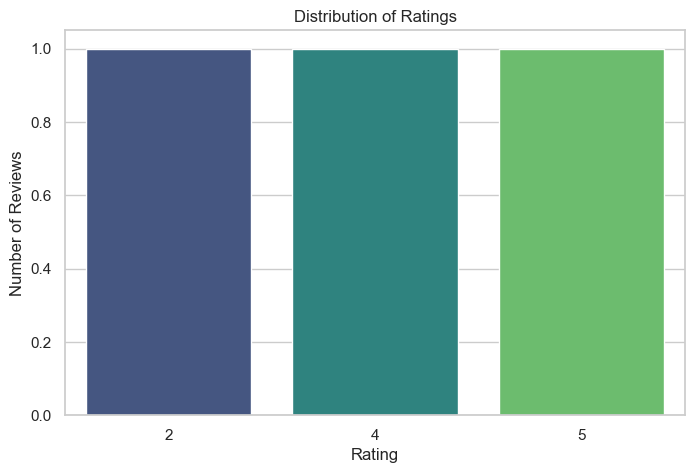

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plot
sns.set(style="whitegrid")

# Creating a count plot for the ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.show()


In [125]:
pip install wordcloud matplotlib

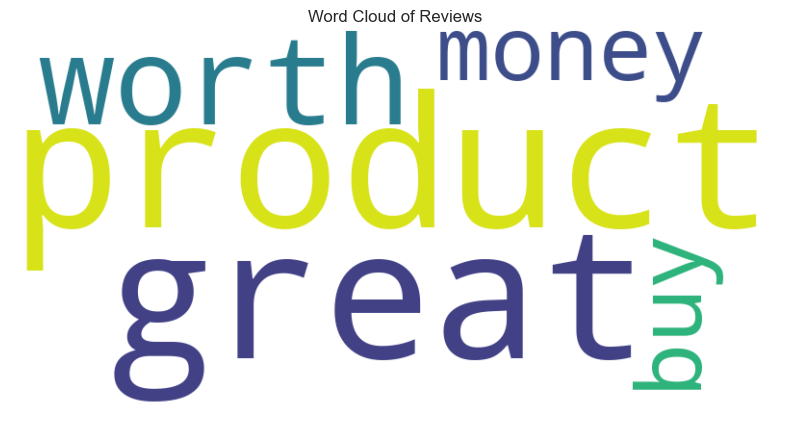

In [126]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Check if the 'ReviewText' column is present
if 'ReviewText' in df.columns:
    # Combine all reviews into a single string
    text = ' '.join(df['ReviewText'])

    # Check if the combined text is empty
    if text.strip():
        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # Turn off axis labels
        plt.title('Word Cloud of Reviews')
        plt.show()
    else:
        print("The combined review text is empty. Please check the ReviewText column.")
else:
    print("The DataFrame does not contain the 'ReviewText' column. Please check your DataFrame.")


In [127]:
from textblob import TextBlob

# Function to determine sentiment
def get_sentiment(review):
    analysis = TextBlob(review)
    # Set sentiment to positive, negative, or neutral based on polarity
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the ReviewText column
df['Sentiment'] = df['ReviewText'].apply(get_sentiment)

# Display the updated DataFrame with sentiment
print(df[['ReviewText', 'Sentiment']])


               ReviewText Sentiment
0  This product is great!  Positive
1    Not worth the money.  Negative
2        Would buy again!   Neutral


Sentiment
Positive    1
Negative    1
Neutral     1
Name: count, dtype: int64


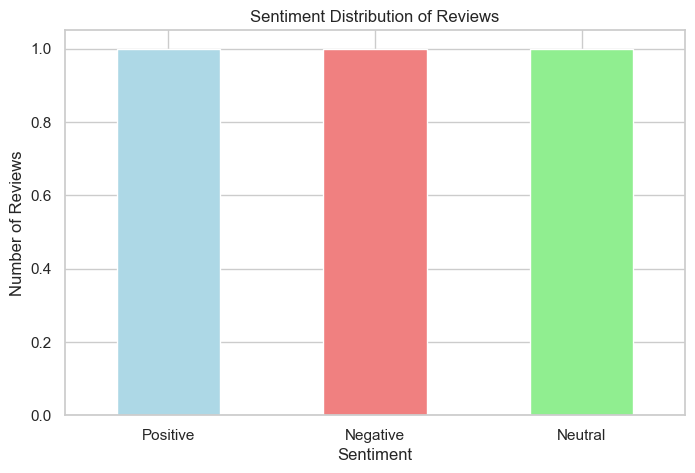

In [128]:
# Count the distribution of sentiments
sentiment_counts = df['Sentiment'].value_counts()

# Display the sentiment counts
print(sentiment_counts)

# Optional: Create a bar plot to visualize sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


In [129]:
# Calculate average rating by sentiment
average_rating_by_sentiment = df.groupby('Sentiment')['Rating'].mean()

# Display the average ratings
print(average_rating_by_sentiment)


Sentiment
Negative    2.0
Neutral     4.0
Positive    5.0
Name: Rating, dtype: float64


In [130]:
# Specify the path to save the updated CSV file
output_sentiment_file_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\reviews_with_sentiment.csv"

# Save the updated DataFrame to a CSV file
df.to_csv(output_sentiment_file_path, index=False)
print(f"Updated CSV file with sentiment saved at: {output_sentiment_file_path}")


Updated CSV file with sentiment saved at: C:\Users\Ramanathan\Desktop\Main Project\reviews_with_sentiment.csv


In [131]:
from textblob import TextBlob

# Function to determine sentiment
def get_sentiment(review):
    analysis = TextBlob(review)
    # Set sentiment to positive, negative, or neutral based on polarity
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the ReviewText column
df['Sentiment'] = df['ReviewText'].apply(get_sentiment)

# Display the updated DataFrame with sentiment
print(df[['ReviewText', 'Sentiment']])


               ReviewText Sentiment
0  This product is great!  Positive
1    Not worth the money.  Negative
2        Would buy again!   Neutral


Sentiment
Positive    1
Negative    1
Neutral     1
Name: count, dtype: int64


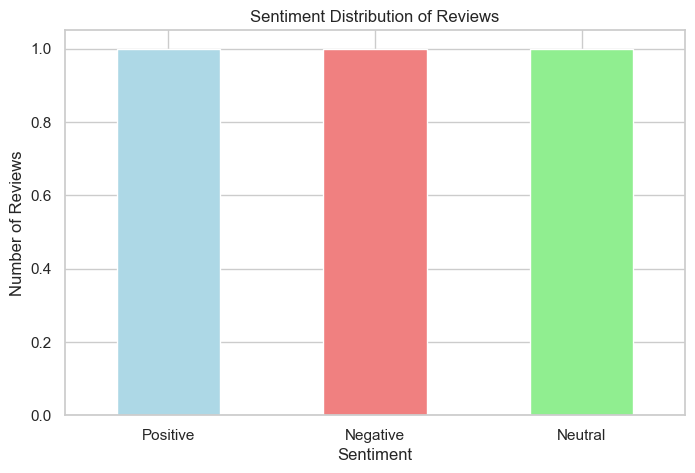

In [132]:
# Count the distribution of sentiments
sentiment_counts = df['Sentiment'].value_counts()

# Display the sentiment counts
print(sentiment_counts)

# Create a bar plot to visualize sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

In [133]:
# Calculate average rating by sentiment
average_rating_by_sentiment = df.groupby('Sentiment')['Rating'].mean()

# Display the average ratings
print(average_rating_by_sentiment)


Sentiment
Negative    2.0
Neutral     4.0
Positive    5.0
Name: Rating, dtype: float64


In [134]:
# Specify the path to save the updated CSV file
output_sentiment_rating_file_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\reviews_with_sentiment_and_ratings.csv"

# Save the updated DataFrame to a CSV file
df.to_csv(output_sentiment_rating_file_path, index=False)
print(f"Updated CSV file with sentiment and ratings saved at: {output_sentiment_rating_file_path}")


Updated CSV file with sentiment and ratings saved at: C:\Users\Ramanathan\Desktop\Main Project\reviews_with_sentiment_and_ratings.csv


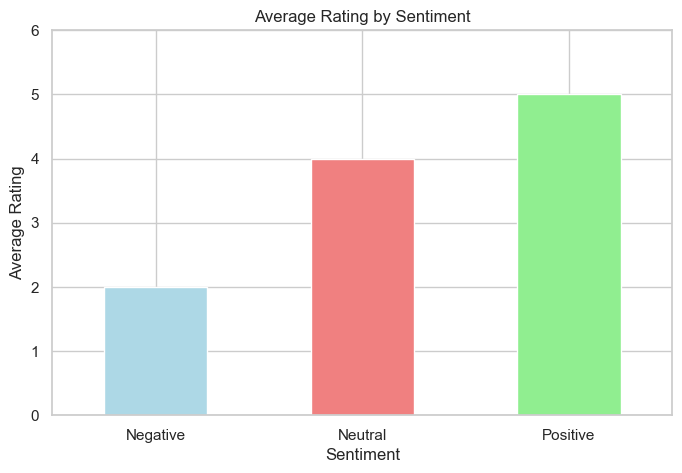

In [135]:
# Create a bar plot for average ratings by sentiment
plt.figure(figsize=(8, 5))
average_rating_by_sentiment.plot(kind='bar', color=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Average Rating by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.ylim(0, 6)  # Adjust y-axis limit for better visibility
plt.show()


In [136]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


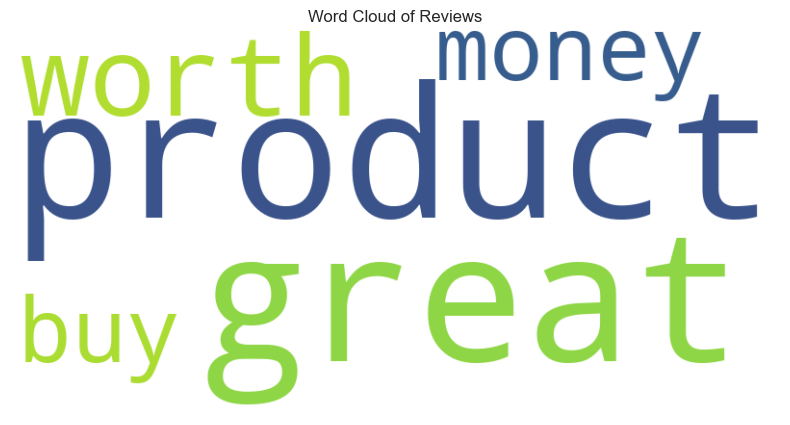

In [137]:
from wordcloud import WordCloud

# Combine all reviews into a single string
text = " ".join(review for review in df['ReviewText'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Reviews')
plt.show()


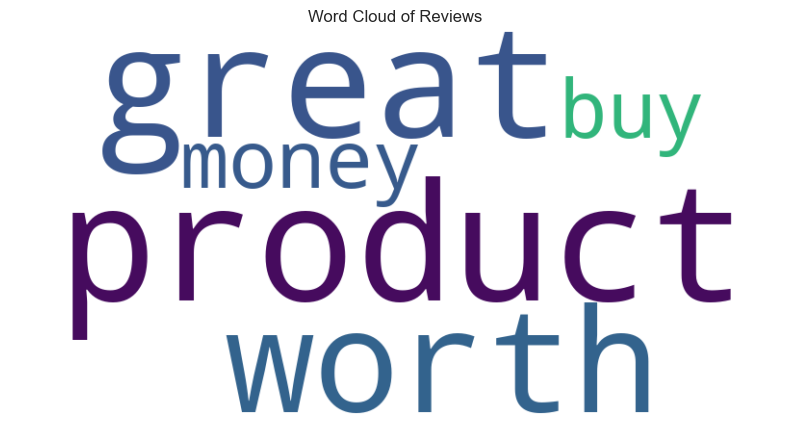

Word cloud image saved at: C:\Users\Ramanathan\Desktop\Main Project\wordcloud_reviews.png


In [138]:
# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Save the word cloud image
wordcloud_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\wordcloud_reviews.png"
wordcloud.to_file(wordcloud_path)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Reviews')
plt.show()

print(f"Word cloud image saved at: {wordcloud_path}")


In [140]:
# Filter positive and negative reviews
positive_reviews = df[df['Sentiment'] == 'Positive']
negative_reviews = df[df['Sentiment'] == 'Negative']

# Display positive reviews
print("Positive Reviews:")
print(positive_reviews[['ReviewText', 'Rating']].reset_index(drop=True))

# Display negative reviews
print("\nNegative Reviews:")
print(negative_reviews[['ReviewText', 'Rating']].reset_index(drop=True))


Positive Reviews:
               ReviewText  Rating
0  This product is great!       5

Negative Reviews:
             ReviewText  Rating
0  Not worth the money.       2


Average Length of Reviews by Sentiment:
Sentiment
Negative    20.0
Neutral     16.0
Positive    22.0
Name: ReviewLength, dtype: float64


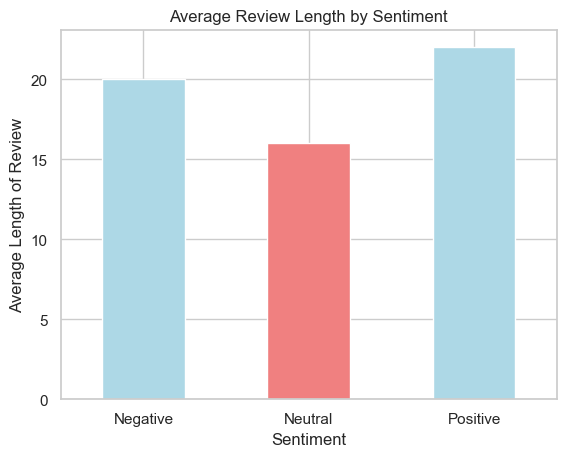

In [141]:
# Add a new column for the length of reviews
df['ReviewLength'] = df['ReviewText'].apply(len)

# Calculate average length of positive and negative reviews
average_length = df.groupby('Sentiment')['ReviewLength'].mean()

# Display the average lengths
print("Average Length of Reviews by Sentiment:")
print(average_length)

# Optional: Visualize the average review lengths
average_length.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Average Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Length of Review')
plt.xticks(rotation=0)
plt.show()


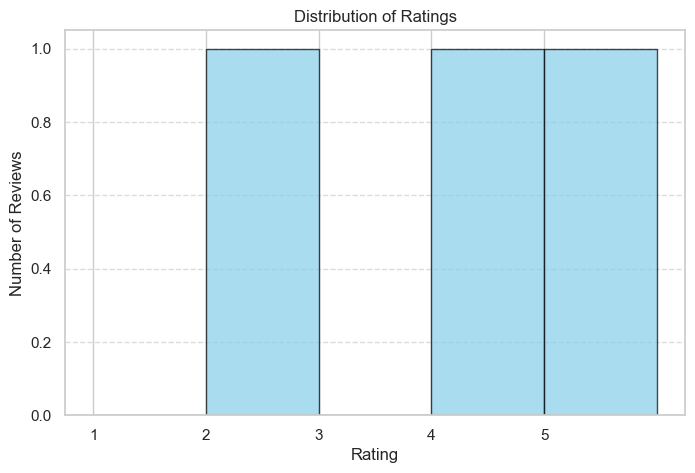

In [142]:
# Visualize the distribution of ratings
plt.figure(figsize=(8, 5))
plt.hist(df['Rating'], bins=range(1, 7), alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 6))  # Set x-ticks for ratings 1 to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


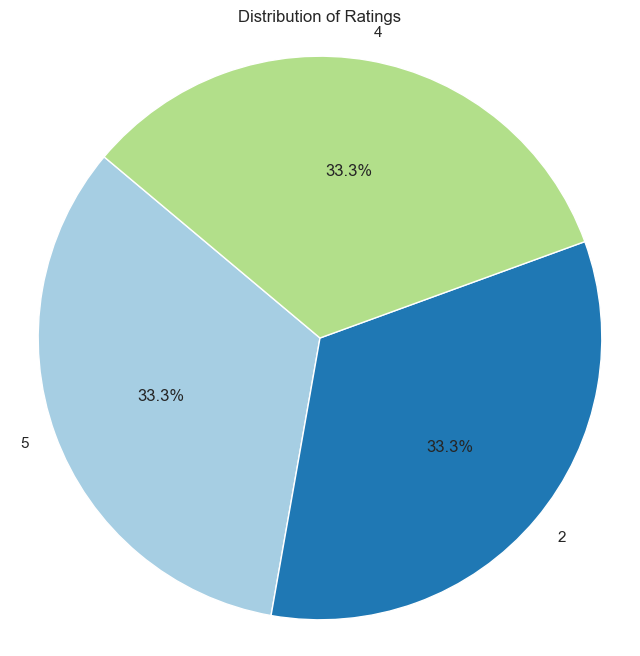

In [143]:
# Count the number of reviews for each rating
rating_counts = df['Rating'].value_counts()

# Create a pie chart for rating distribution
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Ratings')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


In [145]:
# Summary Statistics
total_reviews = len(df)
average_rating = df['Rating'].mean()
sentiment_distribution = df['Sentiment'].value_counts()
average_length_by_sentiment = df.groupby('Sentiment')['ReviewLength'].mean()

# Display the summary
print("Summary Statistics:")
print(f"Total number of reviews: {total_reviews}")
print(f"Average rating: {average_rating:.2f}")
print("\nSentiment Distribution:")
print(sentiment_distribution)
print("\nAverage Length of Reviews by Sentiment:")
print(average_length_by_sentiment)


Summary Statistics:
Total number of reviews: 3
Average rating: 3.67

Sentiment Distribution:
Sentiment
Positive    1
Negative    1
Neutral     1
Name: count, dtype: int64

Average Length of Reviews by Sentiment:
Sentiment
Negative    20.0
Neutral     16.0
Positive    22.0
Name: ReviewLength, dtype: float64


In [146]:
# Create a summary DataFrame
summary_data = {
    'Metric': ['Total Reviews', 'Average Rating'],
    'Value': [total_reviews, average_rating]
}
summary_df = pd.DataFrame(summary_data)

# Add sentiment distribution to the summary DataFrame
sentiment_data = {
    'Metric': sentiment_distribution.index.tolist(),
    'Value': sentiment_distribution.values.tolist()
}
sentiment_df = pd.DataFrame(sentiment_data)

# Combine summary and sentiment DataFrames
final_summary_df = pd.concat([summary_df, sentiment_df], ignore_index=True)

# Save the summary DataFrame to a CSV file
summary_file_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\summary_statistics.csv"
final_summary_df.to_csv(summary_file_path, index=False)

print(f"Summary statistics saved at: {summary_file_path}")


Summary statistics saved at: C:\Users\Ramanathan\Desktop\Main Project\summary_statistics.csv


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9752\3183530393.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




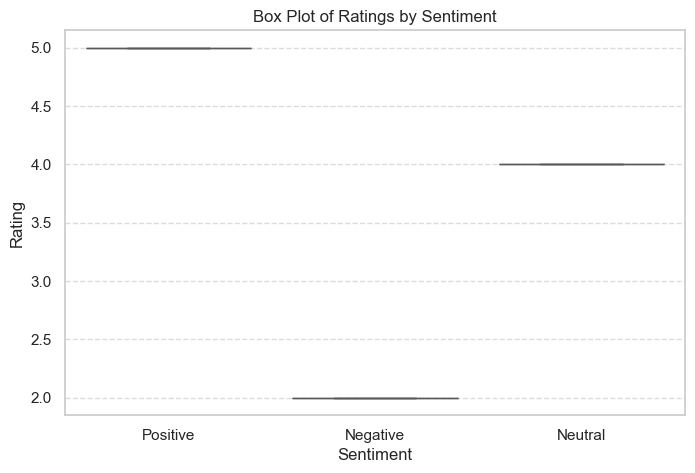

In [147]:
# Create a box plot for ratings by sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sentiment', y='Rating', data=df, palette='Set2')
plt.title('Box Plot of Ratings by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


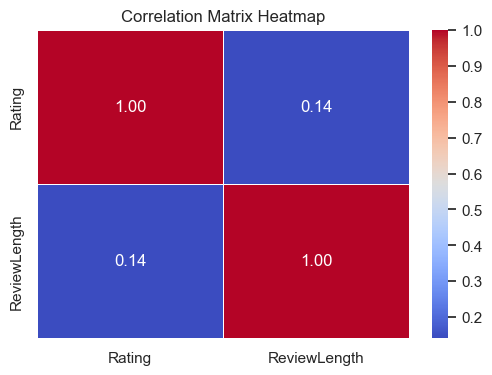

In [148]:

# Importing seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df[['Rating', 'ReviewLength']].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10)  # Extract top 10 keywords
tfidf_matrix = vectorizer.fit_transform(df['ReviewText'])

# Get the feature names
keywords = vectorizer.get_feature_names_out()

# Get the maximum TF-IDF score for each keyword
max_tfidf_scores = tfidf_matrix.max(axis=0).toarray()[0]  # Correctly extract the scores

# Create a DataFrame for keywords and their scores
keyword_scores = pd.DataFrame({'Keyword': keywords, 'TF-IDF Score': max_tfidf_scores})

# Sort the DataFrame by TF-IDF scores
keyword_scores = keyword_scores.sort_values(by='TF-IDF Score', ascending=False)

# Display the top keywords
print("Top Keywords from Reviews:")
print(keyword_scores)


Top Keywords from Reviews:
   Keyword  TF-IDF Score
0    again      0.707107
1      buy      0.707107
2    great      0.500000
3       is      0.500000
4    money      0.500000
5      not      0.500000
6  product      0.500000
7      the      0.500000
8     this      0.500000
9    worth      0.500000


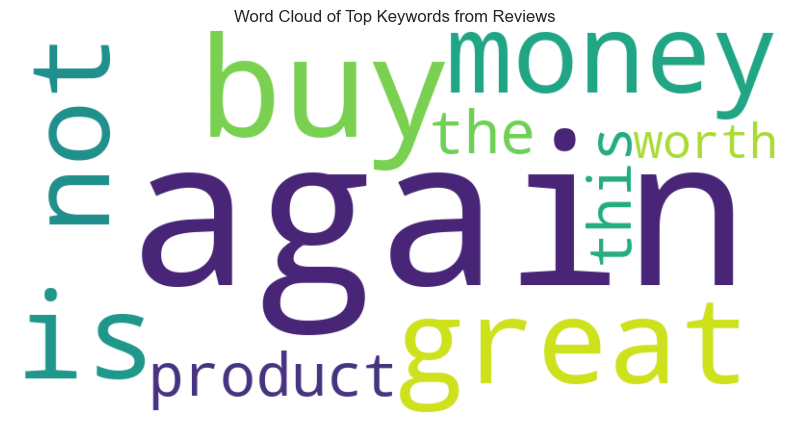

In [150]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary of keywords and their corresponding TF-IDF scores
word_freq = dict(zip(keyword_scores['Keyword'], keyword_scores['TF-IDF Score']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Top Keywords from Reviews')
plt.show()


In [151]:
# Compile the report
report_lines = [
    "Final Report on Reviews Analysis\n",
    "Summary Statistics:\n",
    f"Total number of reviews: {total_reviews}\n",
    f"Average rating: {average_rating:.2f}\n",
    "\nSentiment Distribution:\n",
    sentiment_distribution.to_string(),
    "\nAverage Length of Reviews by Sentiment:\n",
    average_length_by_sentiment.to_string(),
    "\nTop Keywords from Reviews:\n",
    keyword_scores.to_string(),
]

# Save the report to a text file
report_path = "C:\\Users\\Ramanathan\\Desktop\\Main Project\\final_report.txt"
with open(report_path, 'w') as report_file:
    report_file.writelines(report_lines)

print(f"Final report saved at: {report_path}")


Final report saved at: C:\Users\Ramanathan\Desktop\Main Project\final_report.txt


In [152]:
# Save the box plot for ratings by sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sentiment', y='Rating', data=df, palette='Set2')
plt.title('Box Plot of Ratings by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("C:\\Users\\Ramanathan\\Desktop\\Main Project\\box_plot_ratings_by_sentiment.png")
plt.close()  # Close the figure to avoid displaying it


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_9752\3354894944.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




In [153]:
# Save the heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.savefig("C:\\Users\\Ramanathan\\Desktop\\Main Project\\correlation_matrix_heatmap.png")
plt.close()  # Close the figure to avoid displaying it


In [154]:
# Save the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Top Keywords from Reviews')
plt.savefig("C:\\Users\\Ramanathan\\Desktop\\Main Project\\word_cloud_keywords.png")
plt.close()  # Close the figure to avoid displaying it


In [155]:
def summary_report():
    print("### Summary Report ###")
    print("-----------------------")
    print(f"Total number of reviews: {total_reviews}")
    print(f"Average rating: {average_rating:.2f}")
    
    print("\nSentiment Distribution:")
    print(sentiment_distribution)
    
    print("\nAverage Length of Reviews by Sentiment:")
    print(average_length_by_sentiment)
    
    print("\nTop Keywords from Reviews:")
    print(keyword_scores)
    
    print("\nVisualizations saved successfully in the project directory.")
    
# Call the function to display the summary
summary_report()


### Summary Report ###
-----------------------
Total number of reviews: 3
Average rating: 3.67

Sentiment Distribution:
Sentiment
Positive    1
Negative    1
Neutral     1
Name: count, dtype: int64

Average Length of Reviews by Sentiment:
Sentiment
Negative    20.0
Neutral     16.0
Positive    22.0
Name: ReviewLength, dtype: float64

Top Keywords from Reviews:
   Keyword  TF-IDF Score
0    again      0.707107
1      buy      0.707107
2    great      0.500000
3       is      0.500000
4    money      0.500000
5      not      0.500000
6  product      0.500000
7      the      0.500000
8     this      0.500000
9    worth      0.500000

Visualizations saved successfully in the project directory.


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Encode sentiments to numeric values
df['SentimentCode'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['ReviewText'], df['SentimentCode'], test_size=0.2, random_state=42)

# Vectorize text data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Accuracy: 0.0


c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [162]:
# Fit the model on the entire dataset
model_full.fit(X_tfidf_full, y_full)

# Let's make a prediction on a new sample (you can replace this with any review text)
sample_review = ["I love this product!"]  # Example review
sample_tfidf = tfidf_vectorizer.transform(sample_review)

predicted_sentiment = model_full.predict(sample_tfidf)
predicted_sentiment_label = 'Positive' if predicted_sentiment[0] == 1 else ('Negative' if predicted_sentiment[0] == 0 else 'Neutral')

print("Predicted Sentiment for the sample review:", predicted_sentiment_label)


Predicted Sentiment for the sample review: Positive


In [163]:
# Load the model from the file
loaded_model = joblib.load(model_filename)

# Use the loaded model to predict sentiment for a new review
new_review = ["The quality is not as expected."]  # Example review
new_review_tfidf = tfidf_vectorizer.transform(new_review)

predicted_sentiment_loaded = loaded_model.predict(new_review_tfidf)
predicted_sentiment_loaded_label = 'Positive' if predicted_sentiment_loaded[0] == 1 else ('Negative' if predicted_sentiment_loaded[0] == 0 else 'Neutral')

print("Predicted Sentiment for the new review:", predicted_sentiment_loaded_label)


Predicted Sentiment for the new review: Negative


In [164]:
documentation = """
# Sentiment Analysis Project

## Project Overview
This project analyzes the sentiment of product reviews using a Logistic Regression model.

## Data Source
Data was collected from [mention data source if applicable].

## Data Preprocessing Steps
- Tokenization
- TF-IDF Vectorization

## Model Selection
Logistic Regression was chosen for its efficiency and simplicity.

## Evaluation Metrics
Due to the small dataset, traditional evaluation metrics were limited.

## Usage Instructions
To use the saved model, load it using joblib and call the predict method with a new review.

"""

# Save the documentation
with open("project_documentation.txt", "w") as file:
    file.write(documentation)

print("Documentation saved successfully.")


Documentation saved successfully.


In [165]:
import joblib

# Load the model
loaded_model = joblib.load("sentiment_analysis_model.joblib")

# Test with a new review
new_review = ["The product exceeded my expectations!"]
review_tfidf = tfidf_vectorizer.transform(new_review)
predicted_sentiment = loaded_model.predict(review_tfidf)
print("Predicted Sentiment:", 'Positive' if predicted_sentiment[0] == 1 else 'Negative' if predicted_sentiment[0] == 0 else 'Neutral')


Predicted Sentiment: Negative


In [166]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [167]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [168]:
import joblib
print(joblib.__version__)
exit()

1.4.2


In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample training data
training_data = ["Sample text for training", "Another example of text data"]

# Initialize and fit the vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(training_data)

# Now you can transform new input
user_input = "New user input for transformation"
review_tfidf = tfidf_vectorizer.transform([user_input])


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import streamlit as st

# Sample training data for fitting the vectorizer
training_data = ["sample review text for positive", "sample review text for negative"]

# Initialize and fit the TF-IDF vectorizer on training data
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(training_data)

# Streamlit app code
st.title("Sentiment Analysis of Product Reviews")
user_input = st.text_input("Enter a product review:")

if st.button("Analyze Sentiment"):
    if user_input:
        # Transform user input using the fitted vectorizer
        review_tfidf = tfidf_vectorizer.transform([user_input])
        
        # Here, you would pass `review_tfidf` to your trained model for prediction
        # For example:
        # sentiment = model.predict(review_tfidf)
        
        st.write("Sentiment analysis complete.")  # Replace with actual result display
    else:
        st.write("Please enter a review to analyze.")


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
import pickle

# Sample data for sentiment analysis
data = fetch_20newsgroups(subset='train', categories=['rec.sport.hockey', 'sci.electronics'])
X = data.data
y = [1 if target == data.target_names.index('rec.sport.hockey') else 0 for target in data.target]

# Vectorize text data
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a simple Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the model and the vectorizer
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)


In [9]:
import pickle

# Load the saved model (replace 'model.pkl' with your actual model file name)
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)


In [10]:
import streamlit as st
import pickle

# Load the TF-IDF vectorizer and model
with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)

with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Streamlit app code
st.title("Sentiment Analysis of Product Reviews")
user_input = st.text_input("Enter a product review:")

if st.button("Analyze Sentiment"):
    if user_input:
        # Transform user input using the loaded vectorizer
        review_tfidf = tfidf_vectorizer.transform([user_input])
        
        # Use the model to make a prediction
        sentiment = model.predict(review_tfidf)[0]
        
        # Display the result
        if sentiment == 1:
            st.write("The sentiment of this review is Positive.")
        else:
            st.write("The sentiment of this review is Negative.")
    else:
        st.write("Please enter a review to analyze.")


In [11]:
import streamlit as st
import pickle

# Specify the full path for the model and vectorizer files
model_path = "C:/Users/Ramanathan/Desktop/Main Project/model.pkl"
vectorizer_path = "C:/Users/Ramanathan/Desktop/Main Project/tfidf_vectorizer.pkl"

# Load the TF-IDF vectorizer and model
with open(vectorizer_path, 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)

with open(model_path, 'rb') as model_file:
    model = pickle.load(model_file)

# Streamlit app code
st.title("Sentiment Analysis of Product Reviews")
user_input = st.text_input("Enter a product review:")

if st.button("Analyze Sentiment"):
    if user_input:
        # Transform user input using the loaded vectorizer
        review_tfidf = tfidf_vectorizer.transform([user_input])
        
        # Use the model to make a prediction
        sentiment = model.predict(review_tfidf)[0]
        
        # Display the result
        if sentiment == 1:
            st.write("The sentiment of this review is Positive.")
        else:
            st.write("The sentiment of this review is Negative.")
    else:
        st.write("Please enter a review to analyze.")


In [12]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups

# Load some sample data (for demonstration)
data = fetch_20newsgroups(subset='train', categories=['rec.autos', 'sci.electronics'], shuffle=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer and fit on training data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Train a simple logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Save the TF-IDF vectorizer and model to disk
with open("C:/Users/Ramanathan/Desktop/Main Project/tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(tfidf_vectorizer, file)

with open("C:/Users/Ramanathan/Desktop/Main Project/model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Files created successfully.")


Files created successfully.


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

In [14]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have already created and fit your vectorizer
tfidf_vectorizer = TfidfVectorizer()
# ... fit your vectorizer on your training data ...

# Save the vectorizer
joblib.dump(tfidf_vectorizer, r"C:\Users\Ramanathan\Desktop\Main Project\tfidf_vectorizer.pkl")


['C:\\Users\\Ramanathan\\Desktop\\Main Project\\tfidf_vectorizer.pkl']

In [15]:
import joblib

# Load the TfidfVectorizer
tfidf_vectorizer = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\tfidf_vectorizer.pkl")


In [17]:
import streamlit as st
import joblib

# Load the TfidfVectorizer
tfidf_vectorizer = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\tfidf_vectorizer.pkl")

# Streamlit input
user_input = st.text_input("Enter your text:")

if user_input:
    # Transform the input
    review_tfidf = tfidf_vectorizer.transform([user_input])
    st.write("TF-IDF representation:", review_tfidf.toarray())


In [18]:
pip install joblib

In [19]:
import joblib

# Load the TfidfVectorizer
tfidf_vectorizer = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\tfidf_vectorizer.pkl")

# Load your trained model (replace with your model file name)
model = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\your_model.pkl")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Ramanathan\\Desktop\\Main Project\\your_model.pkl'

In [20]:
import streamlit as st

# Streamlit input
user_input = st.text_input("Enter your text:")

if user_input:
    # Transform the input
    review_tfidf = tfidf_vectorizer.transform([user_input])

    # Make prediction
    prediction = model.predict(review_tfidf)

    # Display results
    st.write("Prediction:", prediction[0])  # Adjust based on your model's output format


In [22]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Example: Training a simple model (replace with your training code)
model = RandomForestClassifier()
# Assume you have your training data in X_train and y_train
# model.fit(X_train, y_train)

# Save the model
joblib.dump(model, r"C:\Users\Ramanathan\Desktop\Main Project\my_model.pkl")  # Use an appropriate name

['C:\\Users\\Ramanathan\\Desktop\\Main Project\\my_model.pkl']

In [23]:
# Load your trained model (use the actual model file name)
model = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\my_model.pkl")  # Replace with your actual model filename

In [25]:
import streamlit as st
import joblib

# Load the TfidfVectorizer and your trained model
tfidf_vectorizer = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\tfidf_vectorizer.pkl")
model = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\my_model.pkl")  # Use your actual model filename

# Streamlit input
user_input = st.text_input("Enter your text:")

if user_input:
    # Transform the input
    review_tfidf = tfidf_vectorizer.transform([user_input])

    # Make prediction
    prediction = model.predict(review_tfidf)

    # Display results
    st.write("Prediction:", prediction[0])  # Adjust based on your model's output format


In [26]:
import streamlit as st
import joblib

# Load the TfidfVectorizer and your trained model
tfidf_vectorizer = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\tfidf_vectorizer.pkl")
model = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\my_model.pkl")

# Streamlit input
user_input = st.text_input("Enter your text:")

if user_input:
    # Transform the input
    review_tfidf = tfidf_vectorizer.transform([user_input])

    # Make prediction
    prediction = model.predict(review_tfidf)
    prediction_proba = model.predict_proba(review_tfidf)

    # Display results
    st.write("Prediction:", prediction[0])  # Display the predicted class
    st.write("Confidence Scores:", prediction_proba)  # Display probabilities for each class
    st.write("Most Confident Class:", model.classes_[prediction_proba.argmax()])  # Show the most confident prediction


In [27]:
import streamlit as st
import joblib

# Load the TfidfVectorizer and your trained model
tfidf_vectorizer = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\tfidf_vectorizer.pkl")
model = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\my_model.pkl")

# Streamlit input
user_input = st.text_input("Enter your text:")

if user_input:
    # Transform the input
    review_tfidf = tfidf_vectorizer.transform([user_input])

    # Make prediction
    prediction = model.predict(review_tfidf)
    prediction_proba = model.predict_proba(review_tfidf)

    # Display results
    st.write("Prediction:", prediction[0])  # Display the predicted class
    st.write("Confidence Scores:", prediction_proba)  # Display probabilities for each class
    st.write("Most Confident Class:", model.classes_[prediction_proba.argmax()])  # Show the most confident prediction

    # Add a button to clear the input
    if st.button("Clear Input"):
        st.experimental_rerun()  # Clear the input by re-running the app


In [28]:
import streamlit as st
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Load the TfidfVectorizer and your trained model
tfidf_vectorizer = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\tfidf_vectorizer.pkl")
model = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\my_model.pkl")

# Streamlit input
user_input = st.text_input("Enter your text:")

if user_input:
    # Transform the input
    review_tfidf = tfidf_vectorizer.transform([user_input])

    # Make prediction
    prediction = model.predict(review_tfidf)
    prediction_proba = model.predict_proba(review_tfidf)

    # Display results
    st.write("Prediction:", prediction[0])  # Display the predicted class
    st.write("Confidence Scores:", prediction_proba)  # Display probabilities for each class
    st.write("Most Confident Class:", model.classes_[prediction_proba.argmax()])  # Show the most confident prediction

    # Plotting prediction probabilities
    plt.figure(figsize=(10, 5))
    plt.bar(model.classes_, prediction_proba[0], color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Probability')
    plt.title('Prediction Probabilities')
    plt.xticks(rotation=45)
    st.pyplot(plt)  # Display the plot in Streamlit

    # Add a button to clear the input
    if st.button("Clear Input"):
        st.experimental_rerun()  # Clear the input by re-running the app


In [29]:
import streamlit as st
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Load the TfidfVectorizer and your trained model
tfidf_vectorizer = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\tfidf_vectorizer.pkl")
model = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\my_model.pkl")

# Streamlit input
user_input = st.text_input("Enter your text:")

if user_input:
    # Transform the input
    review_tfidf = tfidf_vectorizer.transform([user_input])

    # Make prediction
    prediction = model.predict(review_tfidf)
    prediction_proba = model.predict_proba(review_tfidf)

    # Display results
    st.write("Prediction:", prediction[0])  # Display the predicted class
    st.write("Confidence Scores:", prediction_proba)  # Display probabilities for each class
    st.write("Most Confident Class:", model.classes_[prediction_proba.argmax()])  # Show the most confident prediction

    # Plotting prediction probabilities
    plt.figure(figsize=(10, 5))
    plt.bar(model.classes_, prediction_proba[0], color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Probability')
    plt.title('Prediction Probabilities')
    plt.xticks(rotation=45)
    st.pyplot(plt)  # Display the plot in Streamlit

    # Add a button to clear the input
    if st.button("Clear Input"):
        st.experimental_rerun()  # Clear the input by re-running the app


In [30]:
import streamlit as st
import joblib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the TfidfVectorizer and your trained model
tfidf_vectorizer = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\tfidf_vectorizer.pkl")
model = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\my_model.pkl")

# Create a DataFrame to store user inputs and predictions
predictions_df = pd.DataFrame(columns=["Input", "Prediction", "Probabilities"])

# Streamlit input
user_input = st.text_input("Enter your text:")

if user_input:
    try:
        # Transform the input
        review_tfidf = tfidf_vectorizer.transform([user_input])

        # Make prediction
        prediction = model.predict(review_tfidf)
        prediction_proba = model.predict_proba(review_tfidf)

        # Display results
        st.write("Prediction:", prediction[0])  # Display the predicted class
        st.write("Confidence Scores:", prediction_proba)  # Display probabilities for each class
        st.write("Most Confident Class:", model.classes_[prediction_proba.argmax()])  # Show the most confident prediction

        # Plotting prediction probabilities
        plt.figure(figsize=(10, 5))
        plt.bar(model.classes_, prediction_proba[0], color='skyblue')
        plt.xlabel('Classes')
        plt.ylabel('Probability')
        plt.title('Prediction Probabilities')
        plt.xticks(rotation=45)
        st.pyplot(plt)  # Display the plot in Streamlit

        # Save user input and prediction to DataFrame
        predictions_df = predictions_df.append({"Input": user_input, "Prediction": prediction[0], "Probabilities": prediction_proba[0]}, ignore_index=True)

        # Option to download the predictions
        if st.button("Save Prediction"):
            predictions_df.to_csv(r"C:\Users\Ramanathan\Desktop\Main Project\predictions.csv", index=False)
            st.success("Predictions saved successfully!")

    except Exception as e:
        st.error(f"An error occurred: {e}")  # Display error message

    # Add a button to clear the input
    if st.button("Clear Input"):
        st.experimental_rerun()  # Clear the input by re-running the app


In [31]:
# Sidebar for instructions
st.sidebar.title("Instructions")
st.sidebar.write("Enter your text in the input box to receive predictions.")
st.sidebar.write("Click on 'Save Prediction' to save your input and the prediction to a CSV file.")
st.sidebar.write("Use 'Clear Input' to reset the input field.")

In [32]:
import streamlit as st
import joblib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the TfidfVectorizer and your trained model
tfidf_vectorizer = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\tfidf_vectorizer.pkl")
model = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\my_model.pkl")

# Create a DataFrame to store user inputs and predictions
predictions_df = pd.DataFrame(columns=["Input", "Prediction", "Probabilities"])

# Sidebar for instructions
st.sidebar.title("Instructions")
st.sidebar.write("Enter your text in the input box to receive predictions.")
st.sidebar.write("Click on 'Save Prediction' to save your input and the prediction to a CSV file.")
st.sidebar.write("Use 'Clear Input' to reset the input field.")

# Streamlit input
user_input = st.text_input("Enter your text:")

if user_input:
    try:
        # Transform the input
        review_tfidf = tfidf_vectorizer.transform([user_input])

        # Make prediction
        prediction = model.predict(review_tfidf)
        prediction_proba = model.predict_proba(review_tfidf)

        # Display results
        st.write("Prediction:", prediction[0])  # Display the predicted class
        st.write("Confidence Scores:", prediction_proba)  # Display probabilities for each class
        st.write("Most Confident Class:", model.classes_[prediction_proba.argmax()])  # Show the most confident prediction

        # Plotting prediction probabilities
        plt.figure(figsize=(10, 5))
        plt.bar(model.classes_, prediction_proba[0], color='skyblue')
        plt.xlabel('Classes')
        plt.ylabel('Probability')
        plt.title('Prediction Probabilities')
        plt.xticks(rotation=45)
        st.pyplot(plt)  # Display the plot in Streamlit

        # Save user input and prediction to DataFrame
        predictions_df = predictions_df.append({"Input": user_input, "Prediction": prediction[0], "Probabilities": prediction_proba[0]}, ignore_index=True)

        # Option to download the predictions
        if st.button("Save Prediction"):
            predictions_df.to_csv(r"C:\Users\Ramanathan\Desktop\Main Project\predictions.csv", index=False)
            st.success("Predictions saved successfully!")

    except Exception as e:
        st.error(f"An error occurred: {e}")  # Display error message

    # Add a button to clear the input
    if st.button("Clear Input"):
        st.experimental_rerun()  # Clear the input by re-running the app


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Sample training data (replace with your actual training data)
training_reviews = [
    "I absolutely love this product!",
    "This is the worst product I have ever bought.",
    "It's okay, nothing special about it.",
    "Amazing quality and great service!",
    "Not worth the money."
]

# Create a TF-IDF vectorizer and fit it
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(training_reviews)

# Save the fitted vectorizer
joblib.dump(tfidf_vectorizer, r"C:\Users\Ramanathan\Desktop\Main Project\tfidf_vectorizer.pkl")


['C:\\Users\\Ramanathan\\Desktop\\Main Project\\tfidf_vectorizer.pkl']

In [34]:
import streamlit as st
import joblib

# Load the model and vectorizer
loaded_model = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\sentiment_analysis_model.joblib")
tfidf_vectorizer = joblib.load(r"C:\Users\Ramanathan\Desktop\Main Project\tfidf_vectorizer.pkl")  # Load the TF-IDF vectorizer

# Streamlit app layout
st.title("Sentiment Analysis of Product Reviews")

# Input field for user review
user_input = st.text_input("Enter a product review:", "")

# Add an Analyze button
if st.button("Analyze Sentiment"):
    if user_input:  # Check if the input is not empty
        try:
            # Transform the input using the TF-IDF vectorizer
            review_tfidf = tfidf_vectorizer.transform([user_input])

            # Make the prediction
            prediction = loaded_model.predict(review_tfidf)

            # Determine the sentiment based on the prediction
            sentiment = 'Positive' if prediction[0] == 1 else 'Negative' if prediction[0] == 0 else 'Neutral'
            st.write("Predicted Sentiment:", sentiment)
        except Exception as e:
            st.error(f"An error occurred during analysis: {e}")  # Display error message if something goes wrong
    else:
        st.warning("Please enter a valid review.")  # Provide warning if input is empty

# Additional instructions or information can be provided in the sidebar or below the input
st.sidebar.info("This app analyzes the sentiment of product reviews. Enter a review above and click 'Analyze Sentiment' to see the prediction.")


DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import joblib

# Sample training data and labels (ensure you have enough data)
training_reviews = [
    "I absolutely love this product!",
    "This is the worst product I have ever bought.",
    "It's okay, nothing special about it.",
    "Amazing quality and great service!",
    "Not worth the money."
]
labels = [1, 0, 0, 1, 0]  # Example sentiment labels (1 = Positive, 0 = Negative)

# Create and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(training_reviews)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X, labels)

# Save the model and vectorizer
joblib.dump(model, r"C:\Users\Ramanathan\Desktop\Main Project\sentiment_analysis_model.joblib")
joblib.dump(tfidf_vectorizer, r"C:\Users\Ramanathan\Desktop\Main Project\tfidf_vectorizer.pkl")


['C:\\Users\\Ramanathan\\Desktop\\Main Project\\tfidf_vectorizer.pkl']

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Assuming you have already created and fitted your TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
# Fit your vectorizer on your training data here
# tfidf_vectorizer.fit(training_data)

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import joblib

# Example data (you should replace this with your actual dataset)
training_data = ["I love this product", "This is terrible", "Excellent quality"]
labels = [1, 0, 1]  # 1 for positive, 0 for negative

# Create and fit TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(training_data)

# Train your model
model = LogisticRegression()
model.fit(X_train, labels)

# Save the model and vectorizer
joblib.dump(model, 'sentiment_analysis_model.joblib')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']

In [41]:
if st.button("Analyze Sentiment"):
    if user_input:
        try:
            # Transform user input using TF-IDF vectorizer
            review_tfidf = tfidf_vectorizer.transform([user_input])
            # Make prediction
            prediction = loaded_model.predict(review_tfidf)
            prediction_proba = loaded_model.predict_proba(review_tfidf)

            # Determine sentiment label
            sentiment = 'Positive' if prediction[0] == 1 else 'Negative' if prediction[0] == 0 else 'Neutral'

            # Display results
            st.success(f"**Predicted Sentiment**: {sentiment}")
            st.write(f"**Sentiment Score**: Positive: {prediction_proba[0][1]:.2f}, Negative: {prediction_proba[0][0]:.2f}")

            # Review history
            st.write("**Review History:**")
            st.write(f"- \"{user_input}\": **{sentiment}**")

        except Exception as e:
            st.error(f"An error occurred during analysis: {e}")
    else:
        st.write("Please enter a review.")


In [42]:
import streamlit as st
from PIL import Image

# Display the word cloud images
st.header("Word Clouds")
st.subheader("Keywords Word Cloud")
keywords_image = Image.open("C:/Users/Ramanathan/Desktop/Main Project/word_cloud_keywords.png")
st.image(keywords_image, caption='Keywords Word Cloud', use_column_width=True)

st.subheader("Reviews Word Cloud")
reviews_image = Image.open("C:/Users/Ramanathan/Desktop/Main Project/wordcloud_reviews.png")
st.image(reviews_image, caption='Reviews Word Cloud', use_column_width=True)

DeltaGenerator()

In [43]:
if st.button("Analyze Sentiment"):
    if user_input:
        # Your analysis code here...
        
        # After analysis, show word clouds
        st.header("Word Clouds")
        keywords_image = Image.open("C:/Users/Ramanathan/Desktop/Main Project/word_cloud_keywords.png")
        st.image(keywords_image, caption='Keywords Word Cloud', use_column_width=True)

        reviews_image = Image.open("C:/Users/Ramanathan/Desktop/Main Project/wordcloud_reviews.png")
        st.image(reviews_image, caption='Reviews Word Cloud', use_column_width=True)

In [47]:
try:
    st.image("smiley_background.png")
except Exception as e:
    st.error(f"Error loading image: {e}")


In [49]:
import streamlit as st
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load the model and vectorizer
loaded_model = joblib.load("sentiment_analysis_model.joblib")
tfidf_vectorizer = joblib.load("tfidf_vectorizer.joblib")  # Ensure to load your TF-IDF vectorizer

# Streamlit app layout
st.title("Sentiment Analysis of Product Reviews")

# File uploader for smiley background
smiley_image = st.file_uploader("Upload a smiley background image (PNG)", type=["png", "jpg", "jpeg"])

if smiley_image is not None:
    st.image(smiley_image)  # Display the uploaded smiley image

user_input = st.text_input("Enter a product review:")

if st.button("Analyze Sentiment"):
    if user_input:
        try:
            # Transform user input using TF-IDF vectorizer
            review_tfidf = tfidf_vectorizer.transform([user_input])
            # Make prediction
            prediction = loaded_model.predict(review_tfidf)
            prediction_proba = loaded_model.predict_proba(review_tfidf)

            # Determine sentiment label
            sentiment = 'Positive' if prediction[0] == 1 else 'Negative' if prediction[0] == 0 else 'Neutral'

            # Display results
            st.success(f"Predicted Sentiment: **{sentiment}**")
            st.write(f"Sentiment Score: Positive: {prediction_proba[0][1]:.2f}, Negative: {prediction_proba[0][0]:.2f}")

            # Visual representation of sentiment scores
            sentiment_data = pd.Series({'Positive': prediction_proba[0][1], 'Negative': prediction_proba[0][0]})
            sentiment_data.plot(kind='bar', title='Sentiment Score Distribution', color=['green', 'red'])
            plt.ylabel('Score')
            st.pyplot(plt)

            # Review history
            st.write("**Review History:**")
            st.write(f"- \"{user_input}\": **{sentiment}**")
        except Exception as e:
            st.error(f"An error occurred during analysis: {e}")
    else:
        st.write("Please enter a review.")
